# Machine Learning Test Cases

## Case 1.2 - Biomedical Device for Parkinson's Disease Progression Monitoring


### Acondicionamiento del Set de Datos


### Partition of the Dataset

The code below is used to partition the Parkinson's dataset into three files: a **training set, a test set and 
a validation set.**

In [1]:
from random import choice
from numpy import array, dot, random
Heaviside = lambda x: 0 if x<0 else 1

In [3]:
import random
import math
Data_parkinson = 'parkinsons_updrs.csv'
Train_parkinson = 'trainp.csv'
Test_parkinson = 'testp.csv'
Valid_parkinson = 'validp.csv'
IS_CSV= True

PERCENT_TRAIN = 50
PERCENT_VALID = 25
PERCENT_TESTS = 25

# Adapted from Antrikshy Github

data = [l for l in open(Data_parkinson, 'r')]

train_file = open(Train_parkinson, 'w')
test_file = open(Test_parkinson, 'w')
valid_file = open(Valid_parkinson, 'w')

if IS_CSV:
    train_file.write(data[0])
    valid_file.write(data[0])
    test_file.write(data[0])
    data=data[1:len(data)]
    
data_len = len(data)
train_len = int(data_len*PERCENT_TRAIN/100)
valid_len = int(data_len*PERCENT_VALID/100)
test_len = int(data_len*PERCENT_TESTS/100)

data_fractions = [train_len, valid_len, test_len]
split_data= [[], [], []]

rand_data_ind = 0

for split_ind, fraction in enumerate(data_fractions):
    for i in range(fraction):
        rand_data_ind = random.randint(0, len(data)-1)
        split_data[split_ind].append(data[rand_data_ind])
        data.pop(rand_data_ind)
        
for l in split_data[0]:
    train_file.write(l)
    
for l in split_data[1]:
    valid_file.write(l)
    
for l in split_data[2]:
    test_file.write(l)
    
train_file.close()
valid_file.close()
test_file.close()


In [1]:
from pandas import read_csv
train_f = read_csv('trainp.csv')
print(len(train_f))
train_f.head()

2937


subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0    103.640       32.243       41.657    0.00395   
1        36   62    1     57.275       23.505       29.861    0.02530   
2        35   71    0    146.430       35.551       54.034    0.00611   
3         3   57    0    154.310       28.213       38.935    0.00262   
4         6   63    0     26.338       27.421       39.289    0.00942   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5   ...     Shimmer(dB)  Shimmer:APQ3  \
0     0.000023     0.00158      0.00232   ...           0.135       0.00511   
1     0.000123     0.01269      0.01933   ...           0.828       0.04576   
2     0.000043     0.00243      0.00367   ...           0.265       0.01377   
3     0.000014     0.00106      0.00126   ...           0.052       0.00214   
4     0.000065     0.00509      0.00375   ...           0.400       0.02417   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.00637        0.00879      0.01533  0.022641  28.220  0.44028   
1       0.06560        0.05781      0.13727  0.206230   8.723  0.66499   
2       0.01974        0.03240      0.04130  0.016920  21.203  0.54737   
3       0.00252        0.00296      0.00641  0.005725  30.188  0.31728   
4       0.02209        0.02927      0.07250  0.035487  19.090  0.55682   

       DFA      PPE  
0  0.59017  0.24612  
1  0.63325  0.47838  
2  0.72553  0.31300  
3  0.58255  0.10498  
4  0.61162  0.20387  

[5 rows x 22 columns]

In [2]:
valid_f = read_csv('validp.csv')
print(len(valid_f))
valid_f.head()

1468


subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0        16   65    0    138.430       9.0863       21.259    0.00612   
1        41   68    1    112.560      37.6580       45.727    0.00611   
2        12   62    0     35.363      19.2800       27.114    0.00407   
3        36   62    1     29.294      21.3040       27.975    0.00850   
4        41   68    1    161.520      35.1090       43.687    0.00624   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5   ...     Shimmer(dB)  Shimmer:APQ3  \
0     0.000057     0.00361      0.00355   ...           0.562       0.03738   
1     0.000027     0.00288      0.00321   ...           0.242       0.01098   
2     0.000027     0.00185      0.00215   ...           0.254       0.01271   
3     0.000089     0.00480      0.00479   ...           1.122       0.05421   
4     0.000034     0.00276      0.00307   ...           0.283       0.01736   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.04048        0.04613      0.11213  0.023109  18.660  0.57779   
1       0.01428        0.02753      0.03295  0.023577  21.897  0.60772   
2       0.01586        0.02778      0.03814  0.019846  21.517  0.58978   
3       0.06299        0.08980      0.16262  0.270870   9.168  0.62134   
4       0.01794        0.02790      0.05207  0.022668  19.078  0.53024   

       DFA      PPE  
0  0.72794  0.25330  
1  0.61782  0.25588  
2  0.62521  0.23866  
3  0.56711  0.34131  
4  0.70506  0.28667  

[5 rows x 22 columns]

In [4]:
test_f = read_csv('testp.csv')
print(len(test_f))
test_f.head()

1468


subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0        21   73    0     60.838       26.138       37.275    0.00904   
1         3   57    0     77.311       27.639       32.731    0.00258   
2        23   59    1     38.390       13.175       23.134    0.00614   
3        14   58    1    140.410       16.801       22.344    0.00308   
4         3   57    0    168.270       28.011       39.947    0.00231   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5   ...     Shimmer(dB)  Shimmer:APQ3  \
0     0.000075     0.00385      0.00461   ...           0.733       0.04094   
1     0.000017     0.00114      0.00139   ...           0.034       0.00185   
2     0.000032     0.00275      0.00286   ...           0.191       0.00944   
3     0.000017     0.00140      0.00120   ...           0.099       0.00528   
4     0.000015     0.00101      0.00135   ...           0.138       0.00639   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.05093        0.06405      0.12283  0.036642  18.395  0.63427   
1       0.00222        0.00318      0.00554  0.006913  28.173  0.34680   
2       0.01215        0.01820      0.02833  0.017180  22.277  0.50025   
3       0.00661        0.01011      0.01585  0.009764  26.996  0.35753   
4       0.00858        0.01460      0.01918  0.004072  27.369  0.43286   

       DFA      PPE  
0  0.70586  0.25982  
1  0.59049  0.12589  
2  0.70133  0.20804  
3  0.60653  0.12444  
4  0.55108  0.14440  

[5 rows x 22 columns]

## Illustration of features in the Training Dataset used for predictive analytics

The following variables from the training dataset, will be used to illustrate the application of linear regression techniques and later, the "Perceptron model", for prediction of the Motor UPDRS index:

*Variables*  |
-------------|
Jitter:RAP   |
-------------|
Jitter(Abs)  |
-------------|
Jitter(%)    |
-------------|
Jitter:DDP   |
-------------|
Jitter:PPQ5  |
-------------|
Shimmer:APQ3 |
-------------|
Shimmer:APQ5 |
-------------|
Shimmer(dB)  |
-------------|
Shimmer:DDA  |
-------------|  
Shimmer:APQ11|
-------------|
NHR          |
-------------|
HNR          |
-------------|
RPDE         |
-------------|
DFA          |
-------------|
PPE          |
-------------|

 **X** = (x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10,x11, x12, x13, x14, x15)
 


### Bivariate Regression Plots 

The two following figures show regression plots between some of the variable datastes.
The plot for Shimmer(dB) versus Shimmer(DDA), as well as that of Jitter:RAP versus Jitter:PPQ5, show that these variables are **highly correlated**. 
In order to evaluate the impact of the variable "age" in the correlation, this was included on the first plot.

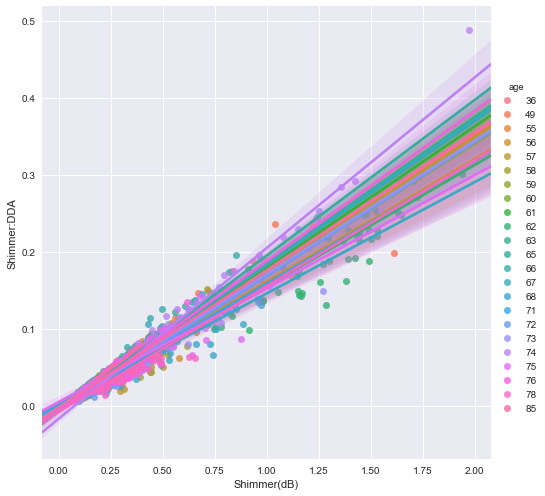

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

df1=pd.DataFrame(train_f, columns=['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'Jitter(Abs)', 'Jitter(%)','Jitter:DDP', 'Jitter:PPQ5','Shimmer:APQ3','Shimmer:APQ5','Shimmer:APQ11','NHR', 'HNR','RPDE', 'DFA','PPE', 'motor_UPDRS', 'age'])
g=sns.lmplot(x="Shimmer(dB)", y="Shimmer:DDA", hue="age", data=df1, palette="husl", size=7)


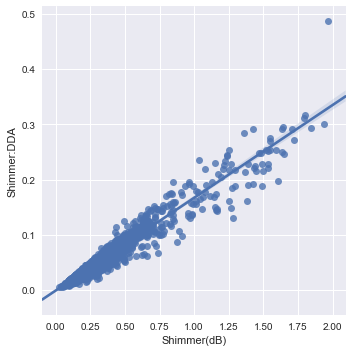

In [12]:
h=sns.lmplot(x="Shimmer(dB)", y="Shimmer:DDA", data=df1)

### Paired plots of each variable versus MotorUPDRS

The "Jitter" and "Shimmer" variables are not independent, the plots below show the degree of correlation among these variables, and individually, with the Motor UPDRS index.  

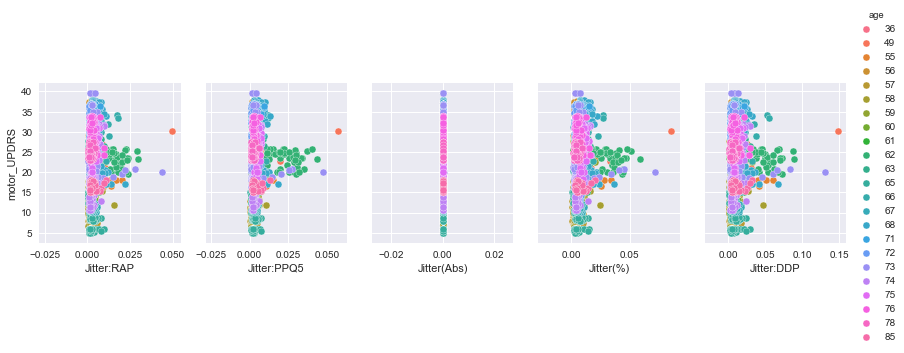

In [28]:

df2=pd.DataFrame(train_f, columns=['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'Jitter(Abs)', 'Jitter(%)','Jitter:DDP', 'Jitter:PPQ5','Shimmer:APQ3','Shimmer:APQ5','Shimmer:APQ11','NHR', 'HNR','RPDE', 'DFA','PPE', 'motor_UPDRS', 'age'])
sns.pairplot(df2, x_vars=["Jitter:RAP",'Jitter:PPQ5','Jitter(Abs)', "Jitter(%)", 'Jitter:DDP'], y_vars=['motor_UPDRS'], 
             size=3, aspect=.8, kind="scatter", palette="husl", hue="age");


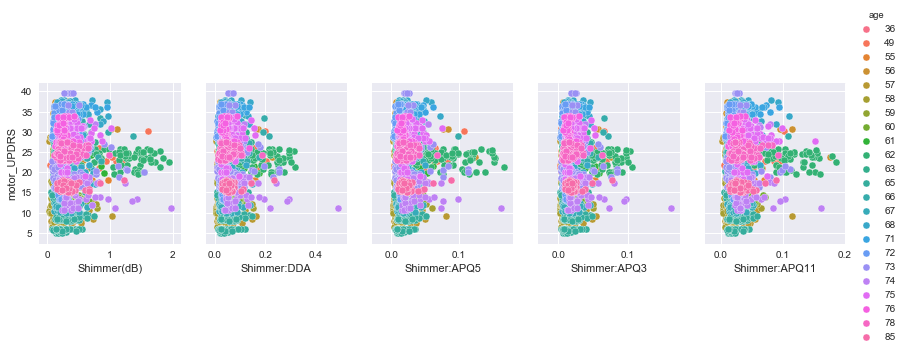

In [25]:
sns.pairplot(df2, x_vars=["Shimmer(dB)",'Shimmer:DDA','Shimmer:APQ5', 'Shimmer:APQ3', 'Shimmer:APQ11'], y_vars=['motor_UPDRS'], 
             size=3, aspect=.8, kind="scatter", palette="husl", hue="age");

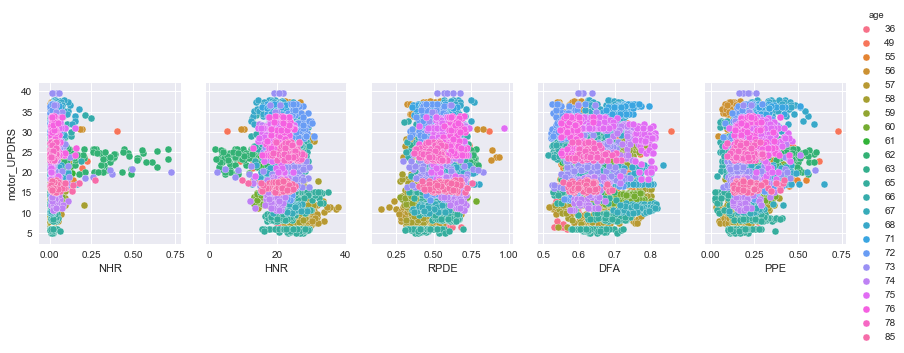

In [27]:
sns.pairplot(df2, x_vars=["NHR",'HNR','RPDE', 'DFA', 'PPE'], y_vars=['motor_UPDRS'], 
             size=3, aspect=.8, kind="scatter", palette="husl", hue="age");

## Simple Neural Liner Regression Model (Similar to "Perceptron" model for binary outputs)

Below, a multiple regression model was applied to a subset of the the Parkinsons' data (training set).

No filtering was used (that is, the *f* function used was the identity function, and the model was trained to provide a 50% error between the calculated and the expected motor UPDRS index in the training set). 

In [3]:
from random import choice
from numpy import array, dot, random
import pandas as pd

# Here is the implementation with the Heaviside function.
#step_ = lambda x: 0 if x <=0 else 1

# For implementation with the sign function:
#step_ = lambda x: -1 if x < 0 else 1

training= {"JitterRAP": train_f['Jitter:RAP'], "ShimmerdB": train_f['Shimmer(dB)'], "ShimmerDDA":train_f['Shimmer:DDA'], "JitterPPQ5":train_f['Jitter:PPQ5'],"ShimmerAPQ11":train_f['Shimmer:APQ11'], 
                "JitterABS":train_f['Jitter(Abs)'],"JitterDDP":train_f['Jitter:DDP'], "ShimmerAPQ3":train_f['Shimmer:APQ3'], "ShimmerAPQ5":train_f['Shimmer:APQ5'], "Jitter(%)": train_f['Jitter(%)'], 
                "NHR":train_f['NHR'],"RPDE":train_f['RPDE'], "DFA":train_f['DFA'], "PPE":train_f['PPE'], "X0": 1,"motorUPDRS": train_f['motor_UPDRS']}
  
df=pd.DataFrame(training, columns=["JitterRAP", "ShimmerdB", "ShimmerDDA", "JitterPPQ5","ShimmerAPQ11","JitterABS", "JitterDDP","ShimmerAPQ3", "ShimmerAPQ5","Jitter(%)","NHR", "RPDE", "DFA", "PPE", "X0", "motorUPDRS"])

df.head()


JitterRAP  ShimmerdB  ShimmerDDA  JitterPPQ5  ShimmerAPQ11  JitterABS  \
0    0.00158      0.135     0.01533     0.00232       0.00879   0.000023   
1    0.01269      0.828     0.13727     0.01933       0.05781   0.000123   
2    0.00243      0.265     0.04130     0.00367       0.03240   0.000043   
3    0.00106      0.052     0.00641     0.00126       0.00296   0.000014   
4    0.00509      0.400     0.07250     0.00375       0.02927   0.000065   

   JitterDDP  ShimmerAPQ3  ShimmerAPQ5  Jitter(%)       NHR     RPDE      DFA  \
0    0.00473      0.00511      0.00637    0.00395  0.022641  0.44028  0.59017   
1    0.03807      0.04576      0.06560    0.02530  0.206230  0.66499  0.63325   
2    0.00729      0.01377      0.01974    0.00611  0.016920  0.54737  0.72553   
3    0.00317      0.00214      0.00252    0.00262  0.005725  0.31728  0.58255   
4    0.01527      0.02417      0.02209    0.00942  0.035487  0.55682  0.61162   

       PPE  X0  motorUPDRS  
0  0.24612   1      32.243  
1  0.47838   1      23.505  
2  0.31300   1      35.551  
3  0.10498   1      28.213  
4  0.20387   1      27.421

In [6]:
w=random.rand(14)
print("w initial=", w)
errors =[]
eta= 1/10
n=2

for i in range(n):
    for j in range(len(df)):
        x=df.iloc[j, 0:14]
        print('x=',x)
        result=dot(w,x)  # funcion de propagacion            
        print('result=', result)
        expected= df.loc[j,'motorUPDRS']
        error = expected - result         #minimizacion de error paso a paso
        print('error=',error, 'expected=', expected)
        errors.append(error)
        if abs(error) > 5*eta*expected:  # pesos optimos se modifican en base a contener el error maximo de la prediccion 
           w+= eta*error*x 
           print('adjusted w=', w)
    i+=1
              



w initial= [ 0.36544983  0.98256743  0.05060935  0.40328025  0.24485073  0.84958563
  0.20603994  0.9828363   0.62220486  0.19583347  0.9353883   0.96150884
  0.85392666  0.53190023]
x= JitterRAP       0.001580
ShimmerdB       0.135000
ShimmerDDA      0.015330
JitterPPQ5      0.002320
ShimmerAPQ11    0.008790
JitterABS       0.000023
JitterDDP       0.004730
ShimmerAPQ3     0.005110
ShimmerAPQ5     0.006370
Jitter(%)       0.003950
NHR             0.022641
RPDE            0.440280
DFA             0.590170
PPE             0.246120
Name: 0, dtype: float64
result= 1.22722559645
error= 31.0157744035 expected= 32.243
adjusted w= [ 0.37035032  1.40128038  0.09815653  0.41047591  0.2721136   0.84965727
  0.2207104   0.99868536  0.64196191  0.2080847   1.00561111  2.32707135
  2.68438462  1.29526047]
x= JitterRAP       0.012690
ShimmerdB       0.828000
ShimmerDDA      0.137270
JitterPPQ5      0.019330
ShimmerAPQ11    0.057810
JitterABS       0.000123
JitterDDP       0.038070
ShimmerAPQ3     0.

error= 10.4978462361 expected= 26.044
x= JitterRAP       0.000930
ShimmerdB       0.108000
ShimmerDDA      0.019690
JitterPPQ5      0.000970
ShimmerAPQ11    0.010470
JitterABS       0.000007
JitterDDP       0.002780
ShimmerAPQ3     0.006560
ShimmerAPQ5     0.007640
Jitter(%)       0.001750
NHR             0.001693
RPDE            0.314140
DFA             0.653110
PPE             0.080358
Name: 28, dtype: float64
result= 13.5356398154
error= -6.08123981544 expected= 7.4544
adjusted w= [  0.4354652    6.6784619    0.98336142   0.48548992   0.68805411
   0.8503647    0.41606165   1.29379162   0.98544168   0.33519482
   1.69652227  10.86463006  13.223217     4.80665829]
x= JitterRAP       0.003540
ShimmerdB       0.191000
ShimmerDDA      0.032220
JitterPPQ5      0.002790
ShimmerAPQ11    0.015360
JitterABS       0.000049
JitterDDP       0.010610
ShimmerAPQ3     0.010740
ShimmerAPQ5     0.011470
Jitter(%)       0.006220
NHR             0.014001
RPDE            0.527680
DFA             0.7445

error= 5.37428927013 expected= 24.388
x= JitterRAP       0.001900
ShimmerdB       0.179000
ShimmerDDA      0.029320
JitterPPQ5      0.001910
ShimmerAPQ11    0.015680
JitterABS       0.000020
JitterDDP       0.005710
ShimmerAPQ3     0.009770
ShimmerAPQ5     0.010670
Jitter(%)       0.003680
NHR             0.015769
RPDE            0.463980
DFA             0.649970
PPE             0.133050
Name: 46, dtype: float64
result= 16.7730930088
error= -4.77309300883 expected= 12.0
x= JitterRAP       0.000610
ShimmerdB       0.101000
ShimmerDDA      0.014700
JitterPPQ5      0.000750
ShimmerAPQ11    0.009600
JitterABS       0.000010
JitterDDP       0.001820
ShimmerAPQ3     0.004900
ShimmerAPQ5     0.005720
Jitter(%)       0.001710
NHR             0.003993
RPDE            0.461790
DFA             0.539390
PPE             0.104450
Name: 47, dtype: float64
result= 14.4225882846
error= 0.57741171536 expected= 15.0
x= JitterRAP       0.002990
ShimmerdB       0.237000
ShimmerDDA      0.039060
JitterPPQ5 

error= 11.1548249957 expected= 24.695
x= JitterRAP       0.011230
ShimmerdB       0.912000
ShimmerDDA      0.098410
JitterPPQ5      0.015380
ShimmerAPQ11    0.044130
JitterABS       0.000095
JitterDDP       0.033700
ShimmerAPQ3     0.032800
ShimmerAPQ5     0.036640
Jitter(%)       0.021430
NHR             0.203080
RPDE            0.600630
DFA             0.581530
PPE             0.382350
Name: 68, dtype: float64
result= 21.6661442686
error= 4.0228557314 expected= 25.689
x= JitterRAP       0.002070
ShimmerdB       0.146000
ShimmerDDA      0.022510
JitterPPQ5      0.002060
ShimmerAPQ11    0.016000
JitterABS       0.000021
JitterDDP       0.006220
ShimmerAPQ3     0.007500
ShimmerAPQ5     0.009400
Jitter(%)       0.003990
NHR             0.023691
RPDE            0.523380
DFA             0.624510
PPE             0.183040
Name: 69, dtype: float64
result= 15.2725584054
error= 11.1184415946 expected= 26.391
x= JitterRAP       0.003380
ShimmerdB       0.258000
ShimmerDDA      0.045680
JitterPPQ

error= 2.13247031967 expected= 15.0
x= JitterRAP       0.008240
ShimmerdB       0.511000
ShimmerDDA      0.085310
JitterPPQ5      0.008160
ShimmerAPQ11    0.041600
JitterABS       0.000143
JitterDDP       0.024720
ShimmerAPQ3     0.028440
ShimmerAPQ5     0.030780
Jitter(%)       0.014140
NHR             0.035625
RPDE            0.563870
DFA             0.807350
PPE             0.402800
Name: 90, dtype: float64
result= 22.5868438852
error= -5.58684388516 expected= 17.0
x= JitterRAP       0.004170
ShimmerdB       0.440000
ShimmerDDA      0.058010
JitterPPQ5      0.005460
ShimmerAPQ11    0.038720
JitterABS       0.000057
JitterDDP       0.012510
ShimmerAPQ3     0.019340
ShimmerAPQ5     0.026270
Jitter(%)       0.009910
NHR             0.069650
RPDE            0.555900
DFA             0.591910
PPE             0.391010
Name: 91, dtype: float64
result= 19.0158238014
error= 12.2931761986 expected= 31.309
x= JitterRAP       0.001330
ShimmerdB       0.285000
ShimmerDDA      0.045780
JitterPPQ5 

x= JitterRAP       0.004040
ShimmerdB       0.282000
ShimmerDDA      0.053470
JitterPPQ5      0.002530
ShimmerAPQ11    0.018060
JitterABS       0.000050
JitterDDP       0.012120
ShimmerAPQ3     0.017820
ShimmerAPQ5     0.015740
Jitter(%)       0.007490
NHR             0.051998
RPDE            0.557510
DFA             0.604010
PPE             0.179170
Name: 110, dtype: float64
result= 16.6224869814
error= 9.79951301864 expected= 26.422
x= JitterRAP       0.002650
ShimmerdB       0.362000
ShimmerDDA      0.058120
JitterPPQ5      0.004090
ShimmerAPQ11    0.038370
JitterABS       0.000067
JitterDDP       0.007940
ShimmerAPQ3     0.019370
ShimmerAPQ5     0.023790
Jitter(%)       0.008400
NHR             0.013631
RPDE            0.538660
DFA             0.789530
PPE             0.340750
Name: 111, dtype: float64
result= 20.0143710837
error= 4.68462891628 expected= 24.699
x= JitterRAP       0.001020
ShimmerdB       0.162000
ShimmerDDA      0.025550
JitterPPQ5      0.001330
ShimmerAPQ11    0.0

error= -5.17360912314 expected= 14.07
x= JitterRAP       0.002640
ShimmerdB       0.184000
ShimmerDDA      0.027870
JitterPPQ5      0.003480
ShimmerAPQ11    0.018150
JitterABS       0.000063
JitterDDP       0.007910
ShimmerAPQ3     0.009290
ShimmerAPQ5     0.012010
Jitter(%)       0.006470
NHR             0.025593
RPDE            0.642890
DFA             0.754330
PPE             0.276980
Name: 128, dtype: float64
result= 18.4322052985
error= 4.52579470153 expected= 22.958
x= JitterRAP       0.001280
ShimmerdB       0.272000
ShimmerDDA      0.052550
JitterPPQ5      0.001300
ShimmerAPQ11    0.022820
JitterABS       0.000014
JitterDDP       0.003830
ShimmerAPQ3     0.017520
ShimmerAPQ5     0.017810
Jitter(%)       0.002490
NHR             0.005230
RPDE            0.470180
DFA             0.601120
PPE             0.108060
Name: 129, dtype: float64
result= 14.5392160061
error= 6.02478399394 expected= 20.564
x= JitterRAP       0.001280
ShimmerdB       0.131000
ShimmerDDA      0.020780
Jitter

error= 7.46979033048 expected= 25.923
x= JitterRAP       0.002430
ShimmerdB       0.372000
ShimmerDDA      0.070490
JitterPPQ5      0.002560
ShimmerAPQ11    0.028210
JitterABS       0.000045
JitterDDP       0.007300
ShimmerAPQ3     0.023500
ShimmerAPQ5     0.024260
Jitter(%)       0.005430
NHR             0.022615
RPDE            0.574400
DFA             0.613410
PPE             0.207180
Name: 151, dtype: float64
result= 16.9684456798
error= 1.32955432025 expected= 18.298
x= JitterRAP       0.002390
ShimmerdB       0.300000
ShimmerDDA      0.044210
JitterPPQ5      0.002380
ShimmerAPQ11    0.025480
JitterABS       0.000030
JitterDDP       0.007170
ShimmerAPQ3     0.014740
ShimmerAPQ5     0.016200
Jitter(%)       0.004500
NHR             0.022078
RPDE            0.570880
DFA             0.591430
PPE             0.247090
Name: 152, dtype: float64
result= 16.3498796923
error= -1.34987969233 expected= 15.0
x= JitterRAP       0.001700
ShimmerdB       0.236000
ShimmerDDA      0.043300
JitterP

error= 16.5894171401 expected= 35.725
x= JitterRAP       0.004750
ShimmerdB       0.444000
ShimmerDDA      0.043870
JitterPPQ5      0.005570
ShimmerAPQ11    0.023560
JitterABS       0.000084
JitterDDP       0.014240
ShimmerAPQ3     0.014620
ShimmerAPQ5     0.015750
Jitter(%)       0.010110
NHR             0.036172
RPDE            0.554360
DFA             0.683200
PPE             0.258050
Name: 173, dtype: float64
result= 19.2807009653
error= -7.28070096533 expected= 12.0
adjusted w= [  0.42115657   5.35805465   0.76874346   0.4696613    0.59341124
   0.8500002    0.37318636   1.22225861   0.90576258   0.3051794
   1.60117523  10.86025767  13.19457271   3.70821799]
x= JitterRAP       0.002940
ShimmerdB       0.380000
ShimmerDDA      0.066370
JitterPPQ5      0.003510
ShimmerAPQ11    0.031850
JitterABS       0.000055
JitterDDP       0.008820
ShimmerAPQ3     0.022120
ShimmerAPQ5     0.026090
Jitter(%)       0.005440
NHR             0.020566
RPDE            0.665610
DFA             0.618960

x= JitterRAP       0.002900
ShimmerdB       0.539000
ShimmerDDA      0.093480
JitterPPQ5      0.003300
ShimmerAPQ11    0.051400
JitterABS       0.000038
JitterDDP       0.008710
ShimmerAPQ3     0.031160
ShimmerAPQ5     0.036560
Jitter(%)       0.005640
NHR             0.013930
RPDE            0.369210
DFA             0.722460
PPE             0.287840
Name: 194, dtype: float64
result= 20.8607657991
error= 13.3022342009 expected= 34.163
x= JitterRAP       0.001260
ShimmerdB       0.126000
ShimmerDDA      0.018380
JitterPPQ5      0.001370
ShimmerAPQ11    0.011940
JitterABS       0.000017
JitterDDP       0.003770
ShimmerAPQ3     0.006130
ShimmerAPQ5     0.007980
Jitter(%)       0.002710
NHR             0.010999
RPDE            0.491800
DFA             0.543160
PPE             0.118110
Name: 195, dtype: float64
result= 16.3981581748
error= 11.7138418252 expected= 28.112
x= JitterRAP       0.002370
ShimmerdB       0.981000
ShimmerDDA      0.137020
JitterPPQ5      0.003380
ShimmerAPQ11    0.0

x= JitterRAP       0.003500
ShimmerdB       0.481000
ShimmerDDA      0.081980
JitterPPQ5      0.003190
ShimmerAPQ11    0.035110
JitterABS       0.000049
JitterDDP       0.010500
ShimmerAPQ3     0.027330
ShimmerAPQ5     0.032680
Jitter(%)       0.006800
NHR             0.034226
RPDE            0.546350
DFA             0.736370
PPE             0.215700
Name: 220, dtype: float64
result= 21.3758871251
error= -9.87488712506 expected= 11.501
adjusted w= [  0.41988446   5.25036825   0.74409934   0.46802083   0.58234526
   0.84991274   0.3694072    1.21404097   0.88749583   0.30230651
   1.60469326  11.82930928  14.03957878   3.36620202]
x= JitterRAP       0.003200
ShimmerdB       0.834000
ShimmerDDA      0.142150
JitterPPQ5      0.003780
ShimmerAPQ11    0.079460
JitterABS       0.000061
JitterDDP       0.009600
ShimmerAPQ3     0.047380
ShimmerAPQ5     0.054360
Jitter(%)       0.007540
NHR             0.049463
RPDE            0.694330
DFA             0.622820
PPE             0.256140
Name: 221

error= 14.5013444853 expected= 31.445
x= JitterRAP       0.002770
ShimmerdB       0.183000
ShimmerDDA      0.033240
JitterPPQ5      0.003080
ShimmerAPQ11    0.014680
JitterABS       0.000023
JitterDDP       0.008320
ShimmerAPQ3     0.011080
ShimmerAPQ5     0.012580
Jitter(%)       0.005100
NHR             0.018715
RPDE            0.572620
DFA             0.541050
PPE             0.194070
Name: 248, dtype: float64
result= 15.7190988987
error= -5.55109889869 expected= 10.168
adjusted w= [  0.41849012   5.03340997   0.71282473   0.46637107   0.56214631
   0.84989201   0.36519624   1.20361792   0.87418207   0.29907502
   1.58564141  11.12735885  13.49140683   3.34114627]
x= JitterRAP       0.002180
ShimmerdB       0.430000
ShimmerDDA      0.066640
JitterPPQ5      0.002300
ShimmerAPQ11    0.035570
JitterABS       0.000034
JitterDDP       0.006540
ShimmerAPQ3     0.022210
ShimmerAPQ5     0.025650
Jitter(%)       0.004320
NHR             0.008841
RPDE            0.583940
DFA             0.694

result= 18.8697162364
error= -0.776716236353 expected= 18.093
x= JitterRAP       0.002310
ShimmerdB       0.291000
ShimmerDDA      0.043290
JitterPPQ5      0.003210
ShimmerAPQ11    0.032450
JitterABS       0.000040
JitterDDP       0.006940
ShimmerAPQ3     0.014430
ShimmerAPQ5     0.019710
Jitter(%)       0.005670
NHR             0.015381
RPDE            0.513340
DFA             0.734380
PPE             0.263180
Name: 271, dtype: float64
result= 19.1232899345
error= 17.2677100655 expected= 36.391
x= JitterRAP       0.002400
ShimmerdB       0.215000
ShimmerDDA      0.035000
JitterPPQ5      0.003030
ShimmerAPQ11    0.023190
JitterABS       0.000037
JitterDDP       0.007190
ShimmerAPQ3     0.011670
ShimmerAPQ5     0.014930
Jitter(%)       0.005010
NHR             0.010858
RPDE            0.582920
DFA             0.693160
PPE             0.241720
Name: 272, dtype: float64
result= 18.8737591817
error= -0.873759181723 expected= 18.0
x= JitterRAP       0.004750
ShimmerdB       0.278000
Shimmer

error= -7.66361487546 expected= 7.8318
adjusted w= [  0.41667237   4.54703442   0.66209388   0.4644068    0.51426774
   0.84979865   0.35967872   1.18670048   0.84592429   0.29117646
   1.53391899  10.68652956  13.39561361   3.04667171]
x= JitterRAP       0.001900
ShimmerdB       0.157000
ShimmerDDA      0.026290
JitterPPQ5      0.002190
ShimmerAPQ11    0.016690
JitterABS       0.000040
JitterDDP       0.005700
ShimmerAPQ3     0.008760
ShimmerAPQ5     0.009970
Jitter(%)       0.004040
NHR             0.015325
RPDE            0.695380
DFA             0.695050
PPE             0.174630
Name: 302, dtype: float64
result= 18.0611403349
error= 8.15685966508 expected= 26.218
x= JitterRAP       0.002150
ShimmerdB       0.291000
ShimmerDDA      0.044970
JitterPPQ5      0.003080
ShimmerAPQ11    0.023220
JitterABS       0.000055
JitterDDP       0.006450
ShimmerAPQ3     0.014990
ShimmerAPQ5     0.018140
Jitter(%)       0.005870
NHR             0.027997
RPDE            0.525110
DFA             0.586

error= -3.68521213443 expected= 12.504
x= JitterRAP       0.001200
ShimmerdB       0.113000
ShimmerDDA      0.019980
JitterPPQ5      0.001220
ShimmerAPQ11    0.008520
JitterABS       0.000009
JitterDDP       0.003590
ShimmerAPQ3     0.006660
ShimmerAPQ5     0.007250
Jitter(%)       0.002170
NHR             0.004404
RPDE            0.573480
DFA             0.557420
PPE             0.063115
Name: 331, dtype: float64
result= 13.828095025
error= 8.98690497496 expected= 22.815
x= JitterRAP       0.007390
ShimmerdB       0.439000
ShimmerDDA      0.089370
JitterPPQ5      0.006740
ShimmerAPQ11    0.031050
JitterABS       0.000091
JitterDDP       0.022170
ShimmerAPQ3     0.029790
ShimmerAPQ5     0.027890
Jitter(%)       0.012290
NHR             0.036431
RPDE            0.547070
DFA             0.750350
PPE             0.345140
Name: 332, dtype: float64
result= 18.4739657796
error= -0.47396577964 expected= 18.0
x= JitterRAP       0.002710
ShimmerdB       0.322000
ShimmerDDA      0.050730
JitterP

result= 14.9802173441
error= -5.60591734406 expected= 9.3743
adjusted w= [  0.41244486   3.39115323   0.43164362   0.45926263   0.40038438
   0.84967615   0.34688055   1.1098893    0.74178009   0.28560736
   1.47945303  10.54323837  13.33437364   2.93552791]
x= JitterRAP       0.001670
ShimmerdB       0.214000
ShimmerDDA      0.031840
JitterPPQ5      0.002090
ShimmerAPQ11    0.025470
JitterABS       0.000029
JitterDDP       0.005010
ShimmerAPQ3     0.010610
ShimmerAPQ5     0.014510
Jitter(%)       0.003720
NHR             0.008381
RPDE            0.480100
DFA             0.621210
PPE             0.174570
Name: 367, dtype: float64
result= 14.6467702784
error= 4.9562297216 expected= 19.603
x= JitterRAP       0.010600
ShimmerdB       0.510000
ShimmerDDA      0.094640
JitterPPQ5      0.009420
ShimmerAPQ11    0.044690
JitterABS       0.000125
JitterDDP       0.031790
ShimmerAPQ3     0.031550
ShimmerAPQ5     0.031440
Jitter(%)       0.018610
NHR             0.039429
RPDE            0.590550


error= 5.66888323987 expected= 20.354
x= JitterRAP       0.002710
ShimmerdB       0.158000
ShimmerDDA      0.024520
JitterPPQ5      0.003160
ShimmerAPQ11    0.017420
JitterABS       0.000057
JitterDDP       0.008140
ShimmerAPQ3     0.008170
ShimmerAPQ5     0.010190
Jitter(%)       0.006160
NHR             0.018016
RPDE            0.707130
DFA             0.726350
PPE             0.284980
Name: 411, dtype: float64
result= 17.068149305
error= 6.47285069495 expected= 23.541
x= JitterRAP       0.003360
ShimmerdB       0.336000
ShimmerDDA      0.061670
JitterPPQ5      0.003360
ShimmerAPQ11    0.032160
JitterABS       0.000050
JitterDDP       0.010070
ShimmerAPQ3     0.020560
ShimmerAPQ5     0.023530
Jitter(%)       0.006110
NHR             0.013105
RPDE            0.435480
DFA             0.779270
PPE             0.237790
Name: 412, dtype: float64
result= 15.5002663584
error= -2.58526635842 expected= 12.915
x= JitterRAP       0.003160
ShimmerdB       0.172000
ShimmerDDA      0.026120
Jitter

result= 15.7411923415
error= 11.4558076585 expected= 27.197
x= JitterRAP       0.001320
ShimmerdB       0.546000
ShimmerDDA      0.104740
JitterPPQ5      0.001910
ShimmerAPQ11    0.053080
JitterABS       0.000022
JitterDDP       0.003950
ShimmerAPQ3     0.034910
ShimmerAPQ5     0.037520
Jitter(%)       0.003660
NHR             0.012137
RPDE            0.398220
DFA             0.679750
PPE             0.247910
Name: 462, dtype: float64
result= 16.7063989935
error= 7.95260100651 expected= 24.659
x= JitterRAP       0.004260
ShimmerdB       0.216000
ShimmerDDA      0.029050
JitterPPQ5      0.004940
ShimmerAPQ11    0.015020
JitterABS       0.000068
JitterDDP       0.012780
ShimmerAPQ3     0.009680
ShimmerAPQ5     0.011280
Jitter(%)       0.009220
NHR             0.017666
RPDE            0.573190
DFA             0.746350
PPE             0.275650
Name: 463, dtype: float64
result= 18.7864238971
error= -0.786423897124 expected= 18.0
x= JitterRAP       0.002030
ShimmerdB       0.529000
ShimmerDD

error= 13.2519534859 expected= 31.484
x= JitterRAP       0.001860
ShimmerdB       0.263000
ShimmerDDA      0.037540
JitterPPQ5      0.002440
ShimmerAPQ11    0.021840
JitterABS       0.000033
JitterDDP       0.005580
ShimmerAPQ3     0.012510
ShimmerAPQ5     0.015700
Jitter(%)       0.005120
NHR             0.011883
RPDE            0.460610
DFA             0.737000
PPE             0.278030
Name: 513, dtype: float64
result= 18.6392618878
error= 17.4337381122 expected= 36.073
x= JitterRAP       0.001440
ShimmerdB       0.168000
ShimmerDDA      0.027920
JitterPPQ5      0.001670
ShimmerAPQ11    0.019300
JitterABS       0.000023
JitterDDP       0.004310
ShimmerAPQ3     0.009310
ShimmerAPQ5     0.012500
Jitter(%)       0.003030
NHR             0.004947
RPDE            0.430300
DFA             0.616330
PPE             0.151010
Name: 514, dtype: float64
result= 15.742860595
error= 5.57813940499 expected= 21.321
x= JitterRAP       0.002170
ShimmerdB       0.174000
ShimmerDDA      0.025960
JitterP

error= 1.86194451677 expected= 18.203
x= JitterRAP       0.000960
ShimmerdB       0.151000
ShimmerDDA      0.026380
JitterPPQ5      0.001050
ShimmerAPQ11    0.014710
JitterABS       0.000008
JitterDDP       0.002870
ShimmerAPQ3     0.008790
ShimmerAPQ5     0.011100
Jitter(%)       0.001870
NHR             0.001794
RPDE            0.457360
DFA             0.666020
PPE             0.095174
Name: 563, dtype: float64
result= 15.0913499673
error= -7.63684996733 expected= 7.4545
adjusted w= [  0.40735706   2.06069594   0.05840231   0.45289545   0.34085134
   0.84949774   0.33157449   0.9855131    0.61356938   0.27979639
   1.37892271  10.78209562  13.53821613   2.9589631 ]
x= JitterRAP       0.002400
ShimmerdB       1.080000
ShimmerDDA      0.219290
JitterPPQ5      0.002500
ShimmerAPQ11    0.083560
JitterABS       0.000034
JitterDDP       0.007210
ShimmerAPQ3     0.073100
ShimmerAPQ5     0.073290
Jitter(%)       0.004550
NHR             0.044680
RPDE            0.647490
DFA             0.633

error= -11.511359622 expected= 6.0
adjusted w= [  0.41434389   2.27170643   0.07607327   0.45822038   0.35371814
   0.84950722   0.35259758   0.99141334   0.62140239   0.2919723
   1.34373109  11.93765856  15.38175447   3.2200887 ]
x= JitterRAP       0.002670
ShimmerdB       0.794000
ShimmerDDA      0.122220
JitterPPQ5      0.003270
ShimmerAPQ11    0.079670
JitterABS       0.000042
JitterDDP       0.008000
ShimmerAPQ3     0.040740
ShimmerAPQ5     0.049860
Jitter(%)       0.006810
NHR             0.033418
RPDE            0.598340
DFA             0.681760
PPE             0.333040
Name: 610, dtype: float64
result= 20.666802854
error= 14.190197146 expected= 34.857
x= JitterRAP       0.00274
ShimmerdB       0.96200
ShimmerDDA      0.19569
JitterPPQ5      0.00268
ShimmerAPQ11    0.06523
JitterABS       0.00004
JitterDDP       0.00822
ShimmerAPQ3     0.06523
ShimmerAPQ5     0.05568
Jitter(%)       0.00493
NHR             0.03169
RPDE            0.62928
DFA             0.59326
PPE             

error= 9.29624199695 expected= 29.11
x= JitterRAP       0.002440
ShimmerdB       0.363000
ShimmerDDA      0.062750
JitterPPQ5      0.003010
ShimmerAPQ11    0.033180
JitterABS       0.000066
JitterDDP       0.007310
ShimmerAPQ3     0.020920
ShimmerAPQ5     0.023280
Jitter(%)       0.005960
NHR             0.028204
RPDE            0.712600
DFA             0.611450
PPE             0.270070
Name: 664, dtype: float64
result= 17.746947648
error= 6.52105235202 expected= 24.268
x= JitterRAP       0.002630
ShimmerdB       0.475000
ShimmerDDA      0.090940
JitterPPQ5      0.002750
ShimmerAPQ11    0.038110
JitterABS       0.000028
JitterDDP       0.007880
ShimmerAPQ3     0.030310
ShimmerAPQ5     0.031220
Jitter(%)       0.005080
NHR             0.025192
RPDE            0.542450
DFA             0.621890
PPE             0.160940
Name: 665, dtype: float64
result= 15.8588804667
error= -6.53128046672 expected= 9.3276
adjusted w= [  0.402243     0.97448073  -0.17804383   0.44661898   0.24000719
   0.84

result= 16.6983812054
error= 4.79761879459 expected= 21.496
x= JitterRAP       0.001660
ShimmerdB       0.218000
ShimmerDDA      0.041900
JitterPPQ5      0.002030
ShimmerAPQ11    0.019820
JitterABS       0.000032
JitterDDP       0.004990
ShimmerAPQ3     0.013970
ShimmerAPQ5     0.015390
Jitter(%)       0.003390
NHR             0.010525
RPDE            0.648770
DFA             0.548020
PPE             0.174970
Name: 718, dtype: float64
result= 15.754317932
error= 12.937682068 expected= 28.692
x= JitterRAP       0.004690
ShimmerdB       0.313000
ShimmerDDA      0.061570
JitterPPQ5      0.003850
ShimmerAPQ11    0.025870
JitterABS       0.000062
JitterDDP       0.014060
ShimmerAPQ3     0.020520
ShimmerAPQ5     0.020320
Jitter(%)       0.007840
NHR             0.030888
RPDE            0.587460
DFA             0.778790
PPE             0.190080
Name: 719, dtype: float64
result= 18.539665576
error= -5.70566557605 expected= 12.834
x= JitterRAP       0.002010
ShimmerdB       0.211000
ShimmerDDA 

x= JitterRAP       0.002570
ShimmerdB       0.452000
ShimmerDDA      0.058120
JitterPPQ5      0.002800
ShimmerAPQ11    0.043200
JitterABS       0.000036
JitterDDP       0.007720
ShimmerAPQ3     0.019370
ShimmerAPQ5     0.025750
Jitter(%)       0.005710
NHR             0.031005
RPDE            0.525270
DFA             0.662630
PPE             0.232060
Name: 771, dtype: float64
result= 17.1576658735
error= 7.32933412652 expected= 24.487
x= JitterRAP       0.002510
ShimmerdB       0.389000
ShimmerDDA      0.069420
JitterPPQ5      0.003130
ShimmerAPQ11    0.039380
JitterABS       0.000054
JitterDDP       0.007530
ShimmerAPQ3     0.023140
ShimmerAPQ5     0.028440
Jitter(%)       0.005750
NHR             0.059578
RPDE            0.639490
DFA             0.760840
PPE             0.260560
Name: 772, dtype: float64
result= 20.0619109515
error= -5.9919109515 expected= 14.07
x= JitterRAP       0.004050
ShimmerdB       0.340000
ShimmerDDA      0.056930
JitterPPQ5      0.005290
ShimmerAPQ11    0.03

error= -4.98745580342 expected= 14.64
x= JitterRAP       0.004780
ShimmerdB       0.537000
ShimmerDDA      0.100890
JitterPPQ5      0.004030
ShimmerAPQ11    0.044710
JitterABS       0.000046
JitterDDP       0.014330
ShimmerAPQ3     0.033630
ShimmerAPQ5     0.034730
Jitter(%)       0.008240
NHR             0.047756
RPDE            0.552210
DFA             0.751180
PPE             0.266890
Name: 824, dtype: float64
result= 20.1124312957
error= -12.1169312957 expected= 7.9955
adjusted w= [  0.40159767   0.23532629  -0.35018488   0.44898957   0.2328349
   0.84924514   0.31436925   0.84934199   0.46565426   0.2725458
   1.11755591  11.6719339   14.886115     2.8670268 ]
x= JitterRAP       0.002960
ShimmerdB       0.227000
ShimmerDDA      0.031020
JitterPPQ5      0.002970
ShimmerAPQ11    0.018180
JitterABS       0.000025
JitterDDP       0.008890
ShimmerAPQ3     0.010340
ShimmerAPQ5     0.012540
Jitter(%)       0.005520
NHR             0.049904
RPDE            0.417610
DFA             0.58384

result= 14.5044904218
error= -2.01449042177 expected= 12.49
x= JitterRAP       0.010580
ShimmerdB       0.453000
ShimmerDDA      0.071270
JitterPPQ5      0.009660
ShimmerAPQ11    0.036460
JitterABS       0.000205
JitterDDP       0.031730
ShimmerAPQ3     0.023760
ShimmerAPQ5     0.024190
Jitter(%)       0.019830
NHR             0.046910
RPDE            0.739590
DFA             0.753200
PPE             0.496510
Name: 875, dtype: float64
result= 23.8241368805
error= -1.19713688047 expected= 22.627
x= JitterRAP       0.002670
ShimmerdB       0.265000
ShimmerDDA      0.050390
JitterPPQ5      0.002400
ShimmerAPQ11    0.021020
JitterABS       0.000026
JitterDDP       0.008000
ShimmerAPQ3     0.016800
ShimmerAPQ5     0.017980
Jitter(%)       0.004620
NHR             0.008091
RPDE            0.498270
DFA             0.613710
PPE             0.135890
Name: 876, dtype: float64
result= 17.0535627128
error= -0.876562712794 expected= 16.177
x= JitterRAP       0.008320
ShimmerdB       0.367000
Shimme

x= JitterRAP       0.008750
ShimmerdB       0.669000
ShimmerDDA      0.146300
JitterPPQ5      0.006010
ShimmerAPQ11    0.052390
JitterABS       0.000113
JitterDDP       0.026250
ShimmerAPQ3     0.048770
ShimmerAPQ5     0.040490
Jitter(%)       0.014020
NHR             0.117800
RPDE            0.640990
DFA             0.629400
PPE             0.248870
Name: 926, dtype: float64
result= 17.0655131834
error= 3.94048681655 expected= 21.006
x= JitterRAP       0.001470
ShimmerdB       0.101000
ShimmerDDA      0.011280
JitterPPQ5      0.001580
ShimmerAPQ11    0.006990
JitterABS       0.000017
JitterDDP       0.004410
ShimmerAPQ3     0.003760
ShimmerAPQ5     0.004330
Jitter(%)       0.003030
NHR             0.019884
RPDE            0.472060
DFA             0.532080
PPE             0.095567
Name: 927, dtype: float64
result= 13.5272891354
error= 1.47271086456 expected= 15.0
x= JitterRAP       0.010550
ShimmerdB       0.833000
ShimmerDDA      0.174970
JitterPPQ5      0.007500
ShimmerAPQ11    0.066

Name: 974, dtype: float64
result= 17.2711874883
error= -4.93318748831 expected= 12.338
x= JitterRAP       0.014760
ShimmerdB       1.166000
ShimmerDDA      0.143180
JitterPPQ5      0.021520
ShimmerAPQ11    0.070180
JitterABS       0.000145
JitterDDP       0.044290
ShimmerAPQ3     0.047730
ShimmerAPQ5     0.058950
Jitter(%)       0.028670
NHR             0.443750
RPDE            0.668960
DFA             0.574460
PPE             0.493020
Name: 975, dtype: float64
result= 17.917123965
error= 7.77187603496 expected= 25.689
x= JitterRAP       0.001380
ShimmerdB       0.211000
ShimmerDDA      0.033360
JitterPPQ5      0.001770
ShimmerAPQ11    0.015680
JitterABS       0.000018
JitterDDP       0.004140
ShimmerAPQ3     0.011120
ShimmerAPQ5     0.012400
Jitter(%)       0.003310
NHR             0.009567
RPDE            0.455790
DFA             0.604720
PPE             0.196310
Name: 976, dtype: float64
result= 15.2020689361
error= -0.422068936149 expected= 14.78
x= JitterRAP       0.001440
Shimmer

x= JitterRAP       0.001330
ShimmerdB       0.103000
ShimmerDDA      0.012040
JitterPPQ5      0.001710
ShimmerAPQ11    0.009460
JitterABS       0.000041
JitterDDP       0.004000
ShimmerAPQ3     0.004010
ShimmerAPQ5     0.005320
Jitter(%)       0.004220
NHR             0.008624
RPDE            0.697760
DFA             0.721670
PPE             0.157740
Name: 1019, dtype: float64
result= 17.6465397222
error= 4.66146027776 expected= 22.308
x= JitterRAP       0.002520
ShimmerdB       0.162000
ShimmerDDA      0.027340
JitterPPQ5      0.002920
ShimmerAPQ11    0.014690
JitterABS       0.000044
JitterDDP       0.007560
ShimmerAPQ3     0.009110
ShimmerAPQ5     0.010200
Jitter(%)       0.005080
NHR             0.024026
RPDE            0.402460
DFA             0.625190
PPE             0.143600
Name: 1020, dtype: float64
result= 12.8604288297
error= 8.6345711703 expected= 21.495
x= JitterRAP       0.006800
ShimmerdB       0.855000
ShimmerDDA      0.157400
JitterPPQ5      0.006610
ShimmerAPQ11    0.

error= 10.645238848 expected= 30.777
x= JitterRAP       0.002360
ShimmerdB       0.278000
ShimmerDDA      0.049350
JitterPPQ5      0.002340
ShimmerAPQ11    0.023580
JitterABS       0.000021
JitterDDP       0.007080
ShimmerAPQ3     0.016450
ShimmerAPQ5     0.018120
Jitter(%)       0.005210
NHR             0.035255
RPDE            0.581830
DFA             0.549020
PPE             0.248440
Name: 1062, dtype: float64
result= 15.7893123546
error= 12.7506876454 expected= 28.54
x= JitterRAP       0.000900
ShimmerdB       0.154000
ShimmerDDA      0.021860
JitterPPQ5      0.001010
ShimmerAPQ11    0.011360
JitterABS       0.000010
JitterDDP       0.002690
ShimmerAPQ3     0.007290
ShimmerAPQ5     0.008270
Jitter(%)       0.002200
NHR             0.008009
RPDE            0.376630
DFA             0.534670
PPE             0.096100
Name: 1063, dtype: float64
result= 12.5752020309
error= 0.360797969143 expected= 12.936
x= JitterRAP       0.002870
ShimmerdB       0.471000
ShimmerDDA      0.085140
Jitte

x= JitterRAP       0.001110
ShimmerdB       0.122000
ShimmerDDA      0.021750
JitterPPQ5      0.001250
ShimmerAPQ11    0.009930
JitterABS       0.000012
JitterDDP       0.003330
ShimmerAPQ3     0.007250
ShimmerAPQ5     0.007570
Jitter(%)       0.002430
NHR             0.002683
RPDE            0.434500
DFA             0.711450
PPE             0.131610
Name: 1095, dtype: float64
result= 16.7745331846
error= -9.33043318462 expected= 7.4441
adjusted w= [  0.40622254  -1.44211451  -0.79098696   0.45331894   0.03703897
   0.84910643   0.32812899   0.70239332   0.28589399   0.28205637
   1.40220606  13.04428509  14.27380844   3.43066931]
x= JitterRAP       0.001170
ShimmerdB       0.149000
ShimmerDDA      0.022950
JitterPPQ5      0.001250
ShimmerAPQ11    0.014590
JitterABS       0.000021
JitterDDP       0.003520
ShimmerAPQ3     0.007650
ShimmerAPQ5     0.009320
Jitter(%)       0.003270
NHR             0.016145
RPDE            0.592170
DFA             0.574610
PPE             0.132360
Name: 10

error= -2.07456306033 expected= 16.662
x= JitterRAP       0.003470
ShimmerdB       0.245000
ShimmerDDA      0.040820
JitterPPQ5      0.004070
ShimmerAPQ11    0.021240
JitterABS       0.000047
JitterDDP       0.010400
ShimmerAPQ3     0.013610
ShimmerAPQ5     0.015260
Jitter(%)       0.006980
NHR             0.017502
RPDE            0.410870
DFA             0.721650
PPE             0.306320
Name: 1130, dtype: float64
result= 16.5194401402
error= 19.0315598598 expected= 35.551
adjusted w= [  0.41317895  -1.37098327  -0.80946436   0.46154295   0.05726963
   0.84921219   0.34894707   0.69624415   0.28186425   0.29842024
   1.47735148  14.64949609  15.49887106   4.0664597 ]
x= JitterRAP       0.002040
ShimmerdB       0.287000
ShimmerDDA      0.042720
JitterPPQ5      0.001950
ShimmerAPQ11    0.027260
JitterABS       0.000038
JitterDDP       0.006110
ShimmerAPQ3     0.014240
ShimmerAPQ5     0.018020
Jitter(%)       0.005300
NHR             0.026936
RPDE            0.531250
DFA             0.61

x= JitterRAP       0.000770
ShimmerdB       0.094000
ShimmerDDA      0.016730
JitterPPQ5      0.000890
ShimmerAPQ11    0.008250
JitterABS       0.000006
JitterDDP       0.002320
ShimmerAPQ3     0.005580
ShimmerAPQ5     0.006710
Jitter(%)       0.001510
NHR             0.001191
RPDE            0.280300
DFA             0.640880
PPE             0.070348
Name: 1164, dtype: float64
result= 12.7391568734
error= -2.21015687344 expected= 10.529
x= JitterRAP       0.001320
ShimmerdB       0.236000
ShimmerDDA      0.044170
JitterPPQ5      0.001500
ShimmerAPQ11    0.021450
JitterABS       0.000019
JitterDDP       0.003960
ShimmerAPQ3     0.014720
ShimmerAPQ5     0.016220
Jitter(%)       0.002800
NHR             0.005606
RPDE            0.512820
DFA             0.604180
PPE             0.150040
Name: 1165, dtype: float64
result= 15.4798820505
error= 11.9411179495 expected= 27.421
x= JitterRAP       0.003080
ShimmerdB       0.323000
ShimmerDDA      0.063580
JitterPPQ5      0.003260
ShimmerAPQ11    

Name: 1196, dtype: float64
result= 14.8578324675
error= 0.376167532499 expected= 15.234
x= JitterRAP       0.000910
ShimmerdB       0.096000
ShimmerDDA      0.012190
JitterPPQ5      0.001130
ShimmerAPQ11    0.008040
JitterABS       0.000012
JitterDDP       0.002730
ShimmerAPQ3     0.004060
ShimmerAPQ5     0.004730
Jitter(%)       0.002530
NHR             0.003878
RPDE            0.356280
DFA             0.525710
PPE             0.154590
Name: 1197, dtype: float64
result= 10.8973879755
error= 18.5376120245 expected= 29.435
adjusted w= [  0.40447228  -1.79535743  -0.88689065   0.45204511   0.04462049
   0.84897708   0.32288358   0.67041531   0.24624089   0.28239172
   1.44764431  13.03837404  12.68547067   3.64553238]
x= JitterRAP       0.004010
ShimmerdB       0.303000
ShimmerDDA      0.036470
JitterPPQ5      0.003300
ShimmerAPQ11    0.027450
JitterABS       0.000048
JitterDDP       0.012030
ShimmerAPQ3     0.012160
ShimmerAPQ5     0.015750
Jitter(%)       0.007430
NHR             0.022

Name: 1232, dtype: float64
result= 16.1731359324
error= 4.77386406759 expected= 20.947
x= JitterRAP       0.001610
ShimmerdB       0.149000
ShimmerDDA      0.025890
JitterPPQ5      0.001560
ShimmerAPQ11    0.014530
JitterABS       0.000025
JitterDDP       0.004840
ShimmerAPQ3     0.008630
ShimmerAPQ5     0.009300
Jitter(%)       0.003250
NHR             0.011930
RPDE            0.537750
DFA             0.580850
PPE             0.141640
Name: 1233, dtype: float64
result= 16.2236551866
error= 4.85434481338 expected= 21.078
x= JitterRAP       0.000600
ShimmerdB       0.174000
ShimmerDDA      0.024020
JitterPPQ5      0.001040
ShimmerAPQ11    0.022210
JitterABS       0.000012
JitterDDP       0.001800
ShimmerAPQ3     0.008010
ShimmerAPQ5     0.011100
Jitter(%)       0.001910
NHR             0.003619
RPDE            0.377610
DFA             0.600130
PPE             0.152840
Name: 1234, dtype: float64
result= 14.2793637134
error= 11.3876362866 expected= 25.667
x= JitterRAP       0.002180
Shimm

error= 14.7717285883 expected= 29.797
x= JitterRAP       0.004950
ShimmerdB       0.303000
ShimmerDDA      0.048150
JitterPPQ5      0.005580
ShimmerAPQ11    0.028650
JitterABS       0.000082
JitterDDP       0.014850
ShimmerAPQ3     0.016050
ShimmerAPQ5     0.022590
Jitter(%)       0.010040
NHR             0.064765
RPDE            0.656050
DFA             0.689780
PPE             0.340430
Name: 1269, dtype: float64
result= 20.964872853
error= 3.50412714699 expected= 24.469
x= JitterRAP       0.002760
ShimmerdB       0.395000
ShimmerDDA      0.070760
JitterPPQ5      0.002620
ShimmerAPQ11    0.036420
JitterABS       0.000029
JitterDDP       0.008270
ShimmerAPQ3     0.023590
ShimmerAPQ5     0.023320
Jitter(%)       0.006420
NHR             0.016428
RPDE            0.625120
DFA             0.631920
PPE             0.273570
Name: 1270, dtype: float64
result= 19.1359614586
error= 10.0290385414 expected= 29.165
x= JitterRAP       0.001550
ShimmerdB       0.193000
ShimmerDDA      0.026880
Jitte

error= 12.0370731856 expected= 29.037
x= JitterRAP       0.002210
ShimmerdB       0.219000
ShimmerDDA      0.034900
JitterPPQ5      0.002110
ShimmerAPQ11    0.023000
JitterABS       0.000027
JitterDDP       0.006620
ShimmerAPQ3     0.011630
ShimmerAPQ5     0.013560
Jitter(%)       0.004870
NHR             0.017397
RPDE            0.559800
DFA             0.647070
PPE             0.226100
Name: 1307, dtype: float64
result= 17.7687735292
error= 0.915226470819 expected= 18.684
x= JitterRAP       0.003670
ShimmerdB       0.424000
ShimmerDDA      0.077620
JitterPPQ5      0.003970
ShimmerAPQ11    0.037300
JitterABS       0.000061
JitterDDP       0.011010
ShimmerAPQ3     0.025870
ShimmerAPQ5     0.029370
Jitter(%)       0.006940
NHR             0.034366
RPDE            0.571390
DFA             0.665670
PPE             0.197800
Name: 1308, dtype: float64
result= 17.8057660356
error= 4.63123396438 expected= 22.437
x= JitterRAP       0.000800
ShimmerdB       0.089000
ShimmerDDA      0.011870
Jit

adjusted w= [  0.41676084  -1.99815604  -1.06991027   0.46396856   0.03793902
   0.84907502   0.35981121   0.60940142   0.18954873   0.31449179
   1.51637695  15.3413172   15.9652267    5.36147097]
x= JitterRAP       0.001810
ShimmerdB       0.297000
ShimmerDDA      0.051290
JitterPPQ5      0.002050
ShimmerAPQ11    0.029130
JitterABS       0.000029
JitterDDP       0.005440
ShimmerAPQ3     0.017100
ShimmerAPQ5     0.021660
Jitter(%)       0.004450
NHR             0.021656
RPDE            0.598830
DFA             0.607320
PPE             0.154510
Name: 1344, dtype: float64
result= 19.1164728873
error= -2.32747288731 expected= 16.789
x= JitterRAP       0.002280
ShimmerdB       0.188000
ShimmerDDA      0.034900
JitterPPQ5      0.002310
ShimmerAPQ11    0.016880
JitterABS       0.000025
JitterDDP       0.006840
ShimmerAPQ3     0.011630
ShimmerAPQ5     0.012280
Jitter(%)       0.004400
NHR             0.012359
RPDE            0.478300
DFA             0.602470
PPE             0.172120
Name: 13

error= 11.8590377637 expected= 31.0
x= JitterRAP       0.002170
ShimmerdB       0.416000
ShimmerDDA      0.073460
JitterPPQ5      0.003030
ShimmerAPQ11    0.050570
JitterABS       0.000054
JitterDDP       0.006500
ShimmerAPQ3     0.024490
ShimmerAPQ5     0.035330
Jitter(%)       0.005390
NHR             0.049043
RPDE            0.615870
DFA             0.745940
PPE             0.250810
Name: 1388, dtype: float64
result= 20.6028971727
error= -5.87989717269 expected= 14.723
x= JitterRAP       0.000670
ShimmerdB       0.089000
ShimmerDDA      0.014090
JitterPPQ5      0.000830
ShimmerAPQ11    0.006380
JitterABS       0.000004
JitterDDP       0.002020
ShimmerAPQ3     0.004700
ShimmerAPQ5     0.005300
Jitter(%)       0.001410
NHR             0.002144
RPDE            0.248710
DFA             0.527230
PPE             0.045162
Name: 1389, dtype: float64
result= 11.5644632889
error= -0.658463288878 expected= 10.906
x= JitterRAP       0.002210
ShimmerdB       0.231000
ShimmerDDA      0.036640
Jit

result= 14.8626288738
error= 10.4303711262 expected= 25.293
x= JitterRAP       0.005460
ShimmerdB       0.538000
ShimmerDDA      0.103110
JitterPPQ5      0.005760
ShimmerAPQ11    0.039970
JitterABS       0.000059
JitterDDP       0.016370
ShimmerAPQ3     0.034370
ShimmerAPQ5     0.037890
Jitter(%)       0.009630
NHR             0.077756
RPDE            0.521170
DFA             0.609790
PPE             0.271740
Name: 1430, dtype: float64
result= 15.2545582698
error= 1.43644173019 expected= 16.691
x= JitterRAP       0.004830
ShimmerdB       0.333000
ShimmerDDA      0.060300
JitterPPQ5      0.005360
ShimmerAPQ11    0.027050
JitterABS       0.000068
JitterDDP       0.014480
ShimmerAPQ3     0.020100
ShimmerAPQ5     0.023940
Jitter(%)       0.009090
NHR             0.035066
RPDE            0.527720
DFA             0.745990
PPE             0.259650
Name: 1431, dtype: float64
result= 17.677292015
error= -2.94129201501 expected= 14.736
x= JitterRAP       0.002590
ShimmerdB       0.361000
Shimmer

error= -3.12314738673 expected= 15.0
x= JitterRAP       0.002480
ShimmerdB       0.195000
ShimmerDDA      0.021990
JitterPPQ5      0.001960
ShimmerAPQ11    0.008980
JitterABS       0.000024
JitterDDP       0.007440
ShimmerAPQ3     0.007330
ShimmerAPQ5     0.007220
Jitter(%)       0.005690
NHR             0.034895
RPDE            0.449900
DFA             0.591580
PPE             0.166290
Name: 1469, dtype: float64
result= 15.8462973086
error= -5.12229730856 expected= 10.724
x= JitterRAP       0.003780
ShimmerdB       0.366000
ShimmerDDA      0.055830
JitterPPQ5      0.003810
ShimmerAPQ11    0.029280
JitterABS       0.000058
JitterDDP       0.011340
ShimmerAPQ3     0.018610
ShimmerAPQ5     0.020860
Jitter(%)       0.008010
NHR             0.029995
RPDE            0.499370
DFA             0.658560
PPE             0.244410
Name: 1470, dtype: float64
result= 17.5593948456
error= 9.55460515441 expected= 27.114
x= JitterRAP       0.001180
ShimmerdB       0.063000
ShimmerDDA      0.008580
Jitt

Name: 1504, dtype: float64
result= 18.7888681484
error= 8.62913185159 expected= 27.418
x= JitterRAP       0.001400
ShimmerdB       0.129000
ShimmerDDA      0.021000
JitterPPQ5      0.001470
ShimmerAPQ11    0.010090
JitterABS       0.000017
JitterDDP       0.004200
ShimmerAPQ3     0.007000
ShimmerAPQ5     0.008290
Jitter(%)       0.003170
NHR             0.008124
RPDE            0.352240
DFA             0.637810
PPE             0.124320
Name: 1505, dtype: float64
result= 15.4360356704
error= -7.7893356704 expected= 7.6467
adjusted w= [  4.07154977e-01  -2.27448047e+00  -1.06086182e+00   4.54086852e-01
  -9.67020418e-03   8.48653367e-01   3.30899679e-01   6.12421467e-01
   1.61845477e-01   2.90837735e-01   1.43861131e+00   1.45866332e+01
   1.50337132e+01   4.54619764e+00]
x= JitterRAP       0.002860
ShimmerdB       0.214000
ShimmerDDA      0.037260
JitterPPQ5      0.003070
ShimmerAPQ11    0.019090
JitterABS       0.000043
JitterDDP       0.008580
ShimmerAPQ3     0.012420
ShimmerAPQ5    

error= -6.14806759982 expected= 12.0
adjusted w= [  0.40053418  -2.89820172  -1.19105397   0.44540846  -0.04912704
   0.84844719   0.31108911   0.56901132   0.10977166   0.27510599
   1.33701693  13.527255    14.14202664   4.07531738]
x= JitterRAP       0.002350
ShimmerdB       0.240000
ShimmerDDA      0.035280
JitterPPQ5      0.002510
ShimmerAPQ11    0.020190
JitterABS       0.000033
JitterDDP       0.007040
ShimmerAPQ3     0.011760
ShimmerAPQ5     0.013950
Jitter(%)       0.005240
NHR             0.011876
RPDE            0.566000
DFA             0.605710
PPE             0.209840
Name: 1548, dtype: float64
result= 16.368797284
error= 14.940202716 expected= 31.309
x= JitterRAP       0.002230
ShimmerdB       0.143000
ShimmerDDA      0.026820
JitterPPQ5      0.002290
ShimmerAPQ11    0.013650
JitterABS       0.000037
JitterDDP       0.006700
ShimmerAPQ3     0.008940
ShimmerAPQ5     0.009620
Jitter(%)       0.004450
NHR             0.016109
RPDE            0.555250
DFA             0.694130

result= 19.6080995711
error= 19.9029004289 expected= 39.511
adjusted w= [  0.40649068  -2.03672625  -1.06065777   0.45152441   0.03076871
   0.84851521   0.32894666   0.61249216   0.16411796   0.28920264
   1.3980706   16.35353219  16.9656548    4.79144151]
x= JitterRAP       0.001860
ShimmerdB       0.126000
ShimmerDDA      0.020270
JitterPPQ5      0.002200
ShimmerAPQ11    0.013450
JitterABS       0.000023
JitterDDP       0.005590
ShimmerAPQ3     0.006760
ShimmerAPQ5     0.008490
Jitter(%)       0.004340
NHR             0.011174
RPDE            0.573030
DFA             0.705460
PPE             0.194090
Name: 1591, dtype: float64
result= 22.0179322353
error= -13.6998322353 expected= 8.3181
adjusted w= [  4.03942512e-01  -2.20934413e+00  -1.08842733e+00   4.48510445e-01
   1.23424384e-02   8.48483020e-01   3.21288457e-01   6.03231070e-01
   1.52486801e-01   2.83256914e-01   1.38276241e+00   1.55684907e+01
   1.59991864e+01   4.52554147e+00]
x= JitterRAP       0.006520
ShimmerdB       0.

x= JitterRAP       0.002260
ShimmerdB       0.174000
ShimmerDDA      0.033590
JitterPPQ5      0.002070
ShimmerAPQ11    0.013610
JitterABS       0.000022
JitterDDP       0.006770
ShimmerAPQ3     0.011200
ShimmerAPQ5     0.011730
Jitter(%)       0.003990
NHR             0.021547
RPDE            0.424670
DFA             0.596820
PPE             0.153950
Name: 1633, dtype: float64
result= 16.3804627372
error= -5.29346273723 expected= 11.087
x= JitterRAP       0.002220
ShimmerdB       0.161000
ShimmerDDA      0.025260
JitterPPQ5      0.003290
ShimmerAPQ11    0.014680
JitterABS       0.000066
JitterDDP       0.006670
ShimmerAPQ3     0.008420
ShimmerAPQ5     0.009480
Jitter(%)       0.006870
NHR             0.023496
RPDE            0.625510
DFA             0.707550
PPE             0.240710
Name: 1634, dtype: float64
result= 21.6766149683
error= 1.40338503166 expected= 23.08
x= JitterRAP       0.001400
ShimmerdB       0.059000
ShimmerDDA      0.009030
JitterPPQ5      0.001650
ShimmerAPQ11    0

error= 12.7279167192 expected= 26.376
x= JitterRAP       0.002720
ShimmerdB       0.378000
ShimmerDDA      0.042840
JitterPPQ5      0.003520
ShimmerAPQ11    0.034930
JitterABS       0.000035
JitterDDP       0.008160
ShimmerAPQ3     0.014280
ShimmerAPQ5     0.019100
Jitter(%)       0.005880
NHR             0.033444
RPDE            0.504740
DFA             0.650680
PPE             0.251260
Name: 1676, dtype: float64
result= 15.9917604279
error= 8.49523957212 expected= 24.487
x= JitterRAP       0.003180
ShimmerdB       0.276000
ShimmerDDA      0.045080
JitterPPQ5      0.002910
ShimmerAPQ11    0.022300
JitterABS       0.000039
JitterDDP       0.009530
ShimmerAPQ3     0.015030
ShimmerAPQ5     0.017840
Jitter(%)       0.006710
NHR             0.040660
RPDE            0.568460
DFA             0.578910
PPE             0.323850
Name: 1677, dtype: float64
result= 16.470974936
error= 2.47702506395 expected= 18.948
x= JitterRAP       0.002100
ShimmerdB       0.238000
ShimmerDDA      0.041860
Jitte

x= JitterRAP       0.005300
ShimmerdB       0.442000
ShimmerDDA      0.078430
JitterPPQ5      0.004890
ShimmerAPQ11    0.029050
JitterABS       0.000074
JitterDDP       0.015890
ShimmerAPQ3     0.026140
ShimmerAPQ5     0.026400
Jitter(%)       0.010320
NHR             0.032856
RPDE            0.543990
DFA             0.751260
PPE             0.207320
Name: 1725, dtype: float64
result= 18.5695940752
error= -5.73559407519 expected= 12.834
x= JitterRAP       0.000770
ShimmerdB       0.094000
ShimmerDDA      0.015600
JitterPPQ5      0.000920
ShimmerAPQ11    0.009260
JitterABS       0.000007
JitterDDP       0.002300
ShimmerAPQ3     0.005200
ShimmerAPQ5     0.006260
Jitter(%)       0.001640
NHR             0.001121
RPDE            0.501860
DFA             0.668230
PPE             0.109260
Name: 1726, dtype: float64
result= 17.2197219611
error= -5.40672196114 expected= 11.813
x= JitterRAP       0.001360
ShimmerdB       0.350000
ShimmerDDA      0.048980
JitterPPQ5      0.001560
ShimmerAPQ11   

   1.64961021e+01   4.35377340e+00]
x= JitterRAP       0.002960
ShimmerdB       0.465000
ShimmerDDA      0.086250
JitterPPQ5      0.003170
ShimmerAPQ11    0.041400
JitterABS       0.000052
JitterDDP       0.008890
ShimmerAPQ3     0.028750
ShimmerAPQ5     0.035160
Jitter(%)       0.005730
NHR             0.028083
RPDE            0.642480
DFA             0.693150
PPE             0.253760
Name: 1772, dtype: float64
result= 21.970824882
error= 4.35917511804 expected= 26.33
x= JitterRAP       0.001330
ShimmerdB       0.216000
ShimmerDDA      0.034660
JitterPPQ5      0.002070
ShimmerAPQ11    0.022790
JitterABS       0.000031
JitterDDP       0.003990
ShimmerAPQ3     0.011550
ShimmerAPQ5     0.016300
Jitter(%)       0.003400
NHR             0.007590
RPDE            0.478180
DFA             0.577660
PPE             0.165580
Name: 1773, dtype: float64
result= 17.5556476066
error= -4.51364760657 expected= 13.042
x= JitterRAP       0.001950
ShimmerdB       0.210000
ShimmerDDA      0.032510
JitterP

result= 17.9949991119
error= -8.73559911189 expected= 9.2594
adjusted w= [  0.40055391  -2.41264023  -1.07779425   0.44264334  -0.01868648
   0.84820605   0.31107916   0.60679885   0.1300625    0.27297      1.28137916
  15.50148591  15.3621375    3.6615475 ]
x= JitterRAP       0.002650
ShimmerdB       0.185000
ShimmerDDA      0.028270
JitterPPQ5      0.003120
ShimmerAPQ11    0.015600
JitterABS       0.000048
JitterDDP       0.007950
ShimmerAPQ3     0.009420
ShimmerAPQ5     0.010780
Jitter(%)       0.006370
NHR             0.015755
RPDE            0.550400
DFA             0.706220
PPE             0.261310
Name: 1821, dtype: float64
result= 19.8947675741
error= -2.55876757406 expected= 17.336
x= JitterRAP       0.003460
ShimmerdB       0.257000
ShimmerDDA      0.050120
JitterPPQ5      0.002920
ShimmerAPQ11    0.020020
JitterABS       0.000052
JitterDDP       0.010370
ShimmerAPQ3     0.016710
ShimmerAPQ5     0.017080
Jitter(%)       0.006510
NHR             0.017311
RPDE            0.5163

error= 3.86394642786 expected= 20.127
x= JitterRAP       0.002970
ShimmerdB       0.314000
ShimmerDDA      0.050920
JitterPPQ5      0.002670
ShimmerAPQ11    0.021130
JitterABS       0.000031
JitterDDP       0.008910
ShimmerAPQ3     0.016970
ShimmerAPQ5     0.017050
Jitter(%)       0.005440
NHR             0.027929
RPDE            0.560000
DFA             0.612290
PPE             0.267470
Name: 1869, dtype: float64
result= 16.4111107197
error= -0.926110719741 expected= 15.485
x= JitterRAP       0.002700
ShimmerdB       0.169000
ShimmerDDA      0.028800
JitterPPQ5      0.002080
ShimmerAPQ11    0.015450
JitterABS       0.000050
JitterDDP       0.008090
ShimmerAPQ3     0.009600
ShimmerAPQ5     0.011800
Jitter(%)       0.007020
NHR             0.038223
RPDE            0.518960
DFA             0.690240
PPE             0.211000
Name: 1870, dtype: float64
result= 17.255022926
error= 0.0809770740173 expected= 17.336
x= JitterRAP       0.003210
ShimmerdB       0.563000
ShimmerDDA      0.104180
J

result= 20.8806950689
error= 1.27630493111 expected= 22.157
x= JitterRAP       0.003550
ShimmerdB       0.479000
ShimmerDDA      0.073580
JitterPPQ5      0.005870
ShimmerAPQ11    0.049810
JitterABS       0.000087
JitterDDP       0.010660
ShimmerAPQ3     0.024530
ShimmerAPQ5     0.030650
Jitter(%)       0.010300
NHR             0.016783
RPDE            0.556410
DFA             0.810900
PPE             0.406330
Name: 1923, dtype: float64
result= 19.5039087633
error= 7.04309123674 expected= 26.547
x= JitterRAP       0.001710
ShimmerdB       0.136000
ShimmerDDA      0.024970
JitterPPQ5      0.001670
ShimmerAPQ11    0.011640
JitterABS       0.000015
JitterDDP       0.005140
ShimmerAPQ3     0.008320
ShimmerAPQ5     0.009600
Jitter(%)       0.002980
NHR             0.003958
RPDE            0.483770
DFA             0.625890
PPE             0.095308
Name: 1924, dtype: float64
result= 15.7925206668
error= 16.6584793332 expected= 32.451
adjusted w= [  3.90050876e-01  -2.58003278e+00  -1.15317321e

x= JitterRAP       0.001270
ShimmerdB       0.111000
ShimmerDDA      0.019490
JitterPPQ5      0.001820
ShimmerAPQ11    0.011760
JitterABS       0.000031
JitterDDP       0.003820
ShimmerAPQ3     0.006500
ShimmerAPQ5     0.007610
Jitter(%)       0.003200
NHR             0.007087
RPDE            0.647720
DFA             0.712090
PPE             0.173940
Name: 1973, dtype: float64
result= 20.195584363
error= 1.10441563696 expected= 21.3
x= JitterRAP       0.002210
ShimmerdB       0.155000
ShimmerDDA      0.028290
JitterPPQ5      0.002970
ShimmerAPQ11    0.014820
JitterABS       0.000047
JitterDDP       0.006620
ShimmerAPQ3     0.009430
ShimmerAPQ5     0.010290
Jitter(%)       0.005190
NHR             0.023934
RPDE            0.693470
DFA             0.719360
PPE             0.232560
Name: 1974, dtype: float64
result= 21.1299808709
error= 0.569019129095 expected= 21.699
x= JitterRAP       0.002220
ShimmerdB       0.202000
ShimmerDDA      0.037080
JitterPPQ5      0.001940
ShimmerAPQ11    0.0

adjusted w= [  0.38701948  -1.53520476  -0.95604869   0.4364573    0.10236268
   0.84785846   0.27054184   0.64736835   0.20121542   0.24637328
   1.23225757  14.51457868  14.08189051   3.2113436 ]
x= JitterRAP       0.001970
ShimmerdB       0.165000
ShimmerDDA      0.029460
JitterPPQ5      0.002250
ShimmerAPQ11    0.013580
JitterABS       0.000034
JitterDDP       0.005900
ShimmerAPQ3     0.009820
ShimmerAPQ5     0.011180
Jitter(%)       0.003970
NHR             0.009962
RPDE            0.558610
DFA             0.674020
PPE             0.167290
Name: 2021, dtype: float64
result= 17.8818364923
error= -9.73033649226 expected= 8.1515
adjusted w= [  0.3851026   -1.69575531  -0.98471426   0.43426797   0.08914888
   0.84782538   0.26480094   0.63781316   0.1903369    0.24251034
   1.2225642   13.97103236  13.42604636   3.0485648 ]
x= JitterRAP       0.001020
ShimmerdB       0.118000
ShimmerDDA      0.021570
JitterPPQ5      0.001080
ShimmerAPQ11    0.009480
JitterABS       0.000010
JitterDDP 

error= -5.16384489207 expected= 13.158
x= JitterRAP       0.002640
ShimmerdB       0.243000
ShimmerDDA      0.042690
JitterPPQ5      0.003550
ShimmerAPQ11    0.018420
JitterABS       0.000031
JitterDDP       0.007910
ShimmerAPQ3     0.014230
ShimmerAPQ5     0.016070
Jitter(%)       0.005680
NHR             0.028615
RPDE            0.479340
DFA             0.679800
PPE             0.254530
Name: 2070, dtype: float64
result= 15.5174991225
error= -5.34949912254 expected= 10.168
adjusted w= [  0.37912249  -2.65830368  -1.18920648   0.42648134  -0.02365303
   0.84765507   0.24686049   0.56965217   0.1034619    0.23036549
   1.24809717  13.17283068  12.84625605   2.66356884]
x= JitterRAP       0.003990
ShimmerdB       0.376000
ShimmerDDA      0.060110
JitterPPQ5      0.004430
ShimmerAPQ11    0.031800
JitterABS       0.000080
JitterDDP       0.011960
ShimmerAPQ3     0.020040
ShimmerAPQ5     0.023720
Jitter(%)       0.008280
NHR             0.030364
RPDE            0.668100
DFA             0.7

error= -6.61891496839 expected= 13.4
x= JitterRAP       0.008860
ShimmerdB       0.376000
ShimmerDDA      0.039730
JitterPPQ5      0.006960
ShimmerAPQ11    0.023970
JitterABS       0.000128
JitterDDP       0.026580
ShimmerAPQ3     0.013240
ShimmerAPQ5     0.014620
Jitter(%)       0.016400
NHR             0.087558
RPDE            0.728370
DFA             0.715260
PPE             0.512250
Name: 2117, dtype: float64
result= 23.752928658
error= 0.558071341987 expected= 24.311
x= JitterRAP       0.003890
ShimmerdB       0.171000
ShimmerDDA      0.031140
JitterPPQ5      0.003590
ShimmerAPQ11    0.018220
JitterABS       0.000039
JitterDDP       0.011660
ShimmerAPQ3     0.010380
ShimmerAPQ5     0.011010
Jitter(%)       0.007220
NHR             0.019424
RPDE            0.647990
DFA             0.711560
PPE             0.191590
Name: 2118, dtype: float64
result= 21.5658044839
error= 9.97919551609 expected= 31.545
x= JitterRAP       0.001750
ShimmerdB       0.172000
ShimmerDDA      0.025580
Jitte

result= 18.9036614692
error= 1.07833853076 expected= 19.982
x= JitterRAP       0.007830
ShimmerdB       0.498000
ShimmerDDA      0.094720
JitterPPQ5      0.008050
ShimmerAPQ11    0.042400
JitterABS       0.000105
JitterDDP       0.023480
ShimmerAPQ3     0.031570
ShimmerAPQ5     0.033640
Jitter(%)       0.014930
NHR             0.055915
RPDE            0.515530
DFA             0.733390
PPE             0.348760
Name: 2168, dtype: float64
result= 21.0009744759
error= -3.0009744759 expected= 18.0
x= JitterRAP       0.004710
ShimmerdB       0.314000
ShimmerDDA      0.042520
JitterPPQ5      0.004070
ShimmerAPQ11    0.032660
JitterABS       0.000133
JitterDDP       0.014140
ShimmerAPQ3     0.014170
ShimmerAPQ5     0.016440
Jitter(%)       0.011460
NHR             0.030723
RPDE            0.572570
DFA             0.799670
PPE             0.431470
Name: 2169, dtype: float64
result= 23.6383000115
error= -6.63830001153 expected= 17.0
x= JitterRAP       0.003660
ShimmerdB       0.374000
ShimmerDDA

x= JitterRAP       0.001620
ShimmerdB       0.537000
ShimmerDDA      0.094950
JitterPPQ5      0.001810
ShimmerAPQ11    0.053290
JitterABS       0.000027
JitterDDP       0.004860
ShimmerAPQ3     0.031650
ShimmerAPQ5     0.037210
Jitter(%)       0.003440
NHR             0.049603
RPDE            0.678270
DFA             0.594750
PPE             0.145280
Name: 2216, dtype: float64
result= 17.3369359656
error= 4.5170640344 expected= 21.854
x= JitterRAP       0.001430
ShimmerdB       0.219000
ShimmerDDA      0.037200
JitterPPQ5      0.001610
ShimmerAPQ11    0.018340
JitterABS       0.000016
JitterDDP       0.004280
ShimmerAPQ3     0.012400
ShimmerAPQ5     0.013850
Jitter(%)       0.003030
NHR             0.010560
RPDE            0.559240
DFA             0.659250
PPE             0.131650
Name: 2217, dtype: float64
result= 17.5860053769
error= 0.810994623111 expected= 18.397
x= JitterRAP       0.005780
ShimmerdB       0.371000
ShimmerDDA      0.065050
JitterPPQ5      0.004690
ShimmerAPQ11    0

error= -5.43012693026 expected= 15.0
x= JitterRAP       0.000780
ShimmerdB       0.122000
ShimmerDDA      0.020410
JitterPPQ5      0.000970
ShimmerAPQ11    0.010310
JitterABS       0.000008
JitterDDP       0.002350
ShimmerAPQ3     0.006800
ShimmerAPQ5     0.007580
Jitter(%)       0.001910
NHR             0.007728
RPDE            0.355200
DFA             0.551660
PPE             0.150600
Name: 2266, dtype: float64
result= 15.1798470737
error= -0.532847073721 expected= 14.647
x= JitterRAP       0.001870
ShimmerdB       0.216000
ShimmerDDA      0.033070
JitterPPQ5      0.002270
ShimmerAPQ11    0.015220
JitterABS       0.000032
JitterDDP       0.005620
ShimmerAPQ3     0.011020
ShimmerAPQ5     0.013080
Jitter(%)       0.003990
NHR             0.014474
RPDE            0.464470
DFA             0.729270
PPE             0.148890
Name: 2267, dtype: float64
result= 19.7212603083
error= -7.88026030831 expected= 11.841
adjusted w= [  0.37365296  -1.94116124  -1.14672799   0.42628283   0.07530681
  

error= 1.32683448068 expected= 23.447
x= JitterRAP       0.003060
ShimmerdB       0.293000
ShimmerDDA      0.048390
JitterPPQ5      0.003310
ShimmerAPQ11    0.022660
JitterABS       0.000057
JitterDDP       0.009180
ShimmerAPQ3     0.016130
ShimmerAPQ5     0.018750
Jitter(%)       0.006550
NHR             0.039414
RPDE            0.473920
DFA             0.810470
PPE             0.237200
Name: 2308, dtype: float64
result= 20.2261313278
error= -8.74213132784 expected= 11.484
adjusted w= [  0.36664284  -2.47269047  -1.17980772   0.41843376   0.01667199
   0.84720797   0.20961861   0.57277616   0.11669051   0.21160814
   1.15313311  14.38531766  15.41633036   3.09147332]
x= JitterRAP       0.003010
ShimmerdB       0.204000
ShimmerDDA      0.033790
JitterPPQ5      0.003330
ShimmerAPQ11    0.018520
JitterABS       0.000044
JitterDDP       0.009040
ShimmerAPQ3     0.011260
ShimmerAPQ5     0.013110
Jitter(%)       0.005610
NHR             0.017785
RPDE            0.472920
DFA             0.77

error= 10.8209398151 expected= 25.83
x= JitterRAP       0.002840
ShimmerdB       0.354000
ShimmerDDA      0.047060
JitterPPQ5      0.003010
ShimmerAPQ11    0.032630
JitterABS       0.000035
JitterDDP       0.008530
ShimmerAPQ3     0.015690
ShimmerAPQ5     0.019450
Jitter(%)       0.005970
NHR             0.036417
RPDE            0.511000
DFA             0.631500
PPE             0.181150
Name: 2351, dtype: float64
result= 15.9055497741
error= 7.76145022595 expected= 23.667
x= JitterRAP       0.002560
ShimmerdB       0.532000
ShimmerDDA      0.096420
JitterPPQ5      0.003100
ShimmerAPQ11    0.044060
JitterABS       0.000047
JitterDDP       0.007690
ShimmerAPQ3     0.032140
ShimmerAPQ5     0.035420
Jitter(%)       0.005370
NHR             0.038171
RPDE            0.561150
DFA             0.713040
PPE             0.246390
Name: 2352, dtype: float64
result= 17.5064755107
error= -5.28247551073 expected= 12.224
x= JitterRAP       0.001330
ShimmerdB       0.170000
ShimmerDDA      0.029220
Jitt

Name: 2394, dtype: float64
result= 15.6115250074
error= -4.31852500742 expected= 11.293
x= JitterRAP       0.007820
ShimmerdB       0.509000
ShimmerDDA      0.095460
JitterPPQ5      0.008450
ShimmerAPQ11    0.043390
JitterABS       0.000105
JitterDDP       0.023460
ShimmerAPQ3     0.031820
ShimmerAPQ5     0.034790
Jitter(%)       0.014110
NHR             0.062465
RPDE            0.593120
DFA             0.737040
PPE             0.392120
Name: 2395, dtype: float64
result= 22.3717362416
error= 5.73226375836 expected= 28.104
x= JitterRAP       0.003320
ShimmerdB       0.381000
ShimmerDDA      0.059420
JitterPPQ5      0.004410
ShimmerAPQ11    0.039840
JitterABS       0.000047
JitterDDP       0.009970
ShimmerAPQ3     0.019810
ShimmerAPQ5     0.025450
Jitter(%)       0.006930
NHR             0.033284
RPDE            0.479320
DFA             0.724710
PPE             0.306120
Name: 2396, dtype: float64
result= 20.228558608
error= 16.362441392 expected= 36.591
x= JitterRAP       0.002730
Shimme

error= 2.58522598296 expected= 20.255
x= JitterRAP       0.001960
ShimmerdB       0.269000
ShimmerDDA      0.050740
JitterPPQ5      0.001580
ShimmerAPQ11    0.025090
JitterABS       0.000017
JitterDDP       0.005880
ShimmerAPQ3     0.016910
ShimmerAPQ5     0.016960
Jitter(%)       0.003170
NHR             0.005470
RPDE            0.435950
DFA             0.651620
PPE             0.046967
Name: 2440, dtype: float64
result= 15.5112401128
error= -5.56544011281 expected= 9.9458
adjusted w= [  0.37374546  -2.22636916  -1.16705336   0.42396385   0.04084086
   0.84718232   0.23098186   0.57704576   0.1182425    0.22356816
   1.24254224  13.82789425  14.68941874   3.41427956]
x= JitterRAP       0.002000
ShimmerdB       0.409000
ShimmerDDA      0.068130
JitterPPQ5      0.002870
ShimmerAPQ11    0.030650
JitterABS       0.000033
JitterDDP       0.005990
ShimmerAPQ3     0.022710
ShimmerAPQ5     0.024620
Jitter(%)       0.004260
NHR             0.038864
RPDE            0.659920
DFA             0.65

result= 13.4786258257
error= 17.9503741743 expected= 31.429
adjusted w= [  0.37761683  -2.1121698   -1.150623     0.4270765    0.0449297
   0.84711724   0.24260451   0.58249892   0.11507763   0.22834499
   1.24504056  13.55020939  14.19541812   3.67062892]
x= JitterRAP       0.003250
ShimmerdB       0.321000
ShimmerDDA      0.046250
JitterPPQ5      0.003660
ShimmerAPQ11    0.022520
JitterABS       0.000047
JitterDDP       0.009740
ShimmerAPQ3     0.015420
ShimmerAPQ5     0.018040
Jitter(%)       0.007140
NHR             0.036247
RPDE            0.463320
DFA             0.624880
PPE             0.282780
Name: 2485, dtype: float64
result= 15.5192962275
error= 12.0297037725 expected= 27.549
x= JitterRAP       0.001930
ShimmerdB       0.237000
ShimmerDDA      0.042770
JitterPPQ5      0.002440
ShimmerAPQ11    0.024040
JitterABS       0.000051
JitterDDP       0.005780
ShimmerAPQ3     0.014260
ShimmerAPQ5     0.016780
Jitter(%)       0.005050
NHR             0.013930
RPDE            0.592440


result= 20.6869043214
error= 16.6770956786 expected= 37.364
x= JitterRAP       0.001250
ShimmerdB       0.150000
ShimmerDDA      0.024770
JitterPPQ5      0.001280
ShimmerAPQ11    0.013400
JitterABS       0.000012
JitterDDP       0.003760
ShimmerAPQ3     0.008260
ShimmerAPQ5     0.009250
Jitter(%)       0.002520
NHR             0.006485
RPDE            0.497350
DFA             0.641710
PPE             0.106040
Name: 2528, dtype: float64
result= 17.5788866942
error= 3.60211330581 expected= 21.181
x= JitterRAP       0.006460
ShimmerdB       1.065000
ShimmerDDA      0.168640
JitterPPQ5      0.011960
ShimmerAPQ11    0.121540
JitterABS       0.000077
JitterDDP       0.019370
ShimmerAPQ3     0.056210
ShimmerAPQ5     0.077190
Jitter(%)       0.016650
NHR             0.177600
RPDE            0.671430
DFA             0.608310
PPE             0.558270
Name: 2529, dtype: float64
result= 20.5741555663
error= -0.918155566307 expected= 19.656
x= JitterRAP       0.002780
ShimmerdB       0.399000
Shimm

error= -4.82104815863 expected= 16.269
x= JitterRAP       0.000990
ShimmerdB       0.390000
ShimmerDDA      0.065880
JitterPPQ5      0.001100
ShimmerAPQ11    0.046750
JitterABS       0.000010
JitterDDP       0.002960
ShimmerAPQ3     0.021960
ShimmerAPQ5     0.032060
Jitter(%)       0.002180
NHR             0.042885
RPDE            0.607060
DFA             0.609500
PPE             0.090206
Name: 2573, dtype: float64
result= 17.1961171642
error= 8.3148828358 expected= 25.511
x= JitterRAP       0.003490
ShimmerdB       0.264000
ShimmerDDA      0.048400
JitterPPQ5      0.003810
ShimmerAPQ11    0.024870
JitterABS       0.000035
JitterDDP       0.010480
ShimmerAPQ3     0.016130
ShimmerAPQ5     0.019220
Jitter(%)       0.006660
NHR             0.026400
RPDE            0.424450
DFA             0.715040
PPE             0.188580
Name: 2574, dtype: float64
result= 16.8796832477
error= -2.23368324772 expected= 14.646
x= JitterRAP       0.001320
ShimmerdB       0.244000
ShimmerDDA      0.033490
Jit

error= -2.109238325 expected= 15.0
x= JitterRAP       0.002830
ShimmerdB       0.493000
ShimmerDDA      0.062200
JitterPPQ5      0.002550
ShimmerAPQ11    0.053050
JitterABS       0.000039
JitterDDP       0.008480
ShimmerAPQ3     0.020730
ShimmerAPQ5     0.027460
Jitter(%)       0.006570
NHR             0.023939
RPDE            0.545220
DFA             0.590050
PPE             0.183200
Name: 2616, dtype: float64
result= 15.7896660883
error= 7.65733391169 expected= 23.447
x= JitterRAP       0.001460
ShimmerdB       0.206000
ShimmerDDA      0.032350
JitterPPQ5      0.001770
ShimmerAPQ11    0.022630
JitterABS       0.000022
JitterDDP       0.004390
ShimmerAPQ3     0.010780
ShimmerAPQ5     0.013450
Jitter(%)       0.003360
NHR             0.008876
RPDE            0.536640
DFA             0.607500
PPE             0.185510
Name: 2617, dtype: float64
result= 16.4682730162
error= 2.81172698376 expected= 19.28
x= JitterRAP       0.001680
ShimmerdB       0.158000
ShimmerDDA      0.026660
JitterPP

error= -7.55355025713 expected= 12.0
adjusted w= [  0.36249028  -1.7692494   -1.19353891   0.42289733   0.08917683
   0.84681668   0.19728119   0.56811726   0.14078509   0.21633476
   1.22851227  13.40211105  15.29675027   4.21487971]
x= JitterRAP       0.003010
ShimmerdB       0.233000
ShimmerDDA      0.040450
JitterPPQ5      0.003170
ShimmerAPQ11    0.024800
JitterABS       0.000032
JitterDDP       0.009030
ShimmerAPQ3     0.013480
ShimmerAPQ5     0.015640
Jitter(%)       0.005790
NHR             0.012054
RPDE            0.353910
DFA             0.743190
PPE             0.208210
Name: 2662, dtype: float64
result= 16.5609721955
error= -4.27297219552 expected= 12.288
x= JitterRAP       0.001390
ShimmerdB       0.149000
ShimmerDDA      0.015860
JitterPPQ5      0.001900
ShimmerAPQ11    0.010100
JitterABS       0.000018
JitterDDP       0.004170
ShimmerAPQ3     0.005290
ShimmerAPQ5     0.006570
Jitter(%)       0.003380
NHR             0.012655
RPDE            0.416520
DFA             0.552

result= 14.3257119774
error= 4.8452880226 expected= 19.171
x= JitterRAP       0.001860
ShimmerdB       0.354000
ShimmerDDA      0.041880
JitterPPQ5      0.002760
ShimmerAPQ11    0.046420
JitterABS       0.000033
JitterDDP       0.005570
ShimmerAPQ3     0.013960
ShimmerAPQ5     0.022080
Jitter(%)       0.005200
NHR             0.023485
RPDE            0.557480
DFA             0.660580
PPE             0.219580
Name: 2704, dtype: float64
result= 17.8802818014
error= 5.12871819862 expected= 23.009
x= JitterRAP       0.002960
ShimmerdB       0.283000
ShimmerDDA      0.049750
JitterPPQ5      0.002630
ShimmerAPQ11    0.027920
JitterABS       0.000055
JitterDDP       0.008870
ShimmerAPQ3     0.016580
ShimmerAPQ5     0.019620
Jitter(%)       0.005730
NHR             0.013125
RPDE            0.604890
DFA             0.730590
PPE             0.235820
Name: 2705, dtype: float64
result= 19.7504657561
error= -11.5871657561 expected= 8.1633
adjusted w= [  0.35450251  -2.00097009  -1.28516469   0.4154

error= 11.8707307455 expected= 29.635
x= JitterRAP       0.004720
ShimmerdB       0.465000
ShimmerDDA      0.065260
JitterPPQ5      0.005130
ShimmerAPQ11    0.044500
JitterABS       0.000081
JitterDDP       0.014170
ShimmerAPQ3     0.021750
ShimmerAPQ5     0.026590
Jitter(%)       0.008770
NHR             0.141040
RPDE            0.600680
DFA             0.619290
PPE             0.290060
Name: 2749, dtype: float64
result= 17.196623723
error= -0.327623723027 expected= 16.869
x= JitterRAP       0.002270
ShimmerdB       0.231000
ShimmerDDA      0.043310
JitterPPQ5      0.002220
ShimmerAPQ11    0.020360
JitterABS       0.000023
JitterDDP       0.006800
ShimmerAPQ3     0.014440
ShimmerAPQ5     0.016560
Jitter(%)       0.004330
NHR             0.013155
RPDE            0.421180
DFA             0.674140
PPE             0.140170
Name: 2750, dtype: float64
result= 15.2442410223
error= -1.05624102225 expected= 14.188
x= JitterRAP       0.005750
ShimmerdB       0.223000
ShimmerDDA      0.028330
Ji

result= 21.4075537194
error= -10.2805537194 expected= 11.127
adjusted w= [  0.36124818  -0.26633736  -0.99244706   0.42657128   0.21582193
   0.84663347   0.19356554   0.63513388   0.22476948   0.21974364
   1.26005686  13.8336115   15.6029599    5.18485663]
x= JitterRAP       0.002360
ShimmerdB       0.164000
ShimmerDDA      0.025080
JitterPPQ5      0.002020
ShimmerAPQ11    0.010940
JitterABS       0.000019
JitterDDP       0.007070
ShimmerAPQ3     0.008360
ShimmerAPQ5     0.008560
Jitter(%)       0.004120
NHR             0.019017
RPDE            0.513080
DFA             0.608330
PPE             0.142600
Name: 2792, dtype: float64
result= 17.2978500565
error= 3.05514994348 expected= 20.353
x= JitterRAP       0.007680
ShimmerdB       0.376000
ShimmerDDA      0.069600
JitterPPQ5      0.005990
ShimmerAPQ11    0.026620
JitterABS       0.000110
JitterDDP       0.023040
ShimmerAPQ3     0.023200
ShimmerAPQ5     0.023130
Jitter(%)       0.015070
NHR             0.063119
RPDE            0.56057

result= 18.7568708535
error= 6.84712914646 expected= 25.604
x= JitterRAP       0.001520
ShimmerdB       0.319000
ShimmerDDA      0.054540
JitterPPQ5      0.001680
ShimmerAPQ11    0.026640
JitterABS       0.000020
JitterDDP       0.004570
ShimmerAPQ3     0.018180
ShimmerAPQ5     0.020060
Jitter(%)       0.003600
NHR             0.015952
RPDE            0.574010
DFA             0.673610
PPE             0.201490
Name: 2841, dtype: float64
result= 17.1923873369
error= 1.20461266306 expected= 18.397
x= JitterRAP       0.001870
ShimmerdB       0.145000
ShimmerDDA      0.024150
JitterPPQ5      0.002240
ShimmerAPQ11    0.012090
JitterABS       0.000029
JitterDDP       0.005620
ShimmerAPQ3     0.008050
ShimmerAPQ5     0.008310
Jitter(%)       0.003780
NHR             0.017914
RPDE            0.410570
DFA             0.723070
PPE             0.193930
Name: 2842, dtype: float64
result= 15.9957503099
error= -10.0588503099 expected= 5.9369
adjusted w= [  0.34866247  -1.09743134  -1.15269841   0.415

x= JitterRAP       0.002500
ShimmerdB       0.331000
ShimmerDDA      0.057650
JitterPPQ5      0.002240
ShimmerAPQ11    0.030130
JitterABS       0.000044
JitterDDP       0.007490
ShimmerAPQ3     0.019220
ShimmerAPQ5     0.024250
Jitter(%)       0.005270
NHR             0.024253
RPDE            0.616600
DFA             0.596240
PPE             0.187190
Name: 2889, dtype: float64
result= 16.3707702213
error= 20.1912297787 expected= 36.562
adjusted w= [  0.35394579  -0.35471627  -1.02443459   0.41982241   0.2085512
   0.84645234   0.17163203   0.62447174   0.22061402   0.20628295
   1.20691513  13.72400168  15.01343056   4.62395912]
x= JitterRAP       0.002450
ShimmerdB       0.293000
ShimmerDDA      0.038950
JitterPPQ5      0.002290
ShimmerAPQ11    0.035380
JitterABS       0.000030
JitterDDP       0.007350
ShimmerAPQ3     0.012980
ShimmerAPQ5     0.016520
Jitter(%)       0.004570
NHR             0.022794
RPDE            0.492630
DFA             0.621050
PPE             0.224770
Name: 2890

result= 18.968474021
error= -4.48247402099 expected= 14.486
x= JitterRAP       0.001580
ShimmerdB       0.135000
ShimmerDDA      0.015330
JitterPPQ5      0.002320
ShimmerAPQ11    0.008790
JitterABS       0.000023
JitterDDP       0.004730
ShimmerAPQ3     0.005110
ShimmerAPQ5     0.006370
Jitter(%)       0.003950
NHR             0.022641
RPDE            0.440280
DFA             0.590170
PPE             0.246120
Name: 0, dtype: float64
result= 14.0091206832
error= 18.2338793168 expected= 32.243
adjusted w= [  0.35299328  -0.57763388  -1.08180548   0.41911641   0.1919834
   0.84640136   0.16881103   0.60534037   0.20010108   0.20542968
   1.20749956  13.14132023  14.08497672   4.48024134]
x= JitterRAP       0.012690
ShimmerdB       0.828000
ShimmerDDA      0.137270
JitterPPQ5      0.019330
ShimmerAPQ11    0.057810
JitterABS       0.000123
JitterDDP       0.038070
ShimmerAPQ3     0.045760
ShimmerAPQ5     0.065600
Jitter(%)       0.025300
NHR             0.206230
RPDE            0.664990
DFA

Name: 42, dtype: float64
result= 21.4748668148
error= -4.47486681476 expected= 17.0
x= JitterRAP       0.002580
ShimmerdB       0.508000
ShimmerDDA      0.097980
JitterPPQ5      0.003130
ShimmerAPQ11    0.049460
JitterABS       0.000045
JitterDDP       0.007730
ShimmerAPQ3     0.032660
ShimmerAPQ5     0.038620
Jitter(%)       0.005080
NHR             0.020654
RPDE            0.561980
DFA             0.659490
PPE             0.259380
Name: 43, dtype: float64
result= 19.1055078092
error= 11.8944921908 expected= 31.0
x= JitterRAP       0.001970
ShimmerdB       0.287000
ShimmerDDA      0.050500
JitterPPQ5      0.002300
ShimmerAPQ11    0.026140
JitterABS       0.000027
JitterDDP       0.005900
ShimmerAPQ3     0.016830
ShimmerAPQ5     0.019210
Jitter(%)       0.004940
NHR             0.022612
RPDE            0.501590
DFA             0.580970
PPE             0.228420
Name: 44, dtype: float64
result= 17.0914582778
error= -0.222458277779 expected= 16.869
x= JitterRAP       0.002330
ShimmerdB   

result= 15.4933391749
error= 2.39566082513 expected= 17.889
x= JitterRAP       0.002320
ShimmerdB       0.354000
ShimmerDDA      0.057400
JitterPPQ5      0.002660
ShimmerAPQ11    0.034460
JitterABS       0.000042
JitterDDP       0.006970
ShimmerAPQ3     0.019130
ShimmerAPQ5     0.025360
Jitter(%)       0.004540
NHR             0.028490
RPDE            0.600470
DFA             0.697420
PPE             0.207700
Name: 94, dtype: float64
result= 18.6261831657
error= -5.96318316573 expected= 12.663
x= JitterRAP       0.003780
ShimmerdB       0.316000
ShimmerDDA      0.063980
JitterPPQ5      0.003920
ShimmerAPQ11    0.024040
JitterABS       0.000047
JitterDDP       0.011350
ShimmerAPQ3     0.021330
ShimmerAPQ5     0.020270
Jitter(%)       0.006810
NHR             0.009812
RPDE            0.427250
DFA             0.721740
PPE             0.265740
Name: 95, dtype: float64
result= 16.8824342661
error= 1.11756573386 expected= 18.0
x= JitterRAP       0.002080
ShimmerdB       0.173000
ShimmerDDA  

error= 17.5183873408 expected= 30.917
adjusted w= [  0.33974208  -1.35436848  -1.26035771   0.40474149   0.12582579
   0.84588981   0.12908045   0.54584126   0.13733543   0.17533552
   1.10431645  13.14859425  14.10757695   3.33363073]
x= JitterRAP       0.001120
ShimmerdB       0.312000
ShimmerDDA      0.053590
JitterPPQ5      0.001620
ShimmerAPQ11    0.032460
JitterABS       0.000018
JitterDDP       0.003350
ShimmerAPQ3     0.017860
ShimmerAPQ5     0.020710
Jitter(%)       0.002820
NHR             0.005041
RPDE            0.434140
DFA             0.653700
PPE             0.179700
Name: 141, dtype: float64
result= 15.0636238809
error= 9.4233761191 expected= 24.487
x= JitterRAP       0.003320
ShimmerdB       0.261000
ShimmerDDA      0.036810
JitterPPQ5      0.004210
ShimmerAPQ11    0.017310
JitterABS       0.000059
JitterDDP       0.009960
ShimmerAPQ3     0.012270
ShimmerAPQ5     0.014980
Jitter(%)       0.006950
NHR             0.029062
RPDE            0.564800
DFA             0.68545

x= JitterRAP       0.000840
ShimmerdB       0.062000
ShimmerDDA      0.008670
JitterPPQ5      0.001040
ShimmerAPQ11    0.004350
JitterABS       0.000010
JitterDDP       0.002520
ShimmerAPQ3     0.002890
ShimmerAPQ5     0.003420
Jitter(%)       0.001910
NHR             0.004836
RPDE            0.356340
DFA             0.573510
PPE             0.103240
Name: 187, dtype: float64
result= 14.2861884416
error= -0.718188441608 expected= 13.568
x= JitterRAP       0.002960
ShimmerdB       0.223000
ShimmerDDA      0.037800
JitterPPQ5      0.002930
ShimmerAPQ11    0.021450
JitterABS       0.000037
JitterDDP       0.008890
ShimmerAPQ3     0.012600
ShimmerAPQ5     0.014660
Jitter(%)       0.005710
NHR             0.031546
RPDE            0.527140
DFA             0.592200
PPE             0.182110
Name: 188, dtype: float64
result= 17.4148329686
error= 16.6941670314 expected= 34.109
x= JitterRAP       0.013850
ShimmerdB       0.259000
ShimmerDDA      0.040680
JitterPPQ5      0.009180
ShimmerAPQ11    0

error= 11.4842948941 expected= 27.914
x= JitterRAP       0.001100
ShimmerdB       0.108000
ShimmerDDA      0.018270
JitterPPQ5      0.001060
ShimmerAPQ11    0.010370
JitterABS       0.000011
JitterDDP       0.003300
ShimmerAPQ3     0.006090
ShimmerAPQ5     0.007130
Jitter(%)       0.002340
NHR             0.005681
RPDE            0.436550
DFA             0.574760
PPE             0.118300
Name: 240, dtype: float64
result= 14.4877673272
error= 8.23123267282 expected= 22.719
x= JitterRAP       0.003950
ShimmerdB       0.310000
ShimmerDDA      0.041630
JitterPPQ5      0.004790
ShimmerAPQ11    0.027750
JitterABS       0.000078
JitterDDP       0.011860
ShimmerAPQ3     0.013880
ShimmerAPQ5     0.017090
Jitter(%)       0.008210
NHR             0.028974
RPDE            0.694390
DFA             0.757610
PPE             0.325040
Name: 241, dtype: float64
result= 21.2677065646
error= -4.26770656461 expected= 17.0
x= JitterRAP       0.003170
ShimmerdB       0.345000
ShimmerDDA      0.051100
JitterP

result= 15.3558150209
error= 1.2671849791 expected= 16.623
x= JitterRAP       0.001170
ShimmerdB       0.088000
ShimmerDDA      0.015100
JitterPPQ5      0.001180
ShimmerAPQ11    0.008360
JitterABS       0.000010
JitterDDP       0.003520
ShimmerAPQ3     0.005030
ShimmerAPQ5     0.005900
Jitter(%)       0.002250
NHR             0.008904
RPDE            0.393000
DFA             0.570350
PPE             0.100540
Name: 304, dtype: float64
result= 13.1847694436
error= 5.6692305564 expected= 18.854
x= JitterRAP       0.001780
ShimmerdB       0.197000
ShimmerDDA      0.029230
JitterPPQ5      0.002130
ShimmerAPQ11    0.020710
JitterABS       0.000033
JitterDDP       0.005340
ShimmerAPQ3     0.009740
ShimmerAPQ5     0.012610
Jitter(%)       0.004460
NHR             0.017806
RPDE            0.626060
DFA             0.595700
PPE             0.253210
Name: 305, dtype: float64
result= 16.8675995595
error= -1.86759955949 expected= 15.0
x= JitterRAP       0.00835
ShimmerdB       1.07600
ShimmerDDA    

error= -4.05717214085 expected= 12.011
x= JitterRAP       0.002780
ShimmerdB       0.404000
ShimmerDDA      0.076400
JitterPPQ5      0.002320
ShimmerAPQ11    0.031640
JitterABS       0.000019
JitterDDP       0.008350
ShimmerAPQ3     0.025470
ShimmerAPQ5     0.023590
Jitter(%)       0.005490
NHR             0.028470
RPDE            0.573290
DFA             0.524230
PPE             0.259900
Name: 370, dtype: float64
result= 15.3347787276
error= 11.1562212724 expected= 26.491
x= JitterRAP       0.002460
ShimmerdB       0.285000
ShimmerDDA      0.056670
JitterPPQ5      0.002320
ShimmerAPQ11    0.022920
JitterABS       0.000026
JitterDDP       0.007370
ShimmerAPQ3     0.018890
ShimmerAPQ5     0.020390
Jitter(%)       0.004770
NHR             0.017050
RPDE            0.550420
DFA             0.636190
PPE             0.173620
Name: 371, dtype: float64
result= 16.4235450748
error= 4.29545492523 expected= 20.719
x= JitterRAP       0.001640
ShimmerdB       0.255000
ShimmerDDA      0.046820
Jitte

error= -11.756971206 expected= 8.0102
adjusted w= [  0.33955392  -0.02843744  -1.13077406   0.39849074   0.29120396
   0.84562808   0.1284523    0.5890165    0.16686769   0.17572142
   1.04761084  11.55208855  14.09125106   3.20820917]
x= JitterRAP       0.002170
ShimmerdB       0.164000
ShimmerDDA      0.029250
JitterPPQ5      0.002140
ShimmerAPQ11    0.012070
JitterABS       0.000021
JitterDDP       0.006520
ShimmerAPQ3     0.009750
ShimmerAPQ5     0.010260
Jitter(%)       0.003980
NHR             0.013538
RPDE            0.426970
DFA             0.643400
PPE             0.147450
Name: 445, dtype: float64
result= 14.46231468
error= 0.183685320046 expected= 14.646
x= JitterRAP       0.002480
ShimmerdB       0.121000
ShimmerDDA      0.020900
JitterPPQ5      0.002720
ShimmerAPQ11    0.010510
JitterABS       0.000045
JitterDDP       0.007430
ShimmerAPQ3     0.006970
ShimmerAPQ5     0.008060
Jitter(%)       0.005440
NHR             0.023336
RPDE            0.539310
DFA             0.67250

error= -7.36167503886 expected= 12.491
adjusted w= [  0.34066485   0.44481707  -1.07588906   0.39837868   0.33400013
   0.8456079    0.1316837    0.60732899   0.18124861   0.17755131
   1.07709888  13.31755014  15.45676693   3.5955846 ]
x= JitterRAP       0.001650
ShimmerdB       0.201000
ShimmerDDA      0.036160
JitterPPQ5      0.001700
ShimmerAPQ11    0.020150
JitterABS       0.000030
JitterDDP       0.004950
ShimmerAPQ3     0.012050
ShimmerAPQ5     0.013700
Jitter(%)       0.003190
NHR             0.009187
RPDE            0.632420
DFA             0.590790
PPE             0.148210
Name: 523, dtype: float64
result= 18.1663041685
error= 13.2786958315 expected= 31.445
x= JitterRAP       0.001350
ShimmerdB       0.140000
ShimmerDDA      0.018800
JitterPPQ5      0.001500
ShimmerAPQ11    0.014290
JitterABS       0.000018
JitterDDP       0.004040
ShimmerAPQ3     0.006270
ShimmerAPQ5     0.007750
Jitter(%)       0.003620
NHR             0.009252
RPDE            0.490750
DFA             0.553

result= 17.9250001109
error= 6.13199988914 expected= 24.057
x= JitterRAP       0.002420
ShimmerdB       0.241000
ShimmerDDA      0.035970
JitterPPQ5      0.003810
ShimmerAPQ11    0.024490
JitterABS       0.000064
JitterDDP       0.007270
ShimmerAPQ3     0.011990
ShimmerAPQ5     0.017220
Jitter(%)       0.006360
NHR             0.025078
RPDE            0.621540
DFA             0.569780
PPE             0.243610
Name: 607, dtype: float64
result= 18.4739228691
error= -0.792922869149 expected= 17.681
x= JitterRAP       0.001290
ShimmerdB       0.133000
ShimmerDDA      0.019400
JitterPPQ5      0.001830
ShimmerAPQ11    0.016810
JitterABS       0.000039
JitterDDP       0.003860
ShimmerAPQ3     0.006470
ShimmerAPQ5     0.008280
Jitter(%)       0.003510
NHR             0.017159
RPDE            0.662590
DFA             0.735690
PPE             0.151690
Name: 608, dtype: float64
result= 21.2729942366
error= 6.73300576343 expected= 28.006
x= JitterRAP       0.001290
ShimmerdB       0.231000
Shimmer

result= 18.2218346795
error= -1.78083467946 expected= 16.441
x= JitterRAP       0.002520
ShimmerdB       0.210000
ShimmerDDA      0.031020
JitterPPQ5      0.002680
ShimmerAPQ11    0.023140
JitterABS       0.000036
JitterDDP       0.007570
ShimmerAPQ3     0.010340
ShimmerAPQ5     0.013880
Jitter(%)       0.004830
NHR             0.008589
RPDE            0.510290
DFA             0.812080
PPE             0.186780
Name: 684, dtype: float64
result= 19.4290263064
error= -7.23002630643 expected= 12.199
adjusted w= [  0.33868089   0.25654064  -1.13028849   0.39406329   0.32463044
   0.84532911   0.12586942   0.58922741   0.15007002   0.16887002
   0.89472968  11.84797869  14.81402413   3.1237763 ]
x= JitterRAP       0.001980
ShimmerdB       0.126000
ShimmerDDA      0.021770
JitterPPQ5      0.002160
ShimmerAPQ11    0.012260
JitterABS       0.000030
JitterDDP       0.005950
ShimmerAPQ3     0.007260
ShimmerAPQ5     0.008710
Jitter(%)       0.003730
NHR             0.006249
RPDE            0.45298

result= 16.7239882425
error= 0.146011757476 expected= 16.87
x= JitterRAP       0.001180
ShimmerdB       0.162000
ShimmerDDA      0.029340
JitterPPQ5      0.001220
ShimmerAPQ11    0.012110
JitterABS       0.000009
JitterDDP       0.003540
ShimmerAPQ3     0.009780
ShimmerAPQ5     0.010900
Jitter(%)       0.002070
NHR             0.001694
RPDE            0.324190
DFA             0.618290
PPE             0.055354
Name: 756, dtype: float64
result= 13.7843376822
error= 13.8096623178 expected= 27.594
adjusted w= [  0.33904753   0.5463927   -1.065064     0.39444187   0.34219043
   0.84530451   0.12694802   0.6109685    0.16337207   0.17085898
   0.88775542  12.8875415   16.29814472   3.11148108]
x= JitterRAP       0.001150
ShimmerdB       0.112000
ShimmerDDA      0.017140
JitterPPQ5      0.001210
ShimmerAPQ11    0.011630
JitterABS       0.000016
JitterDDP       0.003460
ShimmerAPQ3     0.005710
ShimmerAPQ5     0.006760
Jitter(%)       0.002370
NHR             0.002649
RPDE            0.459110


error= -11.1863459204 expected= 7.9955
adjusted w= [  0.33238279  -0.70639181  -1.29167102   0.38911058   0.25812376
   0.84524317   0.10695329   0.53544932   0.08713246   0.15914966
   0.79938208  11.80553473  14.60324655   2.74338591]
x= JitterRAP       0.002960
ShimmerdB       0.227000
ShimmerDDA      0.031020
JitterPPQ5      0.002970
ShimmerAPQ11    0.018180
JitterABS       0.000025
JitterDDP       0.008890
ShimmerAPQ3     0.010340
ShimmerAPQ5     0.012540
Jitter(%)       0.005520
NHR             0.049904
RPDE            0.417610
DFA             0.583840
PPE             0.238710
Name: 825, dtype: float64
result= 13.9657279315
error= 4.8122720685 expected= 18.778
x= JitterRAP       0.001470
ShimmerdB       0.208000
ShimmerDDA      0.033600
JitterPPQ5      0.001610
ShimmerAPQ11    0.021670
JitterABS       0.000020
JitterDDP       0.004420
ShimmerAPQ3     0.011200
ShimmerAPQ5     0.013460
Jitter(%)       0.003050
NHR             0.008163
RPDE            0.537900
DFA             0.6237

result= 15.9006276728
error= -1.0376276728 expected= 14.863
x= JitterRAP       0.002470
ShimmerdB       0.152000
ShimmerDDA      0.022780
JitterPPQ5      0.003420
ShimmerAPQ11    0.013250
JitterABS       0.000052
JitterDDP       0.007400
ShimmerAPQ3     0.007590
ShimmerAPQ5     0.009170
Jitter(%)       0.005770
NHR             0.025665
RPDE            0.531600
DFA             0.620930
PPE             0.203860
Name: 897, dtype: float64
result= 18.0409530939
error= -6.0409530939 expected= 12.0
adjusted w= [  0.33735007  -0.51428118  -1.30263174   0.39508274   0.28840769
   0.84530474   0.12186403   0.53177228   0.08682653   0.16831837
   0.93915629  13.55629098  15.77424111   3.27213922]
x= JitterRAP       0.002270
ShimmerdB       0.264000
ShimmerDDA      0.045070
JitterPPQ5      0.003280
ShimmerAPQ11    0.027660
JitterABS       0.000049
JitterDDP       0.006820
ShimmerAPQ3     0.015020
ShimmerAPQ5     0.019420
Jitter(%)       0.005160
NHR             0.012274
RPDE            0.610740
DF

error= 0.861061035069 expected= 20.27
x= JitterRAP       0.001310
ShimmerdB       0.284000
ShimmerDDA      0.053120
JitterPPQ5      0.001700
ShimmerAPQ11    0.024560
JitterABS       0.000022
JitterDDP       0.003930
ShimmerAPQ3     0.017710
ShimmerAPQ5     0.021100
Jitter(%)       0.003010
NHR             0.013890
RPDE            0.627540
DFA             0.612370
PPE             0.142950
Name: 974, dtype: float64
result= 17.1711008743
error= -4.83310087433 expected= 12.338
x= JitterRAP       0.014760
ShimmerdB       1.166000
ShimmerDDA      0.143180
JitterPPQ5      0.021520
ShimmerAPQ11    0.070180
JitterABS       0.000145
JitterDDP       0.044290
ShimmerAPQ3     0.047730
ShimmerAPQ5     0.058950
Jitter(%)       0.028670
NHR             0.443750
RPDE            0.668960
DFA             0.574460
PPE             0.493020
Name: 975, dtype: float64
result= 17.3913848946
error= 8.29761510542 expected= 25.689
x= JitterRAP       0.001380
ShimmerdB       0.211000
ShimmerDDA      0.033360
Jitte

error= -0.0287097805092 expected= 17.928
x= JitterRAP       0.001160
ShimmerdB       0.139000
ShimmerDDA      0.026360
JitterPPQ5      0.001210
ShimmerAPQ11    0.012110
JitterABS       0.000010
JitterDDP       0.003490
ShimmerAPQ3     0.008790
ShimmerAPQ5     0.009110
Jitter(%)       0.002200
NHR             0.002266
RPDE            0.270850
DFA             0.672740
PPE             0.086541
Name: 1042, dtype: float64
result= 12.281466383
error= -2.102466383 expected= 10.179
x= JitterRAP       0.009840
ShimmerdB       0.564000
ShimmerDDA      0.087620
JitterPPQ5      0.009770
ShimmerAPQ11    0.040560
JitterABS       0.000187
JitterDDP       0.029530
ShimmerAPQ3     0.029210
ShimmerAPQ5     0.027450
Jitter(%)       0.018930
NHR             0.062336
RPDE            0.763720
DFA             0.801060
PPE             0.434270
Name: 1043, dtype: float64
result= 20.5679937383
error= -3.56799373826 expected= 17.0
x= JitterRAP       0.002440
ShimmerdB       0.269000
ShimmerDDA      0.041540
Jitt

error= 15.4654806955 expected= 36.312
x= JitterRAP       0.002190
ShimmerdB       0.167000
ShimmerDDA      0.029850
JitterPPQ5      0.002210
ShimmerAPQ11    0.013030
JitterABS       0.000024
JitterDDP       0.006560
ShimmerAPQ3     0.009950
ShimmerAPQ5     0.010560
Jitter(%)       0.003860
NHR             0.012393
RPDE            0.440280
DFA             0.633850
PPE             0.145630
Name: 1111, dtype: float64
result= 16.7550368806
error= -1.75503688065 expected= 15.0
x= JitterRAP       0.001640
ShimmerdB       0.179000
ShimmerDDA      0.020340
JitterPPQ5      0.001300
ShimmerAPQ11    0.009510
JitterABS       0.000018
JitterDDP       0.004920
ShimmerAPQ3     0.006780
ShimmerAPQ5     0.006840
Jitter(%)       0.004280
NHR             0.028355
RPDE            0.378210
DFA             0.606760
PPE             0.212300
Name: 1112, dtype: float64
result= 15.7088235723
error= -6.72032357234 expected= 8.9885
adjusted w= [  3.43406990e-01  -1.15037243e+00  -1.55833497e+00   4.02474033e-01
 

error= -1.72529411003 expected= 20.47
x= JitterRAP       0.003680
ShimmerdB       0.213000
ShimmerDDA      0.035510
JitterPPQ5      0.003720
ShimmerAPQ11    0.020120
JitterABS       0.000074
JitterDDP       0.011030
ShimmerAPQ3     0.011840
ShimmerAPQ5     0.014140
Jitter(%)       0.007660
NHR             0.021838
RPDE            0.611790
DFA             0.704700
PPE             0.251220
Name: 1187, dtype: float64
result= 19.2645209373
error= -11.0446209373 expected= 8.2199
adjusted w= [  0.34095076  -1.84613577  -1.71351062   0.39985673   0.12490137
   0.8452111    0.13254384   0.39482434  -0.08013095   0.18350034
   1.2399232   13.59013182  13.10832546   4.15332485]
x= JitterRAP       0.001480
ShimmerdB       0.297000
ShimmerDDA      0.052200
JitterPPQ5      0.001820
ShimmerAPQ11    0.033000
JitterABS       0.000023
JitterDDP       0.004450
ShimmerAPQ3     0.017400
ShimmerAPQ5     0.021630
Jitter(%)       0.003160
NHR             0.014517
RPDE            0.571890
DFA             0.61

error= 11.774080919 expected= 27.594
x= JitterRAP       0.003500
ShimmerdB       0.488000
ShimmerDDA      0.078870
JitterPPQ5      0.003370
ShimmerAPQ11    0.043030
JitterABS       0.000055
JitterDDP       0.010500
ShimmerAPQ3     0.026290
ShimmerAPQ5     0.028390
Jitter(%)       0.007570
NHR             0.043949
RPDE            0.653640
DFA             0.551240
PPE             0.278500
Name: 1263, dtype: float64
result= 16.6990541651
error= 10.8759458349 expected= 27.575
x= JitterRAP       0.001180
ShimmerdB       0.093000
ShimmerDDA      0.010670
JitterPPQ5      0.001270
ShimmerAPQ11    0.008560
JitterABS       0.000014
JitterDDP       0.003540
ShimmerAPQ3     0.003560
ShimmerAPQ5     0.004500
Jitter(%)       0.003060
NHR             0.006325
RPDE            0.395500
DFA             0.520920
PPE             0.167580
Name: 1264, dtype: float64
result= 12.8013364495
error= 16.8806635505 expected= 29.682
adjusted w= [  0.34807602  -1.13965785  -1.58364989   0.40524609   0.19016625
   0.

result= 14.9362992602
error= 2.86070073984 expected= 17.797
x= JitterRAP       0.001500
ShimmerdB       0.183000
ShimmerDDA      0.034610
JitterPPQ5      0.001570
ShimmerAPQ11    0.018520
JitterABS       0.000022
JitterDDP       0.004490
ShimmerAPQ3     0.011540
ShimmerAPQ5     0.012140
Jitter(%)       0.002990
NHR             0.003921
RPDE            0.500290
DFA             0.702620
PPE             0.134550
Name: 1339, dtype: float64
result= 16.5702348018
error= 15.4357651982 expected= 32.006
x= JitterRAP       0.00165
ShimmerdB       0.19000
ShimmerDDA      0.03485
JitterPPQ5      0.00178
ShimmerAPQ11    0.01721
JitterABS       0.00002
JitterDDP       0.00496
ShimmerAPQ3     0.01162
ShimmerAPQ5     0.01364
Jitter(%)       0.00345
NHR             0.01122
RPDE            0.60783
DFA             0.61013
PPE             0.16535
Name: 1340, dtype: float64
result= 16.9266598143
error= -0.994659814327 expected= 15.932
x= JitterRAP       0.003290
ShimmerdB       0.274000
ShimmerDDA      0.0

error= 21.1704990668 expected= 34.294
adjusted w= [  0.34075944  -2.21679311  -1.83615948   0.39765313   0.08107542
   0.84496714   0.1320362    0.35392807  -0.13696685   0.18544495
   1.2839094   14.56809017  13.84966707   4.82908705]
x= JitterRAP       0.001520
ShimmerdB       0.388000
ShimmerDDA      0.048970
JitterPPQ5      0.001770
ShimmerAPQ11    0.036240
JitterABS       0.000022
JitterDDP       0.004570
ShimmerAPQ3     0.016320
ShimmerAPQ5     0.021500
Jitter(%)       0.003480
NHR             0.008005
RPDE            0.380290
DFA             0.621140
PPE             0.183990
Name: 1413, dtype: float64
result= 14.0996890709
error= 11.5673109291 expected= 25.667
x= JitterRAP       0.006960
ShimmerdB       0.618000
ShimmerDDA      0.099240
JitterPPQ5      0.009280
ShimmerAPQ11    0.059940
JitterABS       0.000110
JitterDDP       0.020890
ShimmerAPQ3     0.033080
ShimmerAPQ5     0.038670
Jitter(%)       0.016590
NHR             0.086837
RPDE            0.659000
DFA             0.726

result= 17.5207416261
error= -6.60874162611 expected= 10.912
adjusted w= [  0.33947052  -2.28467592  -1.85602134   0.39886089   0.08737159
   0.84478992   0.12813503   0.34731993  -0.14757526   0.1816949
   1.1975845   14.63184514  14.70579285   4.81365344]
x= JitterRAP       0.001690
ShimmerdB       0.357000
ShimmerDDA      0.068100
JitterPPQ5      0.002340
ShimmerAPQ11    0.030310
JitterABS       0.000039
JitterDDP       0.005060
ShimmerAPQ3     0.022700
ShimmerAPQ5     0.026830
Jitter(%)       0.004190
NHR             0.026953
RPDE            0.606860
DFA             0.714340
PPE             0.208440
Name: 1488, dtype: float64
result= 19.4875519376
error= -4.84755193756 expected= 14.64
x= JitterRAP       0.000660
ShimmerdB       0.110000
ShimmerDDA      0.016860
JitterPPQ5      0.000780
ShimmerAPQ11    0.010020
JitterABS       0.000004
JitterDDP       0.001980
ShimmerAPQ3     0.005620
ShimmerAPQ5     0.006940
Jitter(%)       0.001450
NHR             0.002065
RPDE            0.318880

error= 15.546746991 expected= 31.309
x= JitterRAP       0.003720
ShimmerdB       0.508000
ShimmerDDA      0.102140
JitterPPQ5      0.004770
ShimmerAPQ11    0.044250
JitterABS       0.000064
JitterDDP       0.011150
ShimmerAPQ3     0.034050
ShimmerAPQ5     0.036380
Jitter(%)       0.008230
NHR             0.044917
RPDE            0.669270
DFA             0.607010
PPE             0.326820
Name: 1571, dtype: float64
result= 19.7413414736
error= 11.2586585264 expected= 31.0
x= JitterRAP       0.001720
ShimmerdB       0.175000
ShimmerDDA      0.029070
JitterPPQ5      0.002000
ShimmerAPQ11    0.015720
JitterABS       0.000022
JitterDDP       0.005170
ShimmerAPQ3     0.009690
ShimmerAPQ5     0.011100
Jitter(%)       0.003770
NHR             0.009832
RPDE            0.554710
DFA             0.667280
PPE             0.180310
Name: 1572, dtype: float64
result= 19.1804045947
error= -12.9457045947 expected= 6.2347
adjusted w= [  0.33377222  -2.82625821  -2.00231143   0.38988064   0.05572643
   0.8

error= 17.8648638775 expected= 35.375
adjusted w= [  0.33650661  -1.98027101  -1.8462451    0.39293539   0.13400561
   0.84459363   0.11925419   0.35057907  -0.15553801   0.17618191
   1.12043293  15.68426116  15.78277757   4.80932382]
x= JitterRAP       0.002090
ShimmerdB       0.274000
ShimmerDDA      0.047230
JitterPPQ5      0.002230
ShimmerAPQ11    0.021090
JitterABS       0.000023
JitterDDP       0.006280
ShimmerAPQ3     0.015740
ShimmerAPQ5     0.017330
Jitter(%)       0.004190
NHR             0.017375
RPDE            0.576670
DFA             0.675350
PPE             0.167080
Name: 1652, dtype: float64
result= 19.9054938077
error= -12.2889938077 expected= 7.6165
adjusted w= [  0.33393821  -2.31698944  -1.90428602   0.39019495   0.10808813
   0.844565     0.1115367    0.33123619  -0.17683484   0.17103282
   1.0990808   14.97559175  14.95284037   4.60399931]
x= JitterRAP       0.002300
ShimmerdB       0.307000
ShimmerDDA      0.043550
JitterPPQ5      0.002920
ShimmerAPQ11    0.0288

result= 20.6593038897
error= 8.37869611032 expected= 29.038
x= JitterRAP       0.001240
ShimmerdB       0.105000
ShimmerDDA      0.019530
JitterPPQ5      0.001340
ShimmerAPQ11    0.009600
JitterABS       0.000015
JitterDDP       0.003720
ShimmerAPQ3     0.006510
ShimmerAPQ5     0.006790
Jitter(%)       0.002810
NHR             0.003290
RPDE            0.398400
DFA             0.710060
PPE             0.136960
Name: 1730, dtype: float64
result= 16.3569115082
error= -4.35691150823 expected= 12.0
x= JitterRAP       0.005920
ShimmerdB       0.245000
ShimmerDDA      0.039510
JitterPPQ5      0.004920
ShimmerAPQ11    0.017950
JitterABS       0.000082
JitterDDP       0.017760
ShimmerAPQ3     0.013170
ShimmerAPQ5     0.013300
Jitter(%)       0.010490
NHR             0.015013
RPDE            0.494430
DFA             0.810030
PPE             0.233710
Name: 1731, dtype: float64
result= 19.2733404419
error= -7.8243404419 expected= 11.449
adjusted w= [  0.33415232  -2.58942942  -1.92175294   0.38852

   1.15785367  17.42915736  17.47352251   4.90539195]
x= JitterRAP       0.002190
ShimmerdB       0.182000
ShimmerDDA      0.024050
JitterPPQ5      0.002200
ShimmerAPQ11    0.015910
JitterABS       0.000028
JitterDDP       0.006580
ShimmerAPQ3     0.008020
ShimmerAPQ5     0.009400
Jitter(%)       0.004190
NHR             0.012914
RPDE            0.502450
DFA             0.585380
PPE             0.186140
Name: 1806, dtype: float64
result= 19.6055502046
error= -4.60555020457 expected= 15.0
x= JitterRAP       0.003040
ShimmerdB       0.143000
ShimmerDDA      0.023280
JitterPPQ5      0.003140
ShimmerAPQ11    0.013470
JitterABS       0.000055
JitterDDP       0.009130
ShimmerAPQ3     0.007760
ShimmerAPQ5     0.009690
Jitter(%)       0.006440
NHR             0.012525
RPDE            0.484850
DFA             0.782420
PPE             0.242240
Name: 1807, dtype: float64
result= 23.0776914552
error= -11.5936914552 expected= 11.484
adjusted w= [  0.34133186  -1.67491093  -1.74955369   0.3950052   

x= JitterRAP       0.002620
ShimmerdB       0.201000
ShimmerDDA      0.031410
JitterPPQ5      0.002410
ShimmerAPQ11    0.014000
JitterABS       0.000027
JitterDDP       0.007850
ShimmerAPQ3     0.010470
ShimmerAPQ5     0.011950
Jitter(%)       0.004840
NHR             0.022144
RPDE            0.376240
DFA             0.670130
PPE             0.158290
Name: 1880, dtype: float64
result= 16.049040836
error= -6.24954083603 expected= 9.7995
adjusted w= [  0.32412456  -2.90957493  -2.02714039   0.38193188   0.06720267
   0.84422402   0.08210457   0.29031254  -0.20953908   0.15222378
   0.98374539  15.26273749  14.75114326   3.99380333]
x= JitterRAP       0.001680
ShimmerdB       0.155000
ShimmerDDA      0.029160
JitterPPQ5      0.001720
ShimmerAPQ11    0.012540
JitterABS       0.000017
JitterDDP       0.005030
ShimmerAPQ3     0.009720
ShimmerAPQ5     0.010110
Jitter(%)       0.003220
NHR             0.012371
RPDE            0.469070
DFA             0.658000
PPE             0.142070
Name: 188

x= JitterRAP       0.003000
ShimmerdB       0.291000
ShimmerDDA      0.043760
JitterPPQ5      0.003670
ShimmerAPQ11    0.032350
JitterABS       0.000038
JitterDDP       0.009000
ShimmerAPQ3     0.014590
ShimmerAPQ5     0.018730
Jitter(%)       0.006530
NHR             0.032234
RPDE            0.657620
DFA             0.671040
PPE             0.293690
Name: 1957, dtype: float64
result= 20.6584632091
error= 13.3535367909 expected= 34.012
x= JitterRAP       0.001750
ShimmerdB       0.199000
ShimmerDDA      0.037250
JitterPPQ5      0.002160
ShimmerAPQ11    0.019590
JitterABS       0.000022
JitterDDP       0.005250
ShimmerAPQ3     0.012420
ShimmerAPQ5     0.013980
Jitter(%)       0.003510
NHR             0.008072
RPDE            0.552620
DFA             0.576790
PPE             0.218050
Name: 1958, dtype: float64
result= 17.4715728221
error= -2.47157282213 expected= 15.0
x= JitterRAP       0.001430
ShimmerdB       0.212000
ShimmerDDA      0.037300
JitterPPQ5      0.002140
ShimmerAPQ11    0.

error= -1.73497686938 expected= 15.0
x= JitterRAP       0.001790
ShimmerdB       0.141000
ShimmerDDA      0.022950
JitterPPQ5      0.001920
ShimmerAPQ11    0.012410
JitterABS       0.000015
JitterDDP       0.005360
ShimmerAPQ3     0.007650
ShimmerAPQ5     0.009110
Jitter(%)       0.003490
NHR             0.012645
RPDE            0.341000
DFA             0.543890
PPE             0.130570
Name: 2034, dtype: float64
result= 12.4589993855
error= 24.4400006145 expected= 36.899
adjusted w= [  0.3185148   -1.22196608  -1.74973647   0.38082732   0.19863645
   0.84397313   0.06534454   0.38276622  -0.111619     0.13728407
   1.04124658  15.22060602  14.91137738   3.4566108 ]
x= JitterRAP       0.001220
ShimmerdB       0.124000
ShimmerDDA      0.021100
JitterPPQ5      0.001320
ShimmerAPQ11    0.008990
JitterABS       0.000012
JitterDDP       0.003650
ShimmerAPQ3     0.007030
ShimmerAPQ5     0.007620
Jitter(%)       0.002670
NHR             0.009416
RPDE            0.336550
DFA             0.5746

error= 5.78843667569 expected= 25.625
x= JitterRAP       0.004070
ShimmerdB       0.438000
ShimmerDDA      0.067830
JitterPPQ5      0.005600
ShimmerAPQ11    0.043290
JitterABS       0.000121
JitterDDP       0.012210
ShimmerAPQ3     0.022610
ShimmerAPQ5     0.028440
Jitter(%)       0.011680
NHR             0.040157
RPDE            0.660380
DFA             0.784050
PPE             0.372810
Name: 2111, dtype: float64
result= 22.8364403171
error= 4.63455968289 expected= 27.471
x= JitterRAP       0.001560
ShimmerdB       0.371000
ShimmerDDA      0.053230
JitterPPQ5      0.002070
ShimmerAPQ11    0.034510
JitterABS       0.000028
JitterDDP       0.004680
ShimmerAPQ3     0.017740
ShimmerAPQ5     0.021340
Jitter(%)       0.004320
NHR             0.013381
RPDE            0.515630
DFA             0.618640
PPE             0.200370
Name: 2112, dtype: float64
result= 17.5739929339
error= 12.6030070661 expected= 30.177
x= JitterRAP       0.001680
ShimmerdB       0.200000
ShimmerDDA      0.034170
Jitt

error= 9.61925227042 expected= 28.395
x= JitterRAP       0.003590
ShimmerdB       0.386000
ShimmerDDA      0.059050
JitterPPQ5      0.003550
ShimmerAPQ11    0.026650
JitterABS       0.000082
JitterDDP       0.010760
ShimmerAPQ3     0.019680
ShimmerAPQ5     0.021600
Jitter(%)       0.007440
NHR             0.039125
RPDE            0.611530
DFA             0.632450
PPE             0.274430
Name: 2185, dtype: float64
result= 17.1241847281
error= 9.3878152719 expected= 26.512
x= JitterRAP       0.001870
ShimmerdB       0.144000
ShimmerDDA      0.018940
JitterPPQ5      0.001960
ShimmerAPQ11    0.010860
JitterABS       0.000028
JitterDDP       0.005610
ShimmerAPQ3     0.006310
ShimmerAPQ5     0.007230
Jitter(%)       0.004190
NHR             0.014381
RPDE            0.512740
DFA             0.594590
PPE             0.122460
Name: 2186, dtype: float64
result= 15.5908199773
error= -0.590819977304 expected= 15.0
x= JitterRAP       0.002240
ShimmerdB       0.165000
ShimmerDDA      0.029270
Jitte

error= 0.185755239288 expected= 22.733
x= JitterRAP       0.002110
ShimmerdB       0.216000
ShimmerDDA      0.029960
JitterPPQ5      0.003460
ShimmerAPQ11    0.019570
JitterABS       0.000072
JitterDDP       0.006340
ShimmerAPQ3     0.009990
ShimmerAPQ5     0.013880
Jitter(%)       0.006300
NHR             0.030418
RPDE            0.728580
DFA             0.639130
PPE             0.253680
Name: 2253, dtype: float64
result= 22.5340376793
error= 4.42596232068 expected= 26.96
x= JitterRAP       0.005450
ShimmerdB       0.252000
ShimmerDDA      0.042750
JitterPPQ5      0.004840
ShimmerAPQ11    0.026130
JitterABS       0.000051
JitterDDP       0.016360
ShimmerAPQ3     0.014250
ShimmerAPQ5     0.018540
Jitter(%)       0.008950
NHR             0.012854
RPDE            0.554490
DFA             0.744430
PPE             0.214620
Name: 2254, dtype: float64
result= 21.4127546259
error= 9.97924537414 expected= 31.392
x= JitterRAP       0.001110
ShimmerdB       0.176000
ShimmerDDA      0.028380
Jitt

error= 8.14764206129 expected= 24.439
x= JitterRAP       0.003010
ShimmerdB       0.230000
ShimmerDDA      0.036380
JitterPPQ5      0.003140
ShimmerAPQ11    0.022400
JitterABS       0.000064
JitterDDP       0.009020
ShimmerAPQ3     0.012130
ShimmerAPQ5     0.015090
Jitter(%)       0.005880
NHR             0.038930
RPDE            0.595540
DFA             0.576090
PPE             0.272520
Name: 2327, dtype: float64
result= 16.6961986883
error= 7.50980131167 expected= 24.206
x= JitterRAP       0.001470
ShimmerdB       0.278000
ShimmerDDA      0.041210
JitterPPQ5      0.002110
ShimmerAPQ11    0.027130
JitterABS       0.000030
JitterDDP       0.004420
ShimmerAPQ3     0.013740
ShimmerAPQ5     0.017700
Jitter(%)       0.004220
NHR             0.022734
RPDE            0.578550
DFA             0.625710
PPE             0.182880
Name: 2328, dtype: float64
result= 16.7943955896
error= 10.4726044104 expected= 27.267
x= JitterRAP       0.003950
ShimmerdB       0.448000
ShimmerDDA      0.075140
Jitt

error= 17.8468062755 expected= 36.073
x= JitterRAP       0.002780
ShimmerdB       0.461000
ShimmerDDA      0.073980
JitterPPQ5      0.003300
ShimmerAPQ11    0.042150
JitterABS       0.000039
JitterDDP       0.008350
ShimmerAPQ3     0.024660
ShimmerAPQ5     0.030570
Jitter(%)       0.005860
NHR             0.016316
RPDE            0.506420
DFA             0.731860
PPE             0.244990
Name: 2405, dtype: float64
result= 19.522696264
error= 17.068303736 expected= 36.591
x= JitterRAP       0.004930
ShimmerdB       0.667000
ShimmerDDA      0.103450
JitterPPQ5      0.005370
ShimmerAPQ11    0.052210
JitterABS       0.000094
JitterDDP       0.014780
ShimmerAPQ3     0.034480
ShimmerAPQ5     0.040020
Jitter(%)       0.010010
NHR             0.135170
RPDE            0.617420
DFA             0.610690
PPE             0.342660
Name: 2406, dtype: float64
result= 19.352331029
error= -3.94733102897 expected= 15.405
x= JitterRAP       0.002880
ShimmerdB       0.169000
ShimmerDDA      0.028370
Jitter

x= JitterRAP       0.000860
ShimmerdB       0.132000
ShimmerDDA      0.020110
JitterPPQ5      0.000950
ShimmerAPQ11    0.012130
JitterABS       0.000009
JitterDDP       0.002580
ShimmerAPQ3     0.006700
ShimmerAPQ5     0.007550
Jitter(%)       0.001910
NHR             0.006093
RPDE            0.456580
DFA             0.589000
PPE             0.111490
Name: 2476, dtype: float64
result= 12.6094917643
error= 5.48350823567 expected= 18.093
x= JitterRAP       0.002210
ShimmerdB       0.194000
ShimmerDDA      0.030490
JitterPPQ5      0.002100
ShimmerAPQ11    0.021610
JitterABS       0.000035
JitterDDP       0.006630
ShimmerAPQ3     0.010160
ShimmerAPQ5     0.011540
Jitter(%)       0.004200
NHR             0.022307
RPDE            0.608910
DFA             0.661210
PPE             0.136750
Name: 2477, dtype: float64
result= 15.2440445942
error= 12.8259554058 expected= 28.07
x= JitterRAP       0.006620
ShimmerdB       0.435000
ShimmerDDA      0.075020
JitterPPQ5      0.007310
ShimmerAPQ11    0.

error= -0.272815532184 expected= 14.108
x= JitterRAP       0.001470
ShimmerdB       0.215000
ShimmerDDA      0.034450
JitterPPQ5      0.001790
ShimmerAPQ11    0.021640
JitterABS       0.000029
JitterDDP       0.004400
ShimmerAPQ3     0.011480
ShimmerAPQ5     0.013220
Jitter(%)       0.003600
NHR             0.011453
RPDE            0.472490
DFA             0.654860
PPE             0.168600
Name: 2553, dtype: float64
result= 15.1179098545
error= -1.60490985453 expected= 13.513
x= JitterRAP       0.002990
ShimmerdB       0.331000
ShimmerDDA      0.053900
JitterPPQ5      0.003170
ShimmerAPQ11    0.025570
JitterABS       0.000048
JitterDDP       0.008980
ShimmerAPQ3     0.017970
ShimmerAPQ5     0.021440
Jitter(%)       0.005890
NHR             0.021683
RPDE            0.520010
DFA             0.745290
PPE             0.206640
Name: 2554, dtype: float64
result= 16.8505689997
error= -5.54556899965 expected= 11.305
x= JitterRAP       0.003640
ShimmerdB       0.315000
ShimmerDDA      0.049230


error= -5.89125418674 expected= 9.635
adjusted w= [  0.30535131  -1.20166259  -1.90585226   0.37372885   0.19897101
   0.84318588   0.02614723   0.33064504  -0.15813616   0.12072138
   1.00976469  13.52851433  15.14539176   4.18848797]
x= JitterRAP       0.001490
ShimmerdB       0.215000
ShimmerDDA      0.030290
JitterPPQ5      0.002400
ShimmerAPQ11    0.021570
JitterABS       0.000041
JitterDDP       0.004470
ShimmerAPQ3     0.010100
ShimmerAPQ5     0.012960
Jitter(%)       0.004770
NHR             0.027127
RPDE            0.701150
DFA             0.598260
PPE             0.203080
Name: 2631, dtype: float64
result= 19.1159656275
error= -3.32796562748 expected= 15.788
x= JitterRAP       0.002250
ShimmerdB       0.298000
ShimmerDDA      0.047710
JitterPPQ5      0.003060
ShimmerAPQ11    0.028250
JitterABS       0.000036
JitterDDP       0.006760
ShimmerAPQ3     0.015900
ShimmerAPQ5     0.021340
Jitter(%)       0.005290
NHR             0.011862
RPDE            0.419510
DFA             0.73

x= JitterRAP       0.002460
ShimmerdB       0.352000
ShimmerDDA      0.065300
JitterPPQ5      0.002500
ShimmerAPQ11    0.028190
JitterABS       0.000017
JitterDDP       0.007370
ShimmerAPQ3     0.021770
ShimmerAPQ5     0.023350
Jitter(%)       0.004850
NHR             0.020304
RPDE            0.537290
DFA             0.536650
PPE             0.252050
Name: 2710, dtype: float64
result= 13.6566762969
error= 13.0793237031 expected= 26.736
x= JitterRAP       0.001930
ShimmerdB       0.178000
ShimmerDDA      0.030650
JitterPPQ5      0.002150
ShimmerAPQ11    0.016460
JitterABS       0.000019
JitterDDP       0.005800
ShimmerAPQ3     0.010220
ShimmerAPQ5     0.013900
Jitter(%)       0.003750
NHR             0.012619
RPDE            0.414680
DFA             0.690460
PPE             0.130050
Name: 2711, dtype: float64
result= 14.2270745437
error= 0.182925456337 expected= 14.41
x= JitterRAP       0.002260
ShimmerdB       0.212000
ShimmerDDA      0.029370
JitterPPQ5      0.002590
ShimmerAPQ11    0

error= -0.927666071684 expected= 21.927
x= JitterRAP       0.001190
ShimmerdB       0.150000
ShimmerDDA      0.020300
JitterPPQ5      0.001400
ShimmerAPQ11    0.013190
JitterABS       0.000019
JitterDDP       0.003560
ShimmerAPQ3     0.006770
ShimmerAPQ5     0.008160
Jitter(%)       0.002630
NHR             0.007474
RPDE            0.417590
DFA             0.619040
PPE             0.109590
Name: 2781, dtype: float64
result= 16.0388721816
error= -10.0388721816 expected= 6.0
adjusted w= [  2.93239465e-01  -9.39034488e-02  -1.81255264e+00   3.70822490e-01
   3.00277341e-01   8.42868686e-01  -1.01428638e-02   3.61713249e-01
  -9.72576965e-02   1.10642664e-01   1.01195333e+00   1.35172783e+01
   1.50190537e+01   4.91080476e+00]
x= JitterRAP       0.002880
ShimmerdB       0.299000
ShimmerDDA      0.050110
JitterPPQ5      0.002680
ShimmerAPQ11    0.033630
JitterABS       0.000038
JitterDDP       0.008640
ShimmerAPQ3     0.016700
ShimmerAPQ5     0.019840
Jitter(%)       0.005870
NHR           

Name: 2857, dtype: float64
result= 19.2947517819
error= 6.62624821806 expected= 25.921
x= JitterRAP       0.001310
ShimmerdB       0.151000
ShimmerDDA      0.028870
JitterPPQ5      0.001250
ShimmerAPQ11    0.011460
JitterABS       0.000011
JitterDDP       0.003930
ShimmerAPQ3     0.009620
ShimmerAPQ5     0.009500
Jitter(%)       0.002390
NHR             0.012433
RPDE            0.402120
DFA             0.583000
PPE             0.077004
Name: 2858, dtype: float64
result= 13.6262291582
error= 10.4187708418 expected= 24.045
x= JitterRAP       0.003190
ShimmerdB       0.364000
ShimmerDDA      0.069590
JitterPPQ5      0.003010
ShimmerAPQ11    0.032180
JitterABS       0.000043
JitterDDP       0.009570
ShimmerAPQ3     0.023200
ShimmerAPQ5     0.027460
Jitter(%)       0.005590
NHR             0.047293
RPDE            0.682100
DFA             0.648370
PPE             0.161590
Name: 2859, dtype: float64
result= 18.3611344468
error= -3.35913444684 expected= 15.002
x= JitterRAP       0.001970
Shim

In [7]:
print("w final=", w)  
results_table=[]
expected_table=[]
for j in range(len(df)):
    x=df.iloc[j, 0:14]
    result=dot(w,x)
    expected = df.loc[j, 'motorUPDRS']
    results_table.append(result)
    expected_table.append(expected)
    print("x =", df.iloc[j, 0:14], "result=", result, "expected=",df.loc[j,'motorUPDRS'])


w final= [  0.28227232  -0.49954811  -1.90260325   0.36079824   0.27855558
   0.84259749  -0.04302418   0.33169245  -0.12131932   0.09045076
   0.90725027  12.33352914  12.98388376   3.94170667]
x = JitterRAP       0.001580
ShimmerdB       0.135000
ShimmerDDA      0.015330
JitterPPQ5      0.002320
ShimmerAPQ11    0.008790
JitterABS       0.000023
JitterDDP       0.004730
ShimmerAPQ3     0.005110
ShimmerAPQ5     0.006370
Jitter(%)       0.003950
NHR             0.022641
RPDE            0.440280
DFA             0.590170
PPE             0.246120
Name: 0, dtype: float64 result= 13.9917998177 expected= 32.243
x = JitterRAP       0.012690
ShimmerdB       0.828000
ShimmerDDA      0.137270
JitterPPQ5      0.019330
ShimmerAPQ11    0.057810
JitterABS       0.000123
JitterDDP       0.038070
ShimmerAPQ3     0.045760
ShimmerAPQ5     0.065600
Jitter(%)       0.025300
NHR             0.206230
RPDE            0.664990
DFA             0.633250
PPE             0.478380
Name: 1, dtype: float64 result= 17

Name: 19, dtype: float64 result= 17.4795092358 expected= 12.0
x = JitterRAP       0.000830
ShimmerdB       0.076000
ShimmerDDA      0.009210
JitterPPQ5      0.000880
ShimmerAPQ11    0.005860
JitterABS       0.000009
JitterDDP       0.002480
ShimmerAPQ3     0.003070
ShimmerAPQ5     0.003520
Jitter(%)       0.002050
NHR             0.008942
RPDE            0.303540
DFA             0.548550
PPE             0.116880
Name: 20, dtype: float64 result= 11.2822213423 expected= 14.108
x = JitterRAP       0.005790
ShimmerdB       0.366000
ShimmerDDA      0.077440
JitterPPQ5      0.005190
ShimmerAPQ11    0.025990
JitterABS       0.000069
JitterDDP       0.017380
ShimmerAPQ3     0.025810
ShimmerAPQ5     0.023570
Jitter(%)       0.009510
NHR             0.025900
RPDE            0.392570
DFA             0.613890
PPE             0.237200
Name: 21, dtype: float64 result= 13.4573666969 expected= 6.0
x = JitterRAP       0.002450
ShimmerdB       0.219000
ShimmerDDA      0.033130
JitterPPQ5      0.002890
S

Name: 41, dtype: float64 result= 16.0084702437 expected= 21.793
x = JitterRAP       0.004700
ShimmerdB       0.415000
ShimmerDDA      0.063510
JitterPPQ5      0.005560
ShimmerAPQ11    0.033170
JitterABS       0.000094
JitterDDP       0.014090
ShimmerAPQ3     0.021170
ShimmerAPQ5     0.022210
Jitter(%)       0.009120
NHR             0.022533
RPDE            0.543500
DFA             0.793700
PPE             0.357210
Name: 42, dtype: float64 result= 18.1260931032 expected= 17.0
x = JitterRAP       0.002580
ShimmerdB       0.508000
ShimmerDDA      0.097980
JitterPPQ5      0.003130
ShimmerAPQ11    0.049460
JitterABS       0.000045
JitterDDP       0.007730
ShimmerAPQ3     0.032660
ShimmerAPQ5     0.038620
Jitter(%)       0.005080
NHR             0.020654
RPDE            0.561980
DFA             0.659490
PPE             0.259380
Name: 43, dtype: float64 result= 16.116836147 expected= 31.0
x = JitterRAP       0.001970
ShimmerdB       0.287000
ShimmerDDA      0.050500
JitterPPQ5      0.002300
S

Name: 64, dtype: float64 result= 16.6030481052 expected= 26.548
x = JitterRAP       0.001850
ShimmerdB       0.182000
ShimmerDDA      0.031800
JitterPPQ5      0.002200
ShimmerAPQ11    0.012900
JitterABS       0.000020
JitterDDP       0.005550
ShimmerAPQ3     0.010600
ShimmerAPQ5     0.010980
Jitter(%)       0.003490
NHR             0.010492
RPDE            0.439410
DFA             0.583740
PPE             0.148540
Name: 65, dtype: float64 result= 13.4494750457 expected= 25.115
x = JitterRAP       0.028000
ShimmerdB       1.250000
ShimmerDDA      0.253050
JitterPPQ5      0.027570
ShimmerAPQ11    0.110940
JitterABS       0.000221
JitterDDP       0.083990
ShimmerAPQ3     0.084350
ShimmerAPQ5     0.113550
Jitter(%)       0.044850
NHR             0.490010
RPDE            0.759830
DFA             0.613010
PPE             0.427000
Name: 66, dtype: float64 result= 18.4160027405 expected= 20.871
x = JitterRAP       0.002080
ShimmerdB       0.159000
ShimmerDDA      0.023070
JitterPPQ5      0.002

x = JitterRAP       0.000830
ShimmerdB       0.103000
ShimmerDDA      0.013390
JitterPPQ5      0.000760
ShimmerAPQ11    0.009350
JitterABS       0.000011
JitterDDP       0.002480
ShimmerAPQ3     0.004460
ShimmerAPQ5     0.004950
Jitter(%)       0.002080
NHR             0.011432
RPDE            0.406890
DFA             0.541570
PPE             0.043445
Name: 89, dtype: float64 result= 12.1588440154 expected= 15.0
x = JitterRAP       0.008240
ShimmerdB       0.511000
ShimmerDDA      0.085310
JitterPPQ5      0.008160
ShimmerAPQ11    0.041600
JitterABS       0.000143
JitterDDP       0.024720
ShimmerAPQ3     0.028440
ShimmerAPQ5     0.030780
Jitter(%)       0.014140
NHR             0.035625
RPDE            0.563870
DFA             0.807350
PPE             0.402800
Name: 90, dtype: float64 result= 18.6623989638 expected= 17.0
x = JitterRAP       0.004170
ShimmerdB       0.440000
ShimmerDDA      0.058010
JitterPPQ5      0.005460
ShimmerAPQ11    0.038720
JitterABS       0.000057
JitterDDP     

Name: 110, dtype: float64 result= 15.2405510805 expected= 26.422
x = JitterRAP       0.002650
ShimmerdB       0.362000
ShimmerDDA      0.058120
JitterPPQ5      0.004090
ShimmerAPQ11    0.038370
JitterABS       0.000067
JitterDDP       0.007940
ShimmerAPQ3     0.019370
ShimmerAPQ5     0.023790
Jitter(%)       0.008400
NHR             0.013631
RPDE            0.538660
DFA             0.789530
PPE             0.340750
Name: 111, dtype: float64 result= 17.9757568824 expected= 24.699
x = JitterRAP       0.001020
ShimmerdB       0.162000
ShimmerDDA      0.025550
JitterPPQ5      0.001330
ShimmerAPQ11    0.018530
JitterABS       0.000020
JitterDDP       0.003060
ShimmerAPQ3     0.008520
ShimmerAPQ5     0.011430
Jitter(%)       0.002560
NHR             0.011088
RPDE            0.694840
DFA             0.627130
PPE             0.137240
Name: 112, dtype: float64 result= 17.141379194 expected= 14.705
x = JitterRAP       0.001850
ShimmerdB       0.277000
ShimmerDDA      0.041140
JitterPPQ5      0.0

x = JitterRAP       0.001770
ShimmerdB       0.361000
ShimmerDDA      0.063380
JitterPPQ5      0.002070
ShimmerAPQ11    0.030010
JitterABS       0.000019
JitterDDP       0.005310
ShimmerAPQ3     0.021130
ShimmerAPQ5     0.023830
Jitter(%)       0.004120
NHR             0.031100
RPDE            0.543460
DFA             0.589620
PPE             0.259690
Name: 135, dtype: float64 result= 15.12313456 expected= 23.572
x = JitterRAP       0.002690
ShimmerdB       0.156000
ShimmerDDA      0.030030
JitterPPQ5      0.002500
ShimmerAPQ11    0.012930
JitterABS       0.000027
JitterDDP       0.008070
ShimmerAPQ3     0.010010
ShimmerAPQ5     0.010760
Jitter(%)       0.004760
NHR             0.015456
RPDE            0.507650
DFA             0.636490
PPE             0.169810
Name: 136, dtype: float64 result= 15.0809109491 expected= 7.924
x = JitterRAP       0.002640
ShimmerdB       0.381000
ShimmerDDA      0.060520
JitterPPQ5      0.002660
ShimmerAPQ11    0.048600
JitterABS       0.000027
JitterDDP  

Name: 167, dtype: float64 result= 17.1176148536 expected= 35.832
x = JitterRAP       0.002470
ShimmerdB       0.340000
ShimmerDDA      0.062150
JitterPPQ5      0.002600
ShimmerAPQ11    0.023340
JitterABS       0.000022
JitterDDP       0.007410
ShimmerAPQ3     0.020720
ShimmerAPQ5     0.016740
Jitter(%)       0.004640
NHR             0.024241
RPDE            0.454600
DFA             0.574310
PPE             0.193640
Name: 168, dtype: float64 result= 13.573866361 expected= 16.226
x = JitterRAP       0.001790
ShimmerdB       0.241000
ShimmerDDA      0.028040
JitterPPQ5      0.002690
ShimmerAPQ11    0.015550
JitterABS       0.000028
JitterDDP       0.005360
ShimmerAPQ3     0.009350
ShimmerAPQ5     0.010830
Jitter(%)       0.003810
NHR             0.015497
RPDE            0.431740
DFA             0.614100
PPE             0.251970
Name: 169, dtype: float64 result= 14.1395243419 expected= 6.0
x = JitterRAP       0.001790
ShimmerdB       0.047000
ShimmerDDA      0.008340
JitterPPQ5      0.0020

Name: 188, dtype: float64 result= 14.764112918 expected= 34.109
x = JitterRAP       0.013850
ShimmerdB       0.259000
ShimmerDDA      0.040680
JitterPPQ5      0.009180
ShimmerAPQ11    0.026090
JitterABS       0.000256
JitterDDP       0.041550
ShimmerAPQ3     0.013560
ShimmerAPQ5     0.015240
Jitter(%)       0.023340
NHR             0.069480
RPDE            0.624640
DFA             0.758970
PPE             0.457340
Name: 189, dtype: float64 result= 19.2350258296 expected= 17.0
x = JitterRAP       0.001790
ShimmerdB       0.314000
ShimmerDDA      0.058360
JitterPPQ5      0.002360
ShimmerAPQ11    0.027560
JitterABS       0.000033
JitterDDP       0.005360
ShimmerAPQ3     0.019450
ShimmerAPQ5     0.024240
Jitter(%)       0.003940
NHR             0.025790
RPDE            0.627210
DFA             0.620710
PPE             0.169210
Name: 190, dtype: float64 result= 16.2301177305 expected= 17.826
x = JitterRAP       0.000340
ShimmerdB       0.079000
ShimmerDDA      0.012250
JitterPPQ5      0.000

Name: 217, dtype: float64 result= 16.9663315642 expected= 12.0
x = JitterRAP       0.004780
ShimmerdB       0.683000
ShimmerDDA      0.113930
JitterPPQ5      0.004550
ShimmerAPQ11    0.056390
JitterABS       0.000084
JitterDDP       0.014350
ShimmerAPQ3     0.037980
ShimmerAPQ5     0.043620
Jitter(%)       0.010950
NHR             0.080050
RPDE            0.715270
DFA             0.612860
PPE             0.374900
Name: 218, dtype: float64 result= 17.7979711861 expected= 26.138
x = JitterRAP       0.001470
ShimmerdB       0.155000
ShimmerDDA      0.024030
JitterPPQ5      0.001320
ShimmerAPQ11    0.011910
JitterABS       0.000014
JitterDDP       0.004420
ShimmerAPQ3     0.008010
ShimmerAPQ5     0.009440
Jitter(%)       0.003110
NHR             0.016544
RPDE            0.459110
DFA             0.596870
PPE             0.133890
Name: 219, dtype: float64 result= 13.8375753943 expected= 21.522
x = JitterRAP       0.003500
ShimmerdB       0.481000
ShimmerDDA      0.081980
JitterPPQ5      0.00

Name: 237, dtype: float64 result= 17.6195942958 expected= 26.566
x = JitterRAP       0.001050
ShimmerdB       0.246000
ShimmerDDA      0.036090
JitterPPQ5      0.001690
ShimmerAPQ11    0.026750
JitterABS       0.000026
JitterDDP       0.003160
ShimmerAPQ3     0.012030
ShimmerAPQ5     0.016410
Jitter(%)       0.003100
NHR             0.018408
RPDE            0.700680
DFA             0.586020
PPE             0.161200
Name: 238, dtype: float64 result= 16.7217456706 expected= 10.737
x = JitterRAP       0.003190
ShimmerdB       0.598000
ShimmerDDA      0.111990
JitterPPQ5      0.003040
ShimmerAPQ11    0.047730
JitterABS       0.000024
JitterDDP       0.009570
ShimmerAPQ3     0.037330
ShimmerAPQ5     0.037630
Jitter(%)       0.006040
NHR             0.037327
RPDE            0.587900
DFA             0.536680
PPE             0.269580
Name: 239, dtype: float64 result= 14.8270047968 expected= 27.914
x = JitterRAP       0.001100
ShimmerdB       0.108000
ShimmerDDA      0.018270
JitterPPQ5      0.

Name: 270, dtype: float64 result= 16.4192480583 expected= 18.093
x = JitterRAP       0.002310
ShimmerdB       0.291000
ShimmerDDA      0.043290
JitterPPQ5      0.003210
ShimmerAPQ11    0.032450
JitterABS       0.000040
JitterDDP       0.006940
ShimmerAPQ3     0.014430
ShimmerAPQ5     0.019710
Jitter(%)       0.005670
NHR             0.015381
RPDE            0.513340
DFA             0.734380
PPE             0.263180
Name: 271, dtype: float64 result= 16.7034916738 expected= 36.391
x = JitterRAP       0.002400
ShimmerdB       0.215000
ShimmerDDA      0.035000
JitterPPQ5      0.003030
ShimmerAPQ11    0.023190
JitterABS       0.000037
JitterDDP       0.007190
ShimmerAPQ3     0.011670
ShimmerAPQ5     0.014930
Jitter(%)       0.005010
NHR             0.010858
RPDE            0.582920
DFA             0.693160
PPE             0.241720
Name: 272, dtype: float64 result= 16.9884808988 expected= 18.0
x = JitterRAP       0.004750
ShimmerdB       0.278000
ShimmerDDA      0.042840
JitterPPQ5      0.00

Name: 294, dtype: float64 result= 14.0493481086 expected= 28.112
x = JitterRAP       0.003860
ShimmerdB       0.371000
ShimmerDDA      0.073060
JitterPPQ5      0.004050
ShimmerAPQ11    0.039910
JitterABS       0.000045
JitterDDP       0.011580
ShimmerAPQ3     0.024350
ShimmerAPQ5     0.028590
Jitter(%)       0.007230
NHR             0.017077
RPDE            0.599110
DFA             0.758620
PPE             0.207940
Name: 295, dtype: float64 result= 17.7682397416 expected= 31.238
x = JitterRAP       0.003080
ShimmerdB       0.401000
ShimmerDDA      0.053760
JitterPPQ5      0.003940
ShimmerAPQ11    0.045620
JitterABS       0.000071
JitterDDP       0.009230
ShimmerAPQ3     0.017920
ShimmerAPQ5     0.024740
Jitter(%)       0.007820
NHR             0.031547
RPDE            0.634540
DFA             0.739450
PPE             0.245790
Name: 296, dtype: float64 result= 18.1402116307 expected= 31.967
x = JitterRAP       0.002150
ShimmerdB       0.316000
ShimmerDDA      0.060110
JitterPPQ5      0.

Name: 326, dtype: float64 result= 14.8984320407 expected= 29.482
x = JitterRAP       0.001370
ShimmerdB       0.217000
ShimmerDDA      0.037230
JitterPPQ5      0.001350
ShimmerAPQ11    0.016190
JitterABS       0.000012
JitterDDP       0.004120
ShimmerAPQ3     0.012410
ShimmerAPQ5     0.013570
Jitter(%)       0.002450
NHR             0.003361
RPDE            0.564430
DFA             0.654380
PPE             0.083495
Name: 327, dtype: float64 result= 15.6186422314 expected= 28.808
x = JitterRAP       0.002730
ShimmerdB       0.221000
ShimmerDDA      0.025610
JitterPPQ5      0.002910
ShimmerAPQ11    0.017190
JitterABS       0.000056
JitterDDP       0.008180
ShimmerAPQ3     0.008540
ShimmerAPQ5     0.011850
Jitter(%)       0.005990
NHR             0.024505
RPDE            0.703750
DFA             0.699000
PPE             0.248860
Name: 328, dtype: float64 result= 18.6077367566 expected= 21.3
x = JitterRAP       0.001970
ShimmerdB       0.123000
ShimmerDDA      0.021590
JitterPPQ5      0.00

Name: 346, dtype: float64 result= 12.972538086 expected= 36.899
x = JitterRAP       0.000670
ShimmerdB       0.026000
ShimmerDDA      0.004840
JitterPPQ5      0.000970
ShimmerAPQ11    0.002490
JitterABS       0.000011
JitterDDP       0.002020
ShimmerAPQ3     0.001610
ShimmerAPQ5     0.001940
Jitter(%)       0.001600
NHR             0.001468
RPDE            0.320200
DFA             0.586020
PPE             0.092377
Name: 347, dtype: float64 result= 11.9028679862 expected= 27.639
x = JitterRAP       0.002390
ShimmerdB       0.440000
ShimmerDDA      0.066700
JitterPPQ5      0.003060
ShimmerAPQ11    0.035030
JitterABS       0.000041
JitterDDP       0.007170
ShimmerAPQ3     0.022230
ShimmerAPQ5     0.028100
Jitter(%)       0.005740
NHR             0.054963
RPDE            0.674840
DFA             0.585840
PPE             0.281190
Name: 348, dtype: float64 result= 16.7569125877 expected= 12.338
x = JitterRAP       0.001770
ShimmerdB       0.174000
ShimmerDDA      0.030340
JitterPPQ5      0.0

Name: 372, dtype: float64 result= 14.3211160052 expected= 18.743
x = JitterRAP       0.001120
ShimmerdB       0.127000
ShimmerDDA      0.017660
JitterPPQ5      0.001750
ShimmerAPQ11    0.011500
JitterABS       0.000031
JitterDDP       0.003360
ShimmerAPQ3     0.005890
ShimmerAPQ5     0.007240
Jitter(%)       0.003980
NHR             0.017905
RPDE            0.505890
DFA             0.549540
PPE             0.174520
Name: 373, dtype: float64 result= 13.987148722 expected= 31.627
x = JitterRAP       0.001360
ShimmerdB       0.336000
ShimmerDDA      0.048950
JitterPPQ5      0.001830
ShimmerAPQ11    0.029300
JitterABS       0.000028
JitterDDP       0.004080
ShimmerAPQ3     0.016320
ShimmerAPQ5     0.020680
Jitter(%)       0.003680
NHR             0.016298
RPDE            0.687090
DFA             0.634780
PPE             0.154840
Name: 374, dtype: float64 result= 17.0925847304 expected= 17.012
x = JitterRAP       0.001190
ShimmerdB       0.094000
ShimmerDDA      0.016150
JitterPPQ5      0.0

Name: 402, dtype: float64 result= 17.6173577094 expected= 25.689
x = JitterRAP       0.003260
ShimmerdB       0.182000
ShimmerDDA      0.035130
JitterPPQ5      0.003310
ShimmerAPQ11    0.017650
JitterABS       0.000032
JitterDDP       0.009780
ShimmerAPQ3     0.011710
ShimmerAPQ5     0.012020
Jitter(%)       0.005780
NHR             0.016562
RPDE            0.635370
DFA             0.740670
PPE             0.164930
Name: 403, dtype: float64 result= 17.9700888413 expected= 29.715
x = JitterRAP       0.002360
ShimmerdB       0.482000
ShimmerDDA      0.075440
JitterPPQ5      0.003290
ShimmerAPQ11    0.046530
JitterABS       0.000054
JitterDDP       0.007090
ShimmerAPQ3     0.025150
ShimmerAPQ5     0.032640
Jitter(%)       0.006260
NHR             0.036805
RPDE            0.654410
DFA             0.639110
PPE             0.225420
Name: 404, dtype: float64 result= 16.9264345579 expected= 25.395
x = JitterRAP       0.003900
ShimmerdB       0.476000
ShimmerDDA      0.088220
JitterPPQ5      0.

Name: 422, dtype: float64 result= 16.1869502913 expected= 16.623
x = JitterRAP       0.002530
ShimmerdB       0.196000
ShimmerDDA      0.029760
JitterPPQ5      0.002870
ShimmerAPQ11    0.022480
JitterABS       0.000060
JitterDDP       0.007600
ShimmerAPQ3     0.009920
ShimmerAPQ5     0.011570
Jitter(%)       0.005550
NHR             0.021108
RPDE            0.655240
DFA             0.718470
PPE             0.299460
Name: 423, dtype: float64 result= 18.4650771169 expected= 25.852
x = JitterRAP       0.020290
ShimmerdB       0.782000
ShimmerDDA      0.107320
JitterPPQ5      0.020360
ShimmerAPQ11    0.035860
JitterABS       0.000147
JitterDDP       0.060880
ShimmerAPQ3     0.035770
ShimmerAPQ5     0.040870
Jitter(%)       0.034140
NHR             0.372610
RPDE            0.720000
DFA             0.578290
PPE             0.403340
Name: 424, dtype: float64 result= 17.7522165011 expected= 19.642
x = JitterRAP       0.000740
ShimmerdB       0.035000
ShimmerDDA      0.006430
JitterPPQ5      0.

Name: 448, dtype: float64 result= 13.8100760056 expected= 18.256
x = JitterRAP       0.001560
ShimmerdB       0.239000
ShimmerDDA      0.030690
JitterPPQ5      0.001950
ShimmerAPQ11    0.028200
JitterABS       0.000037
JitterDDP       0.004680
ShimmerAPQ3     0.010230
ShimmerAPQ5     0.013550
Jitter(%)       0.005450
NHR             0.022325
RPDE            0.484940
DFA             0.646980
PPE             0.199290
Name: 449, dtype: float64 result= 15.0204200481 expected= 23.888
x = JitterRAP       0.004200
ShimmerdB       0.477000
ShimmerDDA      0.080940
JitterPPQ5      0.005200
ShimmerAPQ11    0.037600
JitterABS       0.000067
JitterDDP       0.012590
ShimmerAPQ3     0.026980
ShimmerAPQ5     0.030730
Jitter(%)       0.007900
NHR             0.043174
RPDE            0.653040
DFA             0.700210
PPE             0.259990
Name: 450, dtype: float64 result= 17.8364118862 expected= 8.6249
x = JitterRAP       0.001540
ShimmerdB       0.148000
ShimmerDDA      0.024870
JitterPPQ5      0.

Name: 474, dtype: float64 result= 16.1433021947 expected= 27.424
x = JitterRAP       0.001360
ShimmerdB       0.268000
ShimmerDDA      0.042470
JitterPPQ5      0.001670
ShimmerAPQ11    0.024670
JitterABS       0.000027
JitterDDP       0.004070
ShimmerAPQ3     0.014160
ShimmerAPQ5     0.015200
Jitter(%)       0.003580
NHR             0.018629
RPDE            0.665440
DFA             0.618770
PPE             0.143760
Name: 475, dtype: float64 result= 16.6210223217 expected= 17.983
x = JitterRAP       0.001950
ShimmerdB       0.200000
ShimmerDDA      0.034230
JitterPPQ5      0.002230
ShimmerAPQ11    0.020530
JitterABS       0.000028
JitterDDP       0.005860
ShimmerAPQ3     0.011410
ShimmerAPQ5     0.015070
Jitter(%)       0.004040
NHR             0.010941
RPDE            0.362790
DFA             0.779890
PPE             0.169950
Name: 476, dtype: float64 result= 15.1244322451 expected= 10.782
x = JitterRAP       0.004650
ShimmerdB       0.595000
ShimmerDDA      0.096330
JitterPPQ5      0.

Name: 500, dtype: float64 result= 14.1994770416 expected= 37.281
x = JitterRAP       0.004110
ShimmerdB       0.468000
ShimmerDDA      0.080760
JitterPPQ5      0.004530
ShimmerAPQ11    0.039260
JitterABS       0.000055
JitterDDP       0.012320
ShimmerAPQ3     0.026920
ShimmerAPQ5     0.032880
Jitter(%)       0.008140
NHR             0.035247
RPDE            0.588170
DFA             0.643130
PPE             0.246880
Name: 501, dtype: float64 result= 16.2411241056 expected= 27.482
x = JitterRAP       0.002310
ShimmerdB       0.208000
ShimmerDDA      0.034500
JitterPPQ5      0.002610
ShimmerAPQ11    0.021910
JitterABS       0.000046
JitterDDP       0.006920
ShimmerAPQ3     0.011500
ShimmerAPQ5     0.013470
Jitter(%)       0.004630
NHR             0.013012
RPDE            0.610110
DFA             0.599010
PPE             0.227500
Name: 502, dtype: float64 result= 16.0513200937 expected= 32.547
x = JitterRAP       0.001200
ShimmerdB       0.229000
ShimmerDDA      0.029390
JitterPPQ5      0.

Name: 531, dtype: float64 result= 14.2379083337 expected= 16.072
x = JitterRAP       0.001720
ShimmerdB       0.206000
ShimmerDDA      0.031410
JitterPPQ5      0.001440
ShimmerAPQ11    0.018040
JitterABS       0.000030
JitterDDP       0.005170
ShimmerAPQ3     0.010470
ShimmerAPQ5     0.012620
Jitter(%)       0.004400
NHR             0.021044
RPDE            0.549950
DFA             0.590960
PPE             0.262500
Name: 532, dtype: float64 result= 15.3550754251 expected= 27.729
x = JitterRAP       0.001740
ShimmerdB       0.167000
ShimmerDDA      0.026950
JitterPPQ5      0.001890
ShimmerAPQ11    0.012630
JitterABS       0.000018
JitterDDP       0.005220
ShimmerAPQ3     0.008980
ShimmerAPQ5     0.009640
Jitter(%)       0.003710
NHR             0.017411
RPDE            0.683690
DFA             0.549870
PPE             0.154610
Name: 533, dtype: float64 result= 16.0689091181 expected= 6.3846
x = JitterRAP       0.001160
ShimmerdB       0.192000
ShimmerDDA      0.020690
JitterPPQ5      0.

Name: 558, dtype: float64 result= 12.977016897 expected= 11.813
x = JitterRAP       0.001780
ShimmerdB       0.252000
ShimmerDDA      0.039330
JitterPPQ5      0.001830
ShimmerAPQ11    0.018580
JitterABS       0.000017
JitterDDP       0.005330
ShimmerAPQ3     0.013110
ShimmerAPQ5     0.014910
Jitter(%)       0.003390
NHR             0.027526
RPDE            0.433890
DFA             0.645410
PPE             0.209440
Name: 559, dtype: float64 result= 14.3901017408 expected= 18.93
x = JitterRAP       0.002670
ShimmerdB       0.311000
ShimmerDDA      0.055480
JitterPPQ5      0.003080
ShimmerAPQ11    0.025170
JitterABS       0.000052
JitterDDP       0.008010
ShimmerAPQ3     0.018490
ShimmerAPQ5     0.019790
Jitter(%)       0.005290
NHR             0.014291
RPDE            0.642610
DFA             0.721030
PPE             0.258010
Name: 560, dtype: float64 result= 18.0692544987 expected= 8.4496
x = JitterRAP       0.002580
ShimmerdB       0.699000
ShimmerDDA      0.117320
JitterPPQ5      0.00

Name: 586, dtype: float64 result= 16.5894201863 expected= 18.093
x = JitterRAP       0.002020
ShimmerdB       0.217000
ShimmerDDA      0.026820
JitterPPQ5      0.001770
ShimmerAPQ11    0.019400
JitterABS       0.000037
JitterDDP       0.006050
ShimmerAPQ3     0.008940
ShimmerAPQ5     0.010890
Jitter(%)       0.005970
NHR             0.031502
RPDE            0.533430
DFA             0.743180
PPE             0.289650
Name: 587, dtype: float64 result= 17.2478711977 expected= 29.144
x = JitterRAP       0.006950
ShimmerdB       0.454000
ShimmerDDA      0.079250
JitterPPQ5      0.007510
ShimmerAPQ11    0.038580
JitterABS       0.000124
JitterDDP       0.020840
ShimmerAPQ3     0.026420
ShimmerAPQ5     0.029620
Jitter(%)       0.012890
NHR             0.064067
RPDE            0.701990
DFA             0.737430
PPE             0.441710
Name: 588, dtype: float64 result= 19.6753211999 expected= 26.33
x = JitterRAP       0.002570
ShimmerdB       0.362000
ShimmerDDA      0.056150
JitterPPQ5      0.0

Name: 611, dtype: float64 result= 15.3426093423 expected= 13.4
x = JitterRAP       0.003350
ShimmerdB       0.672000
ShimmerDDA      0.113010
JitterPPQ5      0.004020
ShimmerAPQ11    0.048190
JitterABS       0.000071
JitterDDP       0.010040
ShimmerAPQ3     0.037670
ShimmerAPQ5     0.047030
Jitter(%)       0.009240
NHR             0.081412
RPDE            0.780340
DFA             0.784420
PPE             0.347910
Name: 612, dtype: float64 result= 20.726747214 expected= 12.759
x = JitterRAP       0.009330
ShimmerdB       0.555000
ShimmerDDA      0.093880
JitterPPQ5      0.008710
ShimmerAPQ11    0.046120
JitterABS       0.000129
JitterDDP       0.028000
ShimmerAPQ3     0.031290
ShimmerAPQ5     0.033630
Jitter(%)       0.015930
NHR             0.085094
RPDE            0.620390
DFA             0.705800
PPE             0.398860
Name: 613, dtype: float64 result= 18.0344151862 expected= 18.0
x = JitterRAP       0.003860
ShimmerdB       0.402000
ShimmerDDA      0.084750
JitterPPQ5      0.00371

Name: 638, dtype: float64 result= 13.8722207434 expected= 25.452
x = JitterRAP       0.001560
ShimmerdB       0.307000
ShimmerDDA      0.055860
JitterPPQ5      0.001880
ShimmerAPQ11    0.027320
JitterABS       0.000027
JitterDDP       0.004690
ShimmerAPQ3     0.018620
ShimmerAPQ5     0.020180
Jitter(%)       0.003190
NHR             0.004747
RPDE            0.388610
DFA             0.715190
PPE             0.169740
Name: 639, dtype: float64 result= 14.5051741709 expected= 10.45
x = JitterRAP       0.003220
ShimmerdB       0.462000
ShimmerDDA      0.074220
JitterPPQ5      0.003040
ShimmerAPQ11    0.033680
JitterABS       0.000047
JitterDDP       0.009650
ShimmerAPQ3     0.024740
ShimmerAPQ5     0.031690
Jitter(%)       0.006500
NHR             0.027407
RPDE            0.484230
DFA             0.665210
PPE             0.274360
Name: 640, dtype: float64 result= 15.3595445664 expected= 26.498
x = JitterRAP       0.002680
ShimmerdB       0.522000
ShimmerDDA      0.097880
JitterPPQ5      0.0

Name: 661, dtype: float64 result= 13.0247359583 expected= 16.662
x = JitterRAP       0.001180
ShimmerdB       0.203000
ShimmerDDA      0.036480
JitterPPQ5      0.001550
ShimmerAPQ11    0.017460
JitterABS       0.000022
JitterDDP       0.003550
ShimmerAPQ3     0.012160
ShimmerAPQ5     0.014220
Jitter(%)       0.002790
NHR             0.005865
RPDE            0.557860
DFA             0.597770
PPE             0.143000
Name: 662, dtype: float64 result= 15.0481106317 expected= 31.737
x = JitterRAP       0.003900
ShimmerdB       0.845000
ShimmerDDA      0.159290
JitterPPQ5      0.004620
ShimmerAPQ11    0.080890
JitterABS       0.000079
JitterDDP       0.011710
ShimmerAPQ3     0.053100
ShimmerAPQ5     0.051120
Jitter(%)       0.009610
NHR             0.030853
RPDE            0.589160
DFA             0.794150
PPE             0.360160
Name: 663, dtype: float64 result= 18.3371689979 expected= 29.11
x = JitterRAP       0.002440
ShimmerdB       0.363000
ShimmerDDA      0.062750
JitterPPQ5      0.0

Name: 690, dtype: float64 result= 17.5613916537 expected= 24.69
x = JitterRAP       0.005380
ShimmerdB       0.338000
ShimmerDDA      0.057530
JitterPPQ5      0.005300
ShimmerAPQ11    0.031610
JitterABS       0.000086
JitterDDP       0.016130
ShimmerAPQ3     0.019180
ShimmerAPQ5     0.021970
Jitter(%)       0.011820
NHR             0.022787
RPDE            0.593500
DFA             0.748640
PPE             0.308690
Name: 691, dtype: float64 result= 18.0157188672 expected= 18.0
x = JitterRAP       0.001920
ShimmerdB       0.234000
ShimmerDDA      0.041580
JitterPPQ5      0.002080
ShimmerAPQ11    0.021310
JitterABS       0.000045
JitterDDP       0.005760
ShimmerAPQ3     0.013860
ShimmerAPQ5     0.015500
Jitter(%)       0.004570
NHR             0.022315
RPDE            0.660410
DFA             0.549730
PPE             0.189480
Name: 692, dtype: float64 result= 15.8640808143 expected= 30.335
x = JitterRAP       0.001650
ShimmerdB       0.116000
ShimmerDDA      0.018890
JitterPPQ5      0.001

Name: 715, dtype: float64 result= 18.2937900951 expected= 13.424
x = JitterRAP       0.001910
ShimmerdB       0.155000
ShimmerDDA      0.027700
JitterPPQ5      0.001990
ShimmerAPQ11    0.011950
JitterABS       0.000023
JitterDDP       0.005740
ShimmerAPQ3     0.009230
ShimmerAPQ5     0.010490
Jitter(%)       0.003820
NHR             0.011325
RPDE            0.418350
DFA             0.651680
PPE             0.115940
Name: 716, dtype: float64 result= 13.9647060771 expected= 5.1375
x = JitterRAP       0.002660
ShimmerdB       0.270000
ShimmerDDA      0.042990
JitterPPQ5      0.002790
ShimmerAPQ11    0.024870
JitterABS       0.000048
JitterDDP       0.007980
ShimmerAPQ3     0.014330
ShimmerAPQ5     0.017510
Jitter(%)       0.005790
NHR             0.028454
RPDE            0.636150
DFA             0.614680
PPE             0.202200
Name: 717, dtype: float64 result= 16.4446000561 expected= 21.496
x = JitterRAP       0.001660
ShimmerdB       0.218000
ShimmerDDA      0.041900
JitterPPQ5      0.

x = JitterRAP       0.001600
ShimmerdB       0.199000
ShimmerDDA      0.030250
JitterPPQ5      0.001910
ShimmerAPQ11    0.017920
JitterABS       0.000030
JitterDDP       0.004790
ShimmerAPQ3     0.010080
ShimmerAPQ5     0.011880
Jitter(%)       0.004140
NHR             0.019221
RPDE            0.464260
DFA             0.611220
PPE             0.237700
Name: 744, dtype: float64 result= 14.4676203575 expected= 18.743
x = JitterRAP       0.000990
ShimmerdB       0.107000
ShimmerDDA      0.015230
JitterPPQ5      0.001060
ShimmerAPQ11    0.012360
JitterABS       0.000011
JitterDDP       0.002970
ShimmerAPQ3     0.005080
ShimmerAPQ5     0.006160
Jitter(%)       0.002750
NHR             0.008001
RPDE            0.576840
DFA             0.616670
PPE             0.187590
Name: 745, dtype: float64 result= 15.790672742 expected= 33.806
x = JitterRAP       0.002160
ShimmerdB       0.198000
ShimmerDDA      0.027220
JitterPPQ5      0.002540
ShimmerAPQ11    0.024390
JitterABS       0.000031
JitterDDP

Name: 768, dtype: float64 result= 18.0893651439 expected= 20.069
x = JitterRAP       0.002680
ShimmerdB       0.207000
ShimmerDDA      0.027480
JitterPPQ5      0.002350
ShimmerAPQ11    0.017600
JitterABS       0.000033
JitterDDP       0.008050
ShimmerAPQ3     0.009160
ShimmerAPQ5     0.010750
Jitter(%)       0.005740
NHR             0.036406
RPDE            0.480500
DFA             0.619300
PPE             0.255360
Name: 769, dtype: float64 result= 14.8595153363 expected= 20.127
x = JitterRAP       0.009020
ShimmerdB       0.455000
ShimmerDDA      0.087020
JitterPPQ5      0.006700
ShimmerAPQ11    0.028350
JitterABS       0.000145
JitterDDP       0.027060
ShimmerAPQ3     0.029010
ShimmerAPQ5     0.024930
Jitter(%)       0.015180
NHR             0.068746
RPDE            0.748220
DFA             0.727520
PPE             0.336640
Name: 770, dtype: float64 result= 19.6904649901 expected= 25.264
x = JitterRAP       0.002570
ShimmerdB       0.452000
ShimmerDDA      0.058120
JitterPPQ5      0.

x = JitterRAP       0.002450
ShimmerdB       0.321000
ShimmerDDA      0.057630
JitterPPQ5      0.003150
ShimmerAPQ11    0.026490
JitterABS       0.000043
JitterDDP       0.007360
ShimmerAPQ3     0.019210
ShimmerAPQ5     0.023410
Jitter(%)       0.005710
NHR             0.016874
RPDE            0.432120
DFA             0.773880
PPE             0.193160
Name: 795, dtype: float64 result= 15.8971940686 expected= 10.768
x = JitterRAP       0.004200
ShimmerdB       0.361000
ShimmerDDA      0.057410
JitterPPQ5      0.004130
ShimmerAPQ11    0.039350
JitterABS       0.000040
JitterDDP       0.012610
ShimmerAPQ3     0.019140
ShimmerAPQ5     0.025710
Jitter(%)       0.007620
NHR             0.019291
RPDE            0.491110
DFA             0.731050
PPE             0.225770
Name: 796, dtype: float64 result= 16.1838897088 expected= 13.39
x = JitterRAP       0.002010
ShimmerdB       0.319000
ShimmerDDA      0.047020
JitterPPQ5      0.001890
ShimmerAPQ11    0.030300
JitterABS       0.000027
JitterDDP

x = JitterRAP       0.001870
ShimmerdB       0.219000
ShimmerDDA      0.033570
JitterPPQ5      0.001960
ShimmerAPQ11    0.017790
JitterABS       0.000031
JitterDDP       0.005600
ShimmerAPQ3     0.011190
ShimmerAPQ5     0.012290
Jitter(%)       0.004020
NHR             0.016736
RPDE            0.549380
DFA             0.591060
PPE             0.152460
Name: 820, dtype: float64 result= 14.9014737642 expected= 19.725
x = JitterRAP       0.001410
ShimmerdB       0.174000
ShimmerDDA      0.035030
JitterPPQ5      0.001480
ShimmerAPQ11    0.013990
JitterABS       0.000015
JitterDDP       0.004220
ShimmerAPQ3     0.011680
ShimmerAPQ5     0.012190
Jitter(%)       0.002600
NHR             0.003322
RPDE            0.311000
DFA             0.556200
PPE             0.111820
Name: 821, dtype: float64 result= 11.3548604394 expected= 26.376
x = JitterRAP       0.006170
ShimmerdB       0.628000
ShimmerDDA      0.126160
JitterPPQ5      0.005990
ShimmerAPQ11    0.048630
JitterABS       0.000090
JitterDD

Name: 846, dtype: float64 result= 18.70217625 expected= 16.269
x = JitterRAP       0.017850
ShimmerdB       1.482000
ShimmerDDA      0.248830
JitterPPQ5      0.023970
ShimmerAPQ11    0.088730
JitterABS       0.000221
JitterDDP       0.053540
ShimmerAPQ3     0.082940
ShimmerAPQ5     0.078320
Jitter(%)       0.034810
NHR             0.308080
RPDE            0.743190
DFA             0.642560
PPE             0.386750
Name: 847, dtype: float64 result= 18.1567286868 expected= 21.854
x = JitterRAP       0.003860
ShimmerdB       0.670000
ShimmerDDA      0.120690
JitterPPQ5      0.003730
ShimmerAPQ11    0.059070
JitterABS       0.000048
JitterDDP       0.011570
ShimmerAPQ3     0.040230
ShimmerAPQ5     0.045590
Jitter(%)       0.008050
NHR             0.016354
RPDE            0.569990
DFA             0.756010
PPE             0.333690
Name: 848, dtype: float64 result= 17.6387306231 expected= 10.633
x = JitterRAP       0.003720
ShimmerdB       0.404000
ShimmerDDA      0.073840
JitterPPQ5      0.00

Name: 871, dtype: float64 result= 15.9489688644 expected= 7.4441
x = JitterRAP       0.002090
ShimmerdB       0.294000
ShimmerDDA      0.055250
JitterPPQ5      0.002130
ShimmerAPQ11    0.025670
JitterABS       0.000022
JitterDDP       0.006260
ShimmerAPQ3     0.018420
ShimmerAPQ5     0.020230
Jitter(%)       0.004010
NHR             0.016761
RPDE            0.508640
DFA             0.733050
PPE             0.194020
Name: 872, dtype: float64 result= 16.3314289164 expected= 18.626
x = JitterRAP       0.001960
ShimmerdB       0.343000
ShimmerDDA      0.065210
JitterPPQ5      0.002320
ShimmerAPQ11    0.031100
JitterABS       0.000031
JitterDDP       0.005890
ShimmerAPQ3     0.021740
ShimmerAPQ5     0.025590
Jitter(%)       0.003880
NHR             0.010405
RPDE            0.443420
DFA             0.748660
PPE             0.191960
Name: 873, dtype: float64 result= 15.6744077444 expected= 12.491
x = JitterRAP       0.000540
ShimmerdB       0.113000
ShimmerDDA      0.021850
JitterPPQ5      0.

Name: 898, dtype: float64 result= 16.0833045458 expected= 15.153
x = JitterRAP       0.005770
ShimmerdB       0.608000
ShimmerDDA      0.130000
JitterPPQ5      0.003890
ShimmerAPQ11    0.040280
JitterABS       0.000070
JitterDDP       0.017310
ShimmerAPQ3     0.043330
ShimmerAPQ5     0.030630
Jitter(%)       0.009010
NHR             0.034951
RPDE            0.545920
DFA             0.614870
PPE             0.159480
Name: 899, dtype: float64 result= 14.8508275326 expected= 15.0
x = JitterRAP       0.004920
ShimmerdB       0.239000
ShimmerDDA      0.039070
JitterPPQ5      0.005050
ShimmerAPQ11    0.022930
JitterABS       0.000041
JitterDDP       0.014760
ShimmerAPQ3     0.013020
ShimmerAPQ5     0.014840
Jitter(%)       0.008380
NHR             0.019700
RPDE            0.690550
DFA             0.683400
PPE             0.227530
Name: 900, dtype: float64 result= 18.1233814405 expected= 31.853
x = JitterRAP       0.002080
ShimmerdB       0.208000
ShimmerDDA      0.037790
JitterPPQ5      0.00

x = JitterRAP       0.000740
ShimmerdB       0.128000
ShimmerDDA      0.024460
JitterPPQ5      0.000980
ShimmerAPQ11    0.010820
JitterABS       0.000020
JitterDDP       0.002230
ShimmerAPQ3     0.008150
ShimmerAPQ5     0.008550
Jitter(%)       0.001850
NHR             0.009243
RPDE            0.628420
DFA             0.574840
PPE             0.080358
Name: 920, dtype: float64 result= 15.4342766126 expected= 26.512
x = JitterRAP       0.002270
ShimmerdB       0.247000
ShimmerDDA      0.030460
JitterPPQ5      0.002420
ShimmerAPQ11    0.023680
JitterABS       0.000028
JitterDDP       0.006820
ShimmerAPQ3     0.010150
ShimmerAPQ5     0.015100
Jitter(%)       0.005110
NHR             0.006742
RPDE            0.640710
DFA             0.757420
PPE             0.210960
Name: 921, dtype: float64 result= 18.4026236889 expected= 12.0
x = JitterRAP       0.002350
ShimmerdB       0.272000
ShimmerDDA      0.037540
JitterPPQ5      0.002490
ShimmerAPQ11    0.031210
JitterABS       0.000062
JitterDDP 

Name: 947, dtype: float64 result= 17.046057229 expected= 16.816
x = JitterRAP       0.004380
ShimmerdB       0.764000
ShimmerDDA      0.114660
JitterPPQ5      0.004650
ShimmerAPQ11    0.079870
JitterABS       0.000039
JitterDDP       0.013150
ShimmerAPQ3     0.038220
ShimmerAPQ5     0.053760
Jitter(%)       0.008110
NHR             0.040767
RPDE            0.601840
DFA             0.722380
PPE             0.272710
Name: 948, dtype: float64 result= 17.3457490276 expected= 31.93
x = JitterRAP       0.004150
ShimmerdB       0.381000
ShimmerDDA      0.053560
JitterPPQ5      0.005780
ShimmerAPQ11    0.037780
JitterABS       0.000069
JitterDDP       0.012440
ShimmerAPQ3     0.017850
ShimmerAPQ5     0.023590
Jitter(%)       0.008020
NHR             0.088884
RPDE            0.722570
DFA             0.651450
PPE             0.329350
Name: 949, dtype: float64 result= 18.473886888 expected= 16.177
x = JitterRAP       0.001460
ShimmerdB       0.240000
ShimmerDDA      0.040940
JitterPPQ5      0.002

x = JitterRAP       0.002490
ShimmerdB       0.226000
ShimmerDDA      0.042130
JitterPPQ5      0.002200
ShimmerAPQ11    0.019160
JitterABS       0.000032
JitterDDP       0.007480
ShimmerAPQ3     0.014040
ShimmerAPQ5     0.014150
Jitter(%)       0.005030
NHR             0.020106
RPDE            0.560080
DFA             0.574800
PPE             0.159940
Name: 971, dtype: float64 result= 14.8364567212 expected= 17.595
x = JitterRAP       0.003210
ShimmerdB       0.621000
ShimmerDDA      0.118550
JitterPPQ5      0.003480
ShimmerAPQ11    0.057480
JitterABS       0.000059
JitterDDP       0.009640
ShimmerAPQ3     0.039520
ShimmerAPQ5     0.040470
Jitter(%)       0.006110
NHR             0.067410
RPDE            0.704120
DFA             0.758260
PPE             0.250020
Name: 972, dtype: float64 result= 19.0668941821 expected= 13.844
x = JitterRAP       0.002990
ShimmerdB       0.405000
ShimmerDDA      0.077320
JitterPPQ5      0.004680
ShimmerAPQ11    0.042380
JitterABS       0.000081
JitterDD

Name: 1000, dtype: float64 result= 17.6255720268 expected= 30.39
x = JitterRAP       0.020320
ShimmerdB       0.976000
ShimmerDDA      0.158600
JitterPPQ5      0.014800
ShimmerAPQ11    0.069270
JitterABS       0.000249
JitterDDP       0.060950
ShimmerAPQ3     0.052870
ShimmerAPQ5     0.047870
Jitter(%)       0.034240
NHR             0.136970
RPDE            0.668140
DFA             0.758720
PPE             0.547620
Name: 1001, dtype: float64 result= 19.627952878 expected= 18.0
x = JitterRAP       0.002620
ShimmerdB       0.392000
ShimmerDDA      0.072920
JitterPPQ5      0.002870
ShimmerAPQ11    0.032780
JitterABS       0.000031
JitterDDP       0.007860
ShimmerAPQ3     0.024310
ShimmerAPQ5     0.028040
Jitter(%)       0.005460
NHR             0.025813
RPDE            0.610660
DFA             0.605300
PPE             0.267510
Name: 1002, dtype: float64 result= 16.149791082 expected= 20.576
x = JitterRAP       0.002140
ShimmerdB       0.218000
ShimmerDDA      0.040730
JitterPPQ5      0.00

Name: 1022, dtype: float64 result= 13.5657818896 expected= 6.5653
x = JitterRAP       0.003650
ShimmerdB       0.232000
ShimmerDDA      0.036220
JitterPPQ5      0.003370
ShimmerAPQ11    0.027270
JitterABS       0.000039
JitterDDP       0.010960
ShimmerAPQ3     0.012070
ShimmerAPQ5     0.014300
Jitter(%)       0.006780
NHR             0.018928
RPDE            0.660570
DFA             0.733150
PPE             0.222450
Name: 1023, dtype: float64 result= 18.3877769005 expected= 31.622
x = JitterRAP       0.002330
ShimmerdB       0.114000
ShimmerDDA      0.015970
JitterPPQ5      0.001870
ShimmerAPQ11    0.011700
JitterABS       0.000047
JitterDDP       0.007000
ShimmerAPQ3     0.005320
ShimmerAPQ5     0.006750
Jitter(%)       0.004830
NHR             0.008276
RPDE            0.683970
DFA             0.738990
PPE             0.198090
Name: 1024, dtype: float64 result= 18.7374242821 expected= 24.928
x = JitterRAP       0.000890
ShimmerdB       0.125000
ShimmerDDA      0.022840
JitterPPQ5     

Name: 1052, dtype: float64 result= 14.4692297262 expected= 13.162
x = JitterRAP       0.002770
ShimmerdB       0.163000
ShimmerDDA      0.023780
JitterPPQ5      0.003020
ShimmerAPQ11    0.020610
JitterABS       0.000028
JitterDDP       0.008320
ShimmerAPQ3     0.007930
ShimmerAPQ5     0.009500
Jitter(%)       0.005330
NHR             0.009887
RPDE            0.525080
DFA             0.685800
PPE             0.246000
Name: 1053, dtype: float64 result= 16.2416346008 expected= 34.693
x = JitterRAP       0.003720
ShimmerdB       0.989000
ShimmerDDA      0.156120
JitterPPQ5      0.004220
ShimmerAPQ11    0.080120
JitterABS       0.000066
JitterDDP       0.011150
ShimmerAPQ3     0.052040
ShimmerAPQ5     0.064350
Jitter(%)       0.007720
NHR             0.062981
RPDE            0.654590
DFA             0.727740
PPE             0.381500
Name: 1054, dtype: float64 result= 18.3267286613 expected= 25.921
x = JitterRAP       0.003930
ShimmerdB       0.188000
ShimmerDDA      0.028880
JitterPPQ5     

x = JitterRAP       0.004120
ShimmerdB       0.416000
ShimmerDDA      0.069680
JitterPPQ5      0.003390
ShimmerAPQ11    0.036370
JitterABS       0.000056
JitterDDP       0.012370
ShimmerAPQ3     0.023230
ShimmerAPQ5     0.029280
Jitter(%)       0.008130
NHR             0.034391
RPDE            0.521290
DFA             0.680360
PPE             0.229360
Name: 1076, dtype: float64 result= 15.8748666179 expected= 26.344
x = JitterRAP       0.002480
ShimmerdB       0.400000
ShimmerDDA      0.073160
JitterPPQ5      0.002550
ShimmerAPQ11    0.038120
JitterABS       0.000037
JitterDDP       0.007450
ShimmerAPQ3     0.024390
ShimmerAPQ5     0.027230
Jitter(%)       0.004870
NHR             0.041895
RPDE            0.695880
DFA             0.599860
PPE             0.170270
Name: 1077, dtype: float64 result= 16.7584945863 expected= 12.338
x = JitterRAP       0.000740
ShimmerdB       0.145000
ShimmerDDA      0.024010
JitterPPQ5      0.000860
ShimmerAPQ11    0.010990
JitterABS       0.000011
Jitter

Name: 1104, dtype: float64 result= 16.9798713253 expected= 15.53
x = JitterRAP       0.003360
ShimmerdB       0.286000
ShimmerDDA      0.040300
JitterPPQ5      0.003130
ShimmerAPQ11    0.031280
JitterABS       0.000037
JitterDDP       0.010070
ShimmerAPQ3     0.013430
ShimmerAPQ5     0.015120
Jitter(%)       0.006780
NHR             0.046590
RPDE            0.548950
DFA             0.724830
PPE             0.368410
Name: 1105, dtype: float64 result= 17.4701091455 expected= 30.835
x = JitterRAP       0.001680
ShimmerdB       0.281000
ShimmerDDA      0.047810
JitterPPQ5      0.002190
ShimmerAPQ11    0.026510
JitterABS       0.000028
JitterDDP       0.005030
ShimmerAPQ3     0.015940
ShimmerAPQ5     0.018710
Jitter(%)       0.003540
NHR             0.013284
RPDE            0.563620
DFA             0.596600
PPE             0.182870
Name: 1106, dtype: float64 result= 15.2109379594 expected= 31.0
x = JitterRAP       0.001280
ShimmerdB       0.104000
ShimmerDDA      0.014540
JitterPPQ5      0.

Name: 1127, dtype: float64 result= 15.0760561958 expected= 27.793
x = JitterRAP       0.007870
ShimmerdB       0.825000
ShimmerDDA      0.120520
JitterPPQ5      0.011320
ShimmerAPQ11    0.071750
JitterABS       0.000074
JitterDDP       0.023620
ShimmerAPQ3     0.040170
ShimmerAPQ5     0.052980
Jitter(%)       0.015990
NHR             0.130590
RPDE            0.627610
DFA             0.602500
PPE             0.475880
Name: 1128, dtype: float64 result= 16.9499452862 expected= 24.794
x = JitterRAP       0.002960
ShimmerdB       0.257000
ShimmerDDA      0.040990
JitterPPQ5      0.003680
ShimmerAPQ11    0.027760
JitterABS       0.000067
JitterDDP       0.008870
ShimmerAPQ3     0.013660
ShimmerAPQ5     0.017170
Jitter(%)       0.006040
NHR             0.017588
RPDE            0.571510
DFA             0.724610
PPE             0.297770
Name: 1129, dtype: float64 result= 17.4528589584 expected= 16.662
x = JitterRAP       0.003470
ShimmerdB       0.245000
ShimmerDDA      0.040820
JitterPPQ5     

Name: 1151, dtype: float64 result= 18.0576814405 expected= 31.511
x = JitterRAP       0.004380
ShimmerdB       0.294000
ShimmerDDA      0.034770
JitterPPQ5      0.003660
ShimmerAPQ11    0.020970
JitterABS       0.000056
JitterDDP       0.013150
ShimmerAPQ3     0.011590
ShimmerAPQ5     0.013060
Jitter(%)       0.008510
NHR             0.045782
RPDE            0.583220
DFA             0.602070
PPE             0.261820
Name: 1152, dtype: float64 result= 15.881809699 expected= 15.0
x = JitterRAP       0.001300
ShimmerdB       0.340000
ShimmerDDA      0.043290
JitterPPQ5      0.001540
ShimmerAPQ11    0.029490
JitterABS       0.000022
JitterDDP       0.003900
ShimmerAPQ3     0.014430
ShimmerAPQ5     0.017960
Jitter(%)       0.003240
NHR             0.019565
RPDE            0.524730
DFA             0.549360
PPE             0.304700
Name: 1153, dtype: float64 result= 14.5830659543 expected= 27.575
x = JitterRAP       0.002100
ShimmerdB       0.214000
ShimmerDDA      0.037000
JitterPPQ5      0.

Name: 1171, dtype: float64 result= 15.0694313619 expected= 12.0
x = JitterRAP       0.002510
ShimmerdB       0.188000
ShimmerDDA      0.027290
JitterPPQ5      0.002880
ShimmerAPQ11    0.017520
JitterABS       0.000039
JitterDDP       0.007520
ShimmerAPQ3     0.009100
ShimmerAPQ5     0.012100
Jitter(%)       0.005340
NHR             0.021754
RPDE            0.557210
DFA             0.553950
PPE             0.148490
Name: 1172, dtype: float64 result= 14.5323620172 expected= 13.977
x = JitterRAP       0.003650
ShimmerdB       0.263000
ShimmerDDA      0.043830
JitterPPQ5      0.004770
ShimmerAPQ11    0.023000
JitterABS       0.000095
JitterDDP       0.010940
ShimmerAPQ3     0.014610
ShimmerAPQ5     0.018770
Jitter(%)       0.008650
NHR             0.022892
RPDE            0.619600
DFA             0.711610
PPE             0.332970
Name: 1173, dtype: float64 result= 18.0119018119 expected= 16.662
x = JitterRAP       0.013570
ShimmerdB       1.469000
ShimmerDDA      0.248190
JitterPPQ5      0

Name: 1198, dtype: float64 result= 13.8815585168 expected= 24.754
x = JitterRAP       0.001130
ShimmerdB       0.248000
ShimmerDDA      0.046520
JitterPPQ5      0.001800
ShimmerAPQ11    0.023120
JitterABS       0.000033
JitterDDP       0.003380
ShimmerAPQ3     0.015510
ShimmerAPQ5     0.017450
Jitter(%)       0.003170
NHR             0.012064
RPDE            0.628460
DFA             0.592540
PPE             0.145280
Name: 1199, dtype: float64 result= 15.8264049734 expected= 27.842
x = JitterRAP       0.002750
ShimmerdB       0.252000
ShimmerDDA      0.042180
JitterPPQ5      0.002960
ShimmerAPQ11    0.028120
JitterABS       0.000050
JitterDDP       0.008240
ShimmerAPQ3     0.014060
ShimmerAPQ5     0.018650
Jitter(%)       0.005440
NHR             0.037685
RPDE            0.552680
DFA             0.605890
PPE             0.244730
Name: 1200, dtype: float64 result= 15.488263485 expected= 15.571
x = JitterRAP       0.002800
ShimmerdB       0.254000
ShimmerDDA      0.036370
JitterPPQ5      

Name: 1219, dtype: float64 result= 15.4333987227 expected= 24.754
x = JitterRAP       0.002580
ShimmerdB       0.225000
ShimmerDDA      0.040140
JitterPPQ5      0.002300
ShimmerAPQ11    0.016360
JitterABS       0.000029
JitterDDP       0.007730
ShimmerAPQ3     0.013380
ShimmerAPQ5     0.014280
Jitter(%)       0.005340
NHR             0.024047
RPDE            0.493360
DFA             0.580190
PPE             0.196830
Name: 1220, dtype: float64 result= 14.2358789793 expected= 15.405
x = JitterRAP       0.002040
ShimmerdB       0.261000
ShimmerDDA      0.036640
JitterPPQ5      0.003490
ShimmerAPQ11    0.035680
JitterABS       0.000053
JitterDDP       0.006130
ShimmerAPQ3     0.012210
ShimmerAPQ5     0.018380
Jitter(%)       0.006340
NHR             0.010312
RPDE            0.524720
DFA             0.803360
PPE             0.293420
Name: 1221, dtype: float64 result= 17.8821680082 expected= 26.547
x = JitterRAP       0.003110
ShimmerdB       0.310000
ShimmerDDA      0.036320
JitterPPQ5     

x = JitterRAP       0.006100
ShimmerdB       0.467000
ShimmerDDA      0.072060
JitterPPQ5      0.005800
ShimmerAPQ11    0.034840
JitterABS       0.000093
JitterDDP       0.018310
ShimmerAPQ3     0.024020
ShimmerAPQ5     0.027410
Jitter(%)       0.011910
NHR             0.093994
RPDE            0.678460
DFA             0.654620
PPE             0.369700
Name: 1247, dtype: float64 result= 18.0579797649 expected= 28.726
x = JitterRAP       0.008950
ShimmerdB       0.561000
ShimmerDDA      0.088680
JitterPPQ5      0.008190
ShimmerAPQ11    0.038570
JitterABS       0.000111
JitterDDP       0.026850
ShimmerAPQ3     0.029560
ShimmerAPQ5     0.030210
Jitter(%)       0.015520
NHR             0.052325
RPDE            0.520160
DFA             0.752900
PPE             0.368390
Name: 1248, dtype: float64 result= 17.2642695261 expected= 16.259
x = JitterRAP       0.002980
ShimmerdB       0.213000
ShimmerDDA      0.037720
JitterPPQ5      0.003500
ShimmerAPQ11    0.017490
JitterABS       0.000044
Jitter

Name: 1272, dtype: float64 result= 14.1258562811 expected= 15.0
x = JitterRAP       0.002200
ShimmerdB       0.187000
ShimmerDDA      0.032370
JitterPPQ5      0.002000
ShimmerAPQ11    0.016790
JitterABS       0.000026
JitterDDP       0.006600
ShimmerAPQ3     0.010790
ShimmerAPQ5     0.011820
Jitter(%)       0.003870
NHR             0.008250
RPDE            0.430780
DFA             0.616530
PPE             0.130020
Name: 1273, dtype: float64 result= 13.6912266269 expected= 16.672
x = JitterRAP       0.001500
ShimmerdB       0.263000
ShimmerDDA      0.041910
JitterPPQ5      0.001900
ShimmerAPQ11    0.024380
JitterABS       0.000025
JitterDDP       0.004490
ShimmerAPQ3     0.013970
ShimmerAPQ5     0.016750
Jitter(%)       0.003650
NHR             0.018441
RPDE            0.479960
DFA             0.583120
PPE             0.153140
Name: 1274, dtype: float64 result= 13.9106668711 expected= 16.789
x = JitterRAP       0.001570
ShimmerdB       0.134000
ShimmerDDA      0.018440
JitterPPQ5      0

Name: 1300, dtype: float64 result= 12.4220595551 expected= 10.529
x = JitterRAP       0.002160
ShimmerdB       0.165000
ShimmerDDA      0.028240
JitterPPQ5      0.002130
ShimmerAPQ11    0.012770
JitterABS       0.000021
JitterDDP       0.006490
ShimmerAPQ3     0.009410
ShimmerAPQ5     0.010720
Jitter(%)       0.003960
NHR             0.014229
RPDE            0.425500
DFA             0.694440
PPE             0.138290
Name: 1301, dtype: float64 result= 14.6931504302 expected= 12.412
x = JitterRAP       0.001700
ShimmerdB       0.402000
ShimmerDDA      0.068030
JitterPPQ5      0.002400
ShimmerAPQ11    0.036400
JitterABS       0.000032
JitterDDP       0.005090
ShimmerAPQ3     0.022680
ShimmerAPQ5     0.026970
Jitter(%)       0.003980
NHR             0.026708
RPDE            0.542300
DFA             0.681590
PPE             0.168140
Name: 1302, dtype: float64 result= 15.9107992846 expected= 17.012
x = JitterRAP       0.000870
ShimmerdB       0.151000
ShimmerDDA      0.017930
JitterPPQ5     

Name: 1326, dtype: float64 result= 11.8480047438 expected= 30.67
x = JitterRAP       0.002840
ShimmerdB       0.447000
ShimmerDDA      0.081320
JitterPPQ5      0.002840
ShimmerAPQ11    0.046910
JitterABS       0.000026
JitterDDP       0.008530
ShimmerAPQ3     0.027110
ShimmerAPQ5     0.035490
Jitter(%)       0.005390
NHR             0.053799
RPDE            0.628400
DFA             0.637060
PPE             0.136150
Name: 1327, dtype: float64 result= 16.2490800521 expected= 27.222
x = JitterRAP       0.002970
ShimmerdB       0.551000
ShimmerDDA      0.089800
JitterPPQ5      0.002980
ShimmerAPQ11    0.050010
JitterABS       0.000028
JitterDDP       0.008900
ShimmerAPQ3     0.029930
ShimmerAPQ5     0.033460
Jitter(%)       0.005480
NHR             0.035979
RPDE            0.435350
DFA             0.572690
PPE             0.179850
Name: 1328, dtype: float64 result= 13.1224439072 expected= 19.517
x = JitterRAP       0.001590
ShimmerdB       0.353000
ShimmerDDA      0.046340
JitterPPQ5      

x = JitterRAP       0.001020
ShimmerdB       0.124000
ShimmerDDA      0.022440
JitterPPQ5      0.001070
ShimmerAPQ11    0.010370
JitterABS       0.000010
JitterDDP       0.003070
ShimmerAPQ3     0.007480
ShimmerAPQ5     0.008500
Jitter(%)       0.002160
NHR             0.004691
RPDE            0.287750
DFA             0.580690
PPE             0.118590
Name: 1355, dtype: float64 result= 11.4607331328 expected= 19.491
x = JitterRAP       0.002150
ShimmerdB       0.407000
ShimmerDDA      0.078120
JitterPPQ5      0.002380
ShimmerAPQ11    0.036400
JitterABS       0.000058
JitterDDP       0.006440
ShimmerAPQ3     0.026040
ShimmerAPQ5     0.030440
Jitter(%)       0.005660
NHR             0.041021
RPDE            0.589250
DFA             0.704040
PPE             0.179070
Name: 1356, dtype: float64 result= 16.8166487481 expected= 14.343
x = JitterRAP       0.003150
ShimmerdB       0.381000
ShimmerDDA      0.065740
JitterPPQ5      0.003190
ShimmerAPQ11    0.030850
JitterABS       0.000053
Jitter

Name: 1382, dtype: float64 result= 13.7378498096 expected= 27.17
x = JitterRAP       0.001570
ShimmerdB       0.313000
ShimmerDDA      0.055530
JitterPPQ5      0.002160
ShimmerAPQ11    0.023930
JitterABS       0.000037
JitterDDP       0.004700
ShimmerAPQ3     0.018510
ShimmerAPQ5     0.020030
Jitter(%)       0.003760
NHR             0.059189
RPDE            0.486500
DFA             0.594910
PPE             0.212570
Name: 1383, dtype: float64 result= 14.3658485711 expected= 35.375
x = JitterRAP       0.001310
ShimmerdB       0.167000
ShimmerDDA      0.027280
JitterPPQ5      0.001710
ShimmerAPQ11    0.015910
JitterABS       0.000021
JitterDDP       0.003930
ShimmerAPQ3     0.009090
ShimmerAPQ5     0.010730
Jitter(%)       0.002850
NHR             0.009729
RPDE            0.394040
DFA             0.630780
PPE             0.141530
Name: 1384, dtype: float64 result= 13.4884848012 expected= 5.0377
x = JitterRAP       0.002330
ShimmerdB       0.300000
ShimmerDDA      0.058670
JitterPPQ5      

Name: 1409, dtype: float64 result= 17.3285170687 expected= 10.59
x = JitterRAP       0.018090
ShimmerdB       1.434000
ShimmerDDA      0.220580
JitterPPQ5      0.028470
ShimmerAPQ11    0.152250
JitterABS       0.000163
JitterDDP       0.054260
ShimmerAPQ3     0.073530
ShimmerAPQ5     0.124930
Jitter(%)       0.035740
NHR             0.317710
RPDE            0.682630
DFA             0.603180
PPE             0.466360
Name: 1410, dtype: float64 result= 17.3093811726 expected= 20.125
x = JitterRAP       0.002580
ShimmerdB       0.333000
ShimmerDDA      0.049140
JitterPPQ5      0.002830
ShimmerAPQ11    0.027370
JitterABS       0.000042
JitterDDP       0.007740
ShimmerAPQ3     0.016380
ShimmerAPQ5     0.019390
Jitter(%)       0.004770
NHR             0.024936
RPDE            0.529890
DFA             0.744150
PPE             0.239730
Name: 1411, dtype: float64 result= 16.9176838239 expected= 13.424
x = JitterRAP       0.001990
ShimmerdB       0.282000
ShimmerDDA      0.055750
JitterPPQ5      

Name: 1436, dtype: float64 result= 14.9315135937 expected= 23.791
x = JitterRAP       0.002280
ShimmerdB       0.382000
ShimmerDDA      0.069970
JitterPPQ5      0.002740
ShimmerAPQ11    0.033050
JitterABS       0.000032
JitterDDP       0.006830
ShimmerAPQ3     0.023320
ShimmerAPQ5     0.025450
Jitter(%)       0.004760
NHR             0.008904
RPDE            0.379560
DFA             0.703920
PPE             0.244020
Name: 1437, dtype: float64 result= 14.4825599928 expected= 35.551
x = JitterRAP       0.002540
ShimmerdB       0.209000
ShimmerDDA      0.030710
JitterPPQ5      0.002490
ShimmerAPQ11    0.014480
JitterABS       0.000022
JitterDDP       0.007610
ShimmerAPQ3     0.010240
ShimmerAPQ5     0.010430
Jitter(%)       0.004400
NHR             0.012529
RPDE            0.426400
DFA             0.553110
PPE             0.139390
Name: 1438, dtype: float64 result= 12.8463689095 expected= 34.11
x = JitterRAP       0.002210
ShimmerdB       0.249000
ShimmerDDA      0.035920
JitterPPQ5      

Name: 1463, dtype: float64 result= 18.8900156859 expected= 13.026
x = JitterRAP       0.002900
ShimmerdB       0.151000
ShimmerDDA      0.023860
JitterPPQ5      0.002960
ShimmerAPQ11    0.016400
JitterABS       0.000063
JitterDDP       0.008710
ShimmerAPQ3     0.007950
ShimmerAPQ5     0.010460
Jitter(%)       0.005880
NHR             0.035435
RPDE            0.604660
DFA             0.582900
PPE             0.266850
Name: 1464, dtype: float64 result= 15.9970956326 expected= 30.335
x = JitterRAP       0.003720
ShimmerdB       0.149000
ShimmerDDA      0.022740
JitterPPQ5      0.003660
ShimmerAPQ11    0.017790
JitterABS       0.000064
JitterDDP       0.011170
ShimmerAPQ3     0.007580
ShimmerAPQ5     0.009850
Jitter(%)       0.006770
NHR             0.025708
RPDE            0.667610
DFA             0.724800
PPE             0.285490
Name: 1465, dtype: float64 result= 18.6844809962 expected= 28.712
x = JitterRAP       0.002080
ShimmerdB       0.213000
ShimmerDDA      0.033620
JitterPPQ5     

x = JitterRAP       0.004410
ShimmerdB       0.328000
ShimmerDDA      0.063690
JitterPPQ5      0.004070
ShimmerAPQ11    0.024070
JitterABS       0.000082
JitterDDP       0.013230
ShimmerAPQ3     0.021230
ShimmerAPQ5     0.021230
Jitter(%)       0.008060
NHR             0.049668
RPDE            0.650070
DFA             0.566530
PPE             0.319510
Name: 1492, dtype: float64 result= 16.4069779578 expected= 24.206
x = JitterRAP       0.004670
ShimmerdB       0.505000
ShimmerDDA      0.095810
JitterPPQ5      0.005130
ShimmerAPQ11    0.046580
JitterABS       0.000074
JitterDDP       0.014000
ShimmerAPQ3     0.031940
ShimmerAPQ5     0.034640
Jitter(%)       0.009550
NHR             0.021009
RPDE            0.574230
DFA             0.803350
PPE             0.325390
Name: 1493, dtype: float64 result= 18.4028373172 expected= 16.269
x = JitterRAP       0.002130
ShimmerdB       0.165000
ShimmerDDA      0.027030
JitterPPQ5      0.002480
ShimmerAPQ11    0.014480
JitterABS       0.000042
Jitter

Name: 1518, dtype: float64 result= 18.5203559487 expected= 13.616
x = JitterRAP       0.000970
ShimmerdB       0.119000
ShimmerDDA      0.022390
JitterPPQ5      0.001060
ShimmerAPQ11    0.009830
JitterABS       0.000008
JitterDDP       0.002920
ShimmerAPQ3     0.007460
ShimmerAPQ5     0.008370
Jitter(%)       0.001840
NHR             0.001741
RPDE            0.300970
DFA             0.575750
PPE             0.055354
Name: 1519, dtype: float64 result= 11.3101177691 expected= 32.451
x = JitterRAP       0.024170
ShimmerdB       1.441000
ShimmerDDA      0.224030
JitterPPQ5      0.030120
ShimmerAPQ11    0.159960
JitterABS       0.000213
JitterDDP       0.072520
ShimmerAPQ3     0.074680
ShimmerAPQ5     0.115500
Jitter(%)       0.043800
NHR             0.485290
RPDE            0.668560
DFA             0.572690
PPE             0.427070
Name: 1520, dtype: float64 result= 16.7330468314 expected= 19.656
x = JitterRAP       0.002630
ShimmerdB       0.429000
ShimmerDDA      0.074770
JitterPPQ5     

x = JitterRAP       0.001720
ShimmerdB       0.145000
ShimmerDDA      0.022260
JitterPPQ5      0.002000
ShimmerAPQ11    0.014550
JitterABS       0.000019
JitterDDP       0.005150
ShimmerAPQ3     0.007420
ShimmerAPQ5     0.009220
Jitter(%)       0.003500
NHR             0.006528
RPDE            0.521740
DFA             0.730190
PPE             0.163950
Name: 1547, dtype: float64 result= 16.4596903566 expected= 12.0
x = JitterRAP       0.002350
ShimmerdB       0.240000
ShimmerDDA      0.035280
JitterPPQ5      0.002510
ShimmerAPQ11    0.020190
JitterABS       0.000033
JitterDDP       0.007040
ShimmerAPQ3     0.011760
ShimmerAPQ5     0.013950
Jitter(%)       0.005240
NHR             0.011876
RPDE            0.566000
DFA             0.605710
PPE             0.209840
Name: 1548, dtype: float64 result= 15.5057326432 expected= 31.309
x = JitterRAP       0.002230
ShimmerdB       0.143000
ShimmerDDA      0.026820
JitterPPQ5      0.002290
ShimmerAPQ11    0.013650
JitterABS       0.000037
JitterDD

Name: 1566, dtype: float64 result= 14.4577179369 expected= 32.71
x = JitterRAP       0.003130
ShimmerdB       0.339000
ShimmerDDA      0.060040
JitterPPQ5      0.003330
ShimmerAPQ11    0.034030
JitterABS       0.000041
JitterDDP       0.009390
ShimmerAPQ3     0.020010
ShimmerAPQ5     0.024090
Jitter(%)       0.006370
NHR             0.018626
RPDE            0.578170
DFA             0.706840
PPE             0.223860
Name: 1567, dtype: float64 result= 16.9395999171 expected= 36.42
x = JitterRAP       0.002450
ShimmerdB       0.284000
ShimmerDDA      0.048040
JitterPPQ5      0.002690
ShimmerAPQ11    0.025940
JitterABS       0.000044
JitterDDP       0.007360
ShimmerAPQ3     0.016010
ShimmerAPQ5     0.017510
Jitter(%)       0.005020
NHR             0.027738
RPDE            0.484840
DFA             0.637050
PPE             0.185630
Name: 1568, dtype: float64 result= 14.7870116025 expected= 22.437
x = JitterRAP       0.001620
ShimmerdB       0.473000
ShimmerDDA      0.088460
JitterPPQ5      0

Name: 1595, dtype: float64 result= 15.5115925773 expected= 17.268
x = JitterRAP       0.001170
ShimmerdB       0.108000
ShimmerDDA      0.013710
JitterPPQ5      0.000990
ShimmerAPQ11    0.009270
JitterABS       0.000019
JitterDDP       0.003520
ShimmerAPQ3     0.004570
ShimmerAPQ5     0.005680
Jitter(%)       0.002730
NHR             0.011194
RPDE            0.468640
DFA             0.578140
PPE             0.100950
Name: 1596, dtype: float64 result= 13.618730964 expected= 15.0
x = JitterRAP       0.005180
ShimmerdB       0.373000
ShimmerDDA      0.046650
JitterPPQ5      0.004990
ShimmerAPQ11    0.034690
JitterABS       0.000057
JitterDDP       0.015540
ShimmerAPQ3     0.015550
ShimmerAPQ5     0.019150
Jitter(%)       0.009990
NHR             0.062611
RPDE            0.614430
DFA             0.686410
PPE             0.396380
Name: 1597, dtype: float64 result= 17.8505312705 expected= 37.658
x = JitterRAP       0.001660
ShimmerdB       0.171000
ShimmerDDA      0.031080
JitterPPQ5      0.

Name: 1624, dtype: float64 result= 17.5066136429 expected= 17.0
x = JitterRAP       0.001210
ShimmerdB       0.162000
ShimmerDDA      0.030760
JitterPPQ5      0.001470
ShimmerAPQ11    0.015500
JitterABS       0.000013
JitterDDP       0.003620
ShimmerAPQ3     0.010250
ShimmerAPQ5     0.011750
Jitter(%)       0.002440
NHR             0.004892
RPDE            0.559800
DFA             0.662210
PPE             0.160170
Name: 1625, dtype: float64 result= 16.0059379588 expected= 18.397
x = JitterRAP       0.007700
ShimmerdB       0.491000
ShimmerDDA      0.053130
JitterPPQ5      0.007800
ShimmerAPQ11    0.040060
JitterABS       0.000147
JitterDDP       0.023100
ShimmerAPQ3     0.017710
ShimmerAPQ5     0.024260
Jitter(%)       0.014990
NHR             0.062070
RPDE            0.739260
DFA             0.770780
PPE             0.466150
Name: 1626, dtype: float64 result= 20.6923427088 expected= 19.834
x = JitterRAP       0.002630
ShimmerdB       0.457000
ShimmerDDA      0.080740
JitterPPQ5      0

Name: 1653, dtype: float64 result= 16.3945310513 expected= 36.471
x = JitterRAP       0.002020
ShimmerdB       0.262000
ShimmerDDA      0.035260
JitterPPQ5      0.002110
ShimmerAPQ11    0.020740
JitterABS       0.000035
JitterDDP       0.006070
ShimmerAPQ3     0.011750
ShimmerAPQ5     0.014330
Jitter(%)       0.004090
NHR             0.019465
RPDE            0.584030
DFA             0.598640
PPE             0.212420
Name: 1654, dtype: float64 result= 15.6422190584 expected= 23.791
x = JitterRAP       0.002800
ShimmerdB       0.189000
ShimmerDDA      0.029450
JitterPPQ5      0.002430
ShimmerAPQ11    0.014970
JitterABS       0.000024
JitterDDP       0.008400
ShimmerAPQ3     0.009820
ShimmerAPQ5     0.010910
Jitter(%)       0.005060
NHR             0.021121
RPDE            0.417300
DFA             0.574160
PPE             0.149500
Name: 1655, dtype: float64 result= 13.0674968761 expected= 21.192
x = JitterRAP       0.001540
ShimmerdB       0.183000
ShimmerDDA      0.036090
JitterPPQ5     

Name: 1673, dtype: float64 result= 17.5148363068 expected= 12.511
x = JitterRAP       0.003620
ShimmerdB       0.347000
ShimmerDDA      0.068400
JitterPPQ5      0.003330
ShimmerAPQ11    0.025100
JitterABS       0.000053
JitterDDP       0.010860
ShimmerAPQ3     0.022800
ShimmerAPQ5     0.022270
Jitter(%)       0.006260
NHR             0.020758
RPDE            0.535350
DFA             0.799530
PPE             0.215910
Name: 1674, dtype: float64 result= 17.5643838783 expected= 12.915
x = JitterRAP       0.003190
ShimmerdB       0.162000
ShimmerDDA      0.027480
JitterPPQ5      0.002000
ShimmerAPQ11    0.012110
JitterABS       0.000033
JitterDDP       0.009560
ShimmerAPQ3     0.009160
ShimmerAPQ5     0.008990
Jitter(%)       0.006050
NHR             0.022961
RPDE            0.416120
DFA             0.552050
PPE             0.157740
Name: 1675, dtype: float64 result= 12.8164734102 expected= 26.376
x = JitterRAP       0.002720
ShimmerdB       0.378000
ShimmerDDA      0.042840
JitterPPQ5     

Name: 1698, dtype: float64 result= 12.4819813946 expected= 28.213
x = JitterRAP       0.003090
ShimmerdB       0.238000
ShimmerDDA      0.033300
JitterPPQ5      0.003970
ShimmerAPQ11    0.024050
JitterABS       0.000064
JitterDDP       0.009280
ShimmerAPQ3     0.011100
ShimmerAPQ5     0.015520
Jitter(%)       0.006170
NHR             0.024524
RPDE            0.647780
DFA             0.639780
PPE             0.290700
Name: 1699, dtype: float64 result= 17.2931125627 expected= 32.547
x = JitterRAP       0.001910
ShimmerdB       0.205000
ShimmerDDA      0.035790
JitterPPQ5      0.002080
ShimmerAPQ11    0.014990
JitterABS       0.000029
JitterDDP       0.005730
ShimmerAPQ3     0.011930
ShimmerAPQ5     0.010950
Jitter(%)       0.004020
NHR             0.012619
RPDE            0.511760
DFA             0.622890
PPE             0.157610
Name: 1700, dtype: float64 result= 14.8697733257 expected= 15.0
x = JitterRAP       0.001100
ShimmerdB       0.239000
ShimmerDDA      0.047170
JitterPPQ5      0

Name: 1723, dtype: float64 result= 12.0027819675 expected= 8.5501
x = JitterRAP       0.001290
ShimmerdB       0.173000
ShimmerDDA      0.034240
JitterPPQ5      0.001480
ShimmerAPQ11    0.013860
JitterABS       0.000018
JitterDDP       0.003860
ShimmerAPQ3     0.011410
ShimmerAPQ5     0.011430
Jitter(%)       0.002910
NHR             0.005383
RPDE            0.606290
DFA             0.567610
PPE             0.125390
Name: 1724, dtype: float64 result= 15.2023144805 expected= 15.0
x = JitterRAP       0.005300
ShimmerdB       0.442000
ShimmerDDA      0.078430
JitterPPQ5      0.004890
ShimmerAPQ11    0.029050
JitterABS       0.000074
JitterDDP       0.015890
ShimmerAPQ3     0.026140
ShimmerAPQ5     0.026400
Jitter(%)       0.010320
NHR             0.032856
RPDE            0.543990
DFA             0.751260
PPE             0.207320
Name: 1725, dtype: float64 result= 16.9577030685 expected= 12.834
x = JitterRAP       0.000770
ShimmerdB       0.094000
ShimmerDDA      0.015600
JitterPPQ5      0

Name: 1750, dtype: float64 result= 15.5545607764 expected= 17.268
x = JitterRAP       0.001490
ShimmerdB       0.296000
ShimmerDDA      0.053200
JitterPPQ5      0.001580
ShimmerAPQ11    0.022030
JitterABS       0.000023
JitterDDP       0.004480
ShimmerAPQ3     0.017730
ShimmerAPQ5     0.016660
Jitter(%)       0.003220
NHR             0.017438
RPDE            0.607250
DFA             0.602680
PPE             0.125580
Name: 1751, dtype: float64 result= 15.5875028091 expected= 11.803
x = JitterRAP       0.004240
ShimmerdB       0.269000
ShimmerDDA      0.031380
JitterPPQ5      0.003700
ShimmerAPQ11    0.021560
JitterABS       0.000072
JitterDDP       0.012720
ShimmerAPQ3     0.010460
ShimmerAPQ5     0.012710
Jitter(%)       0.010230
NHR             0.039119
RPDE            0.518510
DFA             0.740560
PPE             0.294300
Name: 1752, dtype: float64 result= 17.0227592901 expected= 18.0
x = JitterRAP       0.000940
ShimmerdB       0.080000
ShimmerDDA      0.011920
JitterPPQ5      0

Name: 1777, dtype: float64 result= 15.7694511268 expected= 15.0
x = JitterRAP       0.049610
ShimmerdB       1.609000
ShimmerDDA      0.198250
JitterPPQ5      0.057240
ShimmerAPQ11    0.101800
JitterABS       0.000176
JitterDDP       0.148830
ShimmerAPQ3     0.066080
ShimmerAPQ5     0.107130
Jitter(%)       0.085890
NHR             0.403210
RPDE            0.865630
DFA             0.859200
PPE             0.731520
Name: 1778, dtype: float64 result= 23.9737592792 expected= 30.284
x = JitterRAP       0.004800
ShimmerdB       0.316000
ShimmerDDA      0.040800
JitterPPQ5      0.004830
ShimmerAPQ11    0.032060
JitterABS       0.000091
JitterDDP       0.014400
ShimmerAPQ3     0.013600
ShimmerAPQ5     0.017740
Jitter(%)       0.009590
NHR             0.048737
RPDE            0.550120
DFA             0.591270
PPE             0.374260
Name: 1779, dtype: float64 result= 15.7605696331 expected= 17.259
x = JitterRAP       0.005180
ShimmerdB       0.266000
ShimmerDDA      0.042440
JitterPPQ5      0

Name: 1804, dtype: float64 result= 14.8145133025 expected= 27.421
x = JitterRAP       0.001130
ShimmerdB       0.134000
ShimmerDDA      0.022910
JitterPPQ5      0.001410
ShimmerAPQ11    0.012220
JitterABS       0.000016
JitterDDP       0.003390
ShimmerAPQ3     0.007640
ShimmerAPQ5     0.008500
Jitter(%)       0.002850
NHR             0.004805
RPDE            0.429220
DFA             0.549860
PPE             0.155230
Name: 1805, dtype: float64 result= 12.944678222 expected= 36.443
x = JitterRAP       0.002190
ShimmerdB       0.182000
ShimmerDDA      0.024050
JitterPPQ5      0.002200
ShimmerAPQ11    0.015910
JitterABS       0.000028
JitterDDP       0.006580
ShimmerAPQ3     0.008020
ShimmerAPQ5     0.009400
Jitter(%)       0.004190
NHR             0.012914
RPDE            0.502450
DFA             0.585380
PPE             0.186140
Name: 1806, dtype: float64 result= 14.4137205769 expected= 15.0
x = JitterRAP       0.003040
ShimmerdB       0.143000
ShimmerDDA      0.023280
JitterPPQ5      0.

Name: 1833, dtype: float64 result= 18.8035213366 expected= 18.0
x = JitterRAP       0.001590
ShimmerdB       0.163000
ShimmerDDA      0.030360
JitterPPQ5      0.002200
ShimmerAPQ11    0.017440
JitterABS       0.000034
JitterDDP       0.004760
ShimmerAPQ3     0.010120
ShimmerAPQ5     0.012890
Jitter(%)       0.003820
NHR             0.013617
RPDE            0.674520
DFA             0.567630
PPE             0.205220
Name: 1834, dtype: float64 result= 16.3793986686 expected= 30.031
x = JitterRAP       0.001420
ShimmerdB       0.106000
ShimmerDDA      0.010340
JitterPPQ5      0.002020
ShimmerAPQ11    0.008480
JitterABS       0.000045
JitterDDP       0.004270
ShimmerAPQ3     0.003450
ShimmerAPQ5     0.004420
Jitter(%)       0.005030
NHR             0.012692
RPDE            0.560190
DFA             0.655840
PPE             0.110500
Name: 1835, dtype: float64 result= 15.8033273912 expected= 28.005
x = JitterRAP       0.002220
ShimmerdB       0.381000
ShimmerDDA      0.059770
JitterPPQ5      0

Name: 1853, dtype: float64 result= 16.4145850128 expected= 26.138
x = JitterRAP       0.001120
ShimmerdB       0.100000
ShimmerDDA      0.011580
JitterPPQ5      0.001160
ShimmerAPQ11    0.009900
JitterABS       0.000012
JitterDDP       0.003350
ShimmerAPQ3     0.003860
ShimmerAPQ5     0.004850
Jitter(%)       0.002600
NHR             0.007925
RPDE            0.458180
DFA             0.539790
PPE             0.141510
Name: 1854, dtype: float64 result= 13.1568266211 expected= 32.71
x = JitterRAP       0.001810
ShimmerdB       0.373000
ShimmerDDA      0.063640
JitterPPQ5      0.001670
ShimmerAPQ11    0.042320
JitterABS       0.000016
JitterDDP       0.005420
ShimmerAPQ3     0.021210
ShimmerAPQ5     0.026980
Jitter(%)       0.003190
NHR             0.051214
RPDE            0.630500
DFA             0.620800
PPE             0.091588
Name: 1855, dtype: float64 result= 15.9534814878 expected= 30.777
x = JitterRAP       0.002120
ShimmerdB       0.143000
ShimmerDDA      0.023480
JitterPPQ5      

Name: 1881, dtype: float64 result= 14.773670913 expected= 14.66
x = JitterRAP       0.001030
ShimmerdB       0.118000
ShimmerDDA      0.018500
JitterPPQ5      0.001670
ShimmerAPQ11    0.012440
JitterABS       0.000033
JitterDDP       0.003090
ShimmerAPQ3     0.006170
ShimmerAPQ5     0.007850
Jitter(%)       0.002900
NHR             0.013486
RPDE            0.666250
DFA             0.735820
PPE             0.121400
Name: 1882, dtype: float64 result= 18.1732381076 expected= 28.006
x = JitterRAP       0.001850
ShimmerdB       0.137000
ShimmerDDA      0.025650
JitterPPQ5      0.001910
ShimmerAPQ11    0.010690
JitterABS       0.000021
JitterDDP       0.005550
ShimmerAPQ3     0.008550
ShimmerAPQ5     0.009540
Jitter(%)       0.003670
NHR             0.017767
RPDE            0.454390
DFA             0.678540
PPE             0.195420
Name: 1883, dtype: float64 result= 15.089462479 expected= 6.9987
x = JitterRAP       0.001660
ShimmerdB       0.289000
ShimmerDDA      0.053240
JitterPPQ5      0.

x = JitterRAP       0.002250
ShimmerdB       0.166000
ShimmerDDA      0.018030
JitterPPQ5      0.001900
ShimmerAPQ11    0.009950
JitterABS       0.000019
JitterDDP       0.006750
ShimmerAPQ3     0.006010
ShimmerAPQ5     0.006830
Jitter(%)       0.004540
NHR             0.024535
RPDE            0.411160
DFA             0.618920
PPE             0.126190
Name: 1912, dtype: float64 result= 13.5148672209 expected= 11.813
x = JitterRAP       0.005580
ShimmerdB       0.179000
ShimmerDDA      0.030190
JitterPPQ5      0.005240
ShimmerAPQ11    0.018580
JitterABS       0.000093
JitterDDP       0.016730
ShimmerAPQ3     0.010060
ShimmerAPQ5     0.012030
Jitter(%)       0.010140
NHR             0.025916
RPDE            0.537950
DFA             0.730960
PPE             0.368380
Name: 1913, dtype: float64 result= 17.4650151555 expected= 8.3883
x = JitterRAP       0.007780
ShimmerdB       0.378000
ShimmerDDA      0.066410
JitterPPQ5      0.006860
ShimmerAPQ11    0.039520
JitterABS       0.000149
Jitter

Name: 1931, dtype: float64 result= 17.8331934716 expected= 15.255
x = JitterRAP       0.002390
ShimmerdB       0.627000
ShimmerDDA      0.104680
JitterPPQ5      0.002350
ShimmerAPQ11    0.059420
JitterABS       0.000034
JitterDDP       0.007160
ShimmerAPQ3     0.034890
ShimmerAPQ5     0.040780
Jitter(%)       0.004970
NHR             0.021110
RPDE            0.556540
DFA             0.693190
PPE             0.195080
Name: 1932, dtype: float64 result= 16.1649898104 expected= 24.345
x = JitterRAP       0.001240
ShimmerdB       0.153000
ShimmerDDA      0.029180
JitterPPQ5      0.001310
ShimmerAPQ11    0.012180
JitterABS       0.000010
JitterDDP       0.003720
ShimmerAPQ3     0.009730
ShimmerAPQ5     0.010480
Jitter(%)       0.002220
NHR             0.003334
RPDE            0.493990
DFA             0.634870
PPE             0.092271
Name: 1933, dtype: float64 result= 14.5767203506 expected= 26.502
x = JitterRAP       0.002160
ShimmerdB       0.424000
ShimmerDDA      0.083900
JitterPPQ5     

Name: 1960, dtype: float64 result= 18.6873016361 expected= 13.158
x = JitterRAP       0.001360
ShimmerdB       0.178000
ShimmerDDA      0.029040
JitterPPQ5      0.001540
ShimmerAPQ11    0.017680
JitterABS       0.000030
JitterDDP       0.004080
ShimmerAPQ3     0.009680
ShimmerAPQ5     0.011950
Jitter(%)       0.002920
NHR             0.009336
RPDE            0.556260
DFA             0.607270
PPE             0.146070
Name: 1961, dtype: float64 result= 15.1931753714 expected= 26.512
x = JitterRAP       0.001920
ShimmerdB       0.305000
ShimmerDDA      0.048160
JitterPPQ5      0.002400
ShimmerAPQ11    0.023640
JitterABS       0.000035
JitterDDP       0.005760
ShimmerAPQ3     0.016050
ShimmerAPQ5     0.019580
Jitter(%)       0.004460
NHR             0.010630
RPDE            0.490730
DFA             0.727160
PPE             0.169690
Name: 1962, dtype: float64 result= 15.9394408165 expected= 10.59
x = JitterRAP       0.001880
ShimmerdB       0.287000
ShimmerDDA      0.049570
JitterPPQ5      

Name: 1989, dtype: float64 result= 17.4368719574 expected= 14.225
x = JitterRAP       0.001700
ShimmerdB       0.306000
ShimmerDDA      0.053850
JitterPPQ5      0.001990
ShimmerAPQ11    0.028380
JitterABS       0.000030
JitterDDP       0.005110
ShimmerAPQ3     0.017950
ShimmerAPQ5     0.017690
Jitter(%)       0.004140
NHR             0.017026
RPDE            0.582060
DFA             0.637480
PPE             0.192780
Name: 1990, dtype: float64 result= 15.9889235682 expected= 18.63
x = JitterRAP       0.002740
ShimmerdB       0.437000
ShimmerDDA      0.087940
JitterPPQ5      0.002790
ShimmerAPQ11    0.031490
JitterABS       0.000046
JitterDDP       0.008220
ShimmerAPQ3     0.029310
ShimmerAPQ5     0.025770
Jitter(%)       0.004920
NHR             0.026486
RPDE            0.620700
DFA             0.562370
PPE             0.221570
Name: 1991, dtype: float64 result= 15.4862216509 expected= 33.968
x = JitterRAP       0.000660
ShimmerdB       0.069000
ShimmerDDA      0.008000
JitterPPQ5      

Name: 2018, dtype: float64 result= 17.5870057564 expected= 23.461
x = JitterRAP       0.001360
ShimmerdB       0.184000
ShimmerDDA      0.036110
JitterPPQ5      0.001380
ShimmerAPQ11    0.015350
JitterABS       0.000012
JitterDDP       0.004080
ShimmerAPQ3     0.012040
ShimmerAPQ5     0.013150
Jitter(%)       0.002360
NHR             0.003464
RPDE            0.362330
DFA             0.602700
PPE             0.063115
Name: 2019, dtype: float64 result= 12.393101918 expected= 35.761
x = JitterRAP       0.003130
ShimmerdB       0.267000
ShimmerDDA      0.043230
JitterPPQ5      0.003540
ShimmerAPQ11    0.020410
JitterABS       0.000054
JitterDDP       0.009400
ShimmerAPQ3     0.014410
ShimmerAPQ5     0.016090
Jitter(%)       0.006270
NHR             0.016419
RPDE            0.524610
DFA             0.670280
PPE             0.256750
Name: 2020, dtype: float64 result= 15.9953129475 expected= 8.3098
x = JitterRAP       0.001970
ShimmerdB       0.165000
ShimmerDDA      0.029460
JitterPPQ5      

x = JitterRAP       0.003970
ShimmerdB       0.268000
ShimmerDDA      0.053350
JitterPPQ5      0.004240
ShimmerAPQ11    0.025770
JitterABS       0.000046
JitterDDP       0.011920
ShimmerAPQ3     0.017780
ShimmerAPQ5     0.018320
Jitter(%)       0.007510
NHR             0.024231
RPDE            0.629110
DFA             0.704350
PPE             0.254440
Name: 2047, dtype: float64 result= 17.7075828501 expected= 31.93
x = JitterRAP       0.001680
ShimmerdB       0.279000
ShimmerDDA      0.051150
JitterPPQ5      0.001840
ShimmerAPQ11    0.024070
JitterABS       0.000041
JitterDDP       0.005030
ShimmerAPQ3     0.017050
ShimmerAPQ5     0.017580
Jitter(%)       0.003830
NHR             0.016685
RPDE            0.659860
DFA             0.597580
PPE             0.163360
Name: 2048, dtype: float64 result= 16.3312047709 expected= 26.512
x = JitterRAP       0.002900
ShimmerdB       0.449000
ShimmerDDA      0.077030
JitterPPQ5      0.003530
ShimmerAPQ11    0.045270
JitterABS       0.000044
JitterD

Name: 2066, dtype: float64 result= 16.8487017739 expected= 31.0
x = JitterRAP       0.001760
ShimmerdB       0.366000
ShimmerDDA      0.059890
JitterPPQ5      0.002440
ShimmerAPQ11    0.033760
JitterABS       0.000040
JitterDDP       0.005280
ShimmerAPQ3     0.019960
ShimmerAPQ5     0.022600
Jitter(%)       0.004680
NHR             0.029426
RPDE            0.675540
DFA             0.630980
PPE             0.261550
Name: 2067, dtype: float64 result= 17.3001215711 expected= 16.789
x = JitterRAP       0.002640
ShimmerdB       0.430000
ShimmerDDA      0.078170
JitterPPQ5      0.003300
ShimmerAPQ11    0.038140
JitterABS       0.000049
JitterDDP       0.007930
ShimmerAPQ3     0.026060
ShimmerAPQ5     0.030540
Jitter(%)       0.005450
NHR             0.033478
RPDE            0.617750
DFA             0.661530
PPE             0.250100
Name: 2068, dtype: float64 result= 16.8786196502 expected= 32.645
x = JitterRAP       0.004530
ShimmerdB       0.510000
ShimmerDDA      0.096060
JitterPPQ5      0

Name: 2097, dtype: float64 result= 15.188990586 expected= 20.27
x = JitterRAP       0.001330
ShimmerdB       0.267000
ShimmerDDA      0.051220
JitterPPQ5      0.001760
ShimmerAPQ11    0.022970
JitterABS       0.000024
JitterDDP       0.004000
ShimmerAPQ3     0.017070
ShimmerAPQ5     0.019760
Jitter(%)       0.002980
NHR             0.007180
RPDE            0.476960
DFA             0.653850
PPE             0.148210
Name: 2098, dtype: float64 result= 14.7427875829 expected= 28.726
x = JitterRAP       0.001450
ShimmerdB       0.135000
ShimmerDDA      0.017930
JitterPPQ5      0.001460
ShimmerAPQ11    0.011010
JitterABS       0.000011
JitterDDP       0.004340
ShimmerAPQ3     0.005980
ShimmerAPQ5     0.007030
Jitter(%)       0.002890
NHR             0.015707
RPDE            0.404770
DFA             0.574440
PPE             0.167310
Name: 2099, dtype: float64 result= 13.0281065282 expected= 9.0906
x = JitterRAP       0.001610
ShimmerdB       0.314000
ShimmerDDA      0.049980
JitterPPQ5      0

Name: 2124, dtype: float64 result= 18.3651274635 expected= 26.796
x = JitterRAP       0.002600
ShimmerdB       0.218000
ShimmerDDA      0.024950
JitterPPQ5      0.002230
ShimmerAPQ11    0.017030
JitterABS       0.000024
JitterDDP       0.007800
ShimmerAPQ3     0.008320
ShimmerAPQ5     0.010630
Jitter(%)       0.004750
NHR             0.026889
RPDE            0.431810
DFA             0.585130
PPE             0.169900
Name: 2125, dtype: float64 result= 13.468587744 expected= 23.715
x = JitterRAP       0.001250
ShimmerdB       0.128000
ShimmerDDA      0.020270
JitterPPQ5      0.001450
ShimmerAPQ11    0.008100
JitterABS       0.000015
JitterDDP       0.003760
ShimmerAPQ3     0.006760
ShimmerAPQ5     0.006730
Jitter(%)       0.002740
NHR             0.008699
RPDE            0.372670
DFA             0.543840
PPE             0.138010
Name: 2126, dtype: float64 result= 12.1115277642 expected= 25.956
x = JitterRAP       0.000720
ShimmerdB       0.121000
ShimmerDDA      0.021420
JitterPPQ5      

Name: 2144, dtype: float64 result= 15.052698059 expected= 34.926
x = JitterRAP       0.006020
ShimmerdB       0.448000
ShimmerDDA      0.077810
JitterPPQ5      0.006210
ShimmerAPQ11    0.041530
JitterABS       0.000109
JitterDDP       0.018050
ShimmerAPQ3     0.025940
ShimmerAPQ5     0.032980
Jitter(%)       0.010370
NHR             0.093566
RPDE            0.743590
DFA             0.713820
PPE             0.393440
Name: 2145, dtype: float64 result= 19.7234831028 expected= 24.37
x = JitterRAP       0.003850
ShimmerdB       0.247000
ShimmerDDA      0.039690
JitterPPQ5      0.003620
ShimmerAPQ11    0.024190
JitterABS       0.000037
JitterDDP       0.011560
ShimmerAPQ3     0.013230
ShimmerAPQ5     0.014760
Jitter(%)       0.007610
NHR             0.025963
RPDE            0.522380
DFA             0.724130
PPE             0.379450
Name: 2146, dtype: float64 result= 17.1770921412 expected= 31.699
x = JitterRAP       0.004200
ShimmerdB       0.239000
ShimmerDDA      0.029060
JitterPPQ5      0

Name: 2175, dtype: float64 result= 15.7315178849 expected= 13.934
x = JitterRAP       0.005820
ShimmerdB       0.540000
ShimmerDDA      0.107590
JitterPPQ5      0.004750
ShimmerAPQ11    0.043980
JitterABS       0.000054
JitterDDP       0.017460
ShimmerAPQ3     0.035860
ShimmerAPQ5     0.037270
Jitter(%)       0.009640
NHR             0.011765
RPDE            0.533620
DFA             0.762690
PPE             0.232560
Name: 2176, dtype: float64 result= 16.9601426535 expected= 7.345
x = JitterRAP       0.002060
ShimmerdB       0.234000
ShimmerDDA      0.039460
JitterPPQ5      0.002350
ShimmerAPQ11    0.020810
JitterABS       0.000039
JitterDDP       0.006190
ShimmerAPQ3     0.013150
ShimmerAPQ5     0.016120
Jitter(%)       0.004310
NHR             0.014307
RPDE            0.548860
DFA             0.642310
PPE             0.199850
Name: 2177, dtype: float64 result= 15.7276065439 expected= 33.0
x = JitterRAP       0.003120
ShimmerdB       0.335000
ShimmerDDA      0.061140
JitterPPQ5      0.

Name: 2201, dtype: float64 result= 15.8694954126 expected= 15.932
x = JitterRAP       0.004920
ShimmerdB       0.425000
ShimmerDDA      0.061660
JitterPPQ5      0.004310
ShimmerAPQ11    0.041870
JitterABS       0.000056
JitterDDP       0.014760
ShimmerAPQ3     0.020550
ShimmerAPQ5     0.023700
Jitter(%)       0.008800
NHR             0.034160
RPDE            0.596680
DFA             0.699840
PPE             0.289930
Name: 2202, dtype: float64 result= 17.3087557555 expected= 32.012
x = JitterRAP       0.001180
ShimmerdB       0.221000
ShimmerDDA      0.026070
JitterPPQ5      0.001850
ShimmerAPQ11    0.022700
JitterABS       0.000023
JitterDDP       0.003550
ShimmerAPQ3     0.008690
ShimmerAPQ5     0.012320
Jitter(%)       0.003620
NHR             0.016187
RPDE            0.553980
DFA             0.610990
PPE             0.192720
Name: 2203, dtype: float64 result= 15.3887875831 expected= 24.11
x = JitterRAP       0.001350
ShimmerdB       0.097000
ShimmerDDA      0.016230
JitterPPQ5      

x = JitterRAP       0.002630
ShimmerdB       0.253000
ShimmerDDA      0.042640
JitterPPQ5      0.003160
ShimmerAPQ11    0.024680
JitterABS       0.000058
JitterDDP       0.007900
ShimmerAPQ3     0.014210
ShimmerAPQ5     0.017370
Jitter(%)       0.005450
NHR             0.036179
RPDE            0.593400
DFA             0.733890
PPE             0.253850
Name: 2230, dtype: float64 result= 17.6849371754 expected= 13.958
x = JitterRAP       0.001490
ShimmerdB       0.158000
ShimmerDDA      0.023790
JitterPPQ5      0.001940
ShimmerAPQ11    0.017780
JitterABS       0.000051
JitterDDP       0.004460
ShimmerAPQ3     0.007930
ShimmerAPQ5     0.009640
Jitter(%)       0.004180
NHR             0.013122
RPDE            0.674200
DFA             0.752940
PPE             0.181810
Name: 2231, dtype: float64 result= 18.7034689379 expected= 31.51
x = JitterRAP       0.000660
ShimmerdB       0.142000
ShimmerDDA      0.014060
JitterPPQ5      0.001040
ShimmerAPQ11    0.019970
JitterABS       0.000021
JitterD

Name: 2255, dtype: float64 result= 15.8574774107 expected= 15.0
x = JitterRAP       0.000600
ShimmerdB       0.117000
ShimmerDDA      0.017170
JitterPPQ5      0.000720
ShimmerAPQ11    0.011580
JitterABS       0.000006
JitterDDP       0.001810
ShimmerAPQ3     0.005720
ShimmerAPQ5     0.007370
Jitter(%)       0.001330
NHR             0.001315
RPDE            0.444730
DFA             0.549460
PPE             0.037803
Name: 2256, dtype: float64 result= 12.6830070472 expected= 12.49
x = JitterRAP       0.004040
ShimmerdB       0.355000
ShimmerDDA      0.060300
JitterPPQ5      0.003640
ShimmerAPQ11    0.028420
JitterABS       0.000062
JitterDDP       0.012110
ShimmerAPQ3     0.020100
ShimmerAPQ5     0.021250
Jitter(%)       0.008170
NHR             0.035966
RPDE            0.588240
DFA             0.631160
PPE             0.244910
Name: 2257, dtype: float64 result= 16.1706394127 expected= 28.591
x = JitterRAP       0.001220
ShimmerdB       0.139000
ShimmerDDA      0.025530
JitterPPQ5      0.

Name: 2283, dtype: float64 result= 14.6229625849 expected= 16.321
x = JitterRAP       0.001640
ShimmerdB       0.326000
ShimmerDDA      0.053590
JitterPPQ5      0.002480
ShimmerAPQ11    0.031240
JitterABS       0.000060
JitterDDP       0.004910
ShimmerAPQ3     0.017860
ShimmerAPQ5     0.023690
Jitter(%)       0.004990
NHR             0.036949
RPDE            0.707990
DFA             0.620800
PPE             0.210230
Name: 2284, dtype: float64 result= 17.4031848759 expected= 15.174
x = JitterRAP       0.002190
ShimmerdB       0.285000
ShimmerDDA      0.042560
JitterPPQ5      0.001970
ShimmerAPQ11    0.029710
JitterABS       0.000044
JitterDDP       0.006570
ShimmerAPQ3     0.014190
ShimmerAPQ5     0.018720
Jitter(%)       0.005170
NHR             0.018295
RPDE            0.661620
DFA             0.631250
PPE             0.242820
Name: 2285, dtype: float64 result= 17.1188258478 expected= 8.3171
x = JitterRAP       0.002500
ShimmerdB       0.170000
ShimmerDDA      0.027560
JitterPPQ5     

Name: 2308, dtype: float64 result= 17.1121422353 expected= 11.484
x = JitterRAP       0.003010
ShimmerdB       0.204000
ShimmerDDA      0.033790
JitterPPQ5      0.003330
ShimmerAPQ11    0.018520
JitterABS       0.000044
JitterDDP       0.009040
ShimmerAPQ3     0.011260
ShimmerAPQ5     0.013110
Jitter(%)       0.005610
NHR             0.017785
RPDE            0.472920
DFA             0.777250
PPE             0.235290
Name: 2309, dtype: float64 result= 16.7113886224 expected= 11.117
x = JitterRAP       0.002020
ShimmerdB       0.134000
ShimmerDDA      0.020080
JitterPPQ5      0.001920
ShimmerAPQ11    0.013350
JitterABS       0.000019
JitterDDP       0.006070
ShimmerAPQ3     0.006690
ShimmerAPQ5     0.008150
Jitter(%)       0.003910
NHR             0.005373
RPDE            0.293500
DFA             0.564020
PPE             0.125830
Name: 2310, dtype: float64 result= 11.345097487 expected= 22.869
x = JitterRAP       0.001340
ShimmerdB       0.274000
ShimmerDDA      0.050010
JitterPPQ5      

x = JitterRAP       0.003990
ShimmerdB       0.341000
ShimmerDDA      0.047180
JitterPPQ5      0.003880
ShimmerAPQ11    0.027040
JitterABS       0.000037
JitterDDP       0.011980
ShimmerAPQ3     0.015730
ShimmerAPQ5     0.017720
Jitter(%)       0.007280
NHR             0.038392
RPDE            0.541880
DFA             0.605600
PPE             0.268690
Name: 2337, dtype: float64 result= 15.39345031 expected= 37.664
x = JitterRAP       0.003780
ShimmerdB       0.370000
ShimmerDDA      0.066140
JitterPPQ5      0.003310
ShimmerAPQ11    0.031880
JitterABS       0.000045
JitterDDP       0.011350
ShimmerAPQ3     0.022050
ShimmerAPQ5     0.024640
Jitter(%)       0.006520
NHR             0.025807
RPDE            0.575900
DFA             0.626300
PPE             0.187690
Name: 2338, dtype: float64 result= 15.7028526954 expected= 17.595
x = JitterRAP       0.005590
ShimmerdB       0.395000
ShimmerDDA      0.069170
JitterPPQ5      0.005460
ShimmerAPQ11    0.034890
JitterABS       0.000101
JitterDD

x = JitterRAP       0.003040
ShimmerdB       0.427000
ShimmerDDA      0.088170
JitterPPQ5      0.002600
ShimmerAPQ11    0.036680
JitterABS       0.000022
JitterDDP       0.009120
ShimmerAPQ3     0.029390
ShimmerAPQ5     0.030700
Jitter(%)       0.005770
NHR             0.034486
RPDE            0.575770
DFA             0.534390
PPE             0.206940
Name: 2364, dtype: float64 result= 14.5238437858 expected= 28.856
x = JitterRAP       0.001390
ShimmerdB       0.238000
ShimmerDDA      0.039230
JitterPPQ5      0.001850
ShimmerAPQ11    0.022870
JitterABS       0.000020
JitterDDP       0.004160
ShimmerAPQ3     0.013080
ShimmerAPQ5     0.016600
Jitter(%)       0.003130
NHR             0.009208
RPDE            0.498320
DFA             0.565240
PPE             0.179700
Name: 2365, dtype: float64 result= 14.0180781304 expected= 20.127
x = JitterRAP       0.002220
ShimmerdB       0.170000
ShimmerDDA      0.032240
JitterPPQ5      0.002350
ShimmerAPQ11    0.013250
JitterABS       0.000023
Jitter

Name: 2383, dtype: float64 result= 16.7564017665 expected= 36.868
x = JitterRAP       0.003770
ShimmerdB       0.321000
ShimmerDDA      0.061950
JitterPPQ5      0.003630
ShimmerAPQ11    0.027680
JitterABS       0.000059
JitterDDP       0.011310
ShimmerAPQ3     0.020650
ShimmerAPQ5     0.023120
Jitter(%)       0.007370
NHR             0.038860
RPDE            0.633920
DFA             0.695380
PPE             0.274000
Name: 2384, dtype: float64 result= 17.698624688 expected= 22.893
x = JitterRAP       0.002320
ShimmerdB       0.308000
ShimmerDDA      0.056420
JitterPPQ5      0.001980
ShimmerAPQ11    0.031200
JitterABS       0.000033
JitterDDP       0.006970
ShimmerAPQ3     0.018810
ShimmerAPQ5     0.022420
Jitter(%)       0.004870
NHR             0.010694
RPDE            0.509760
DFA             0.606580
PPE             0.151820
Name: 2385, dtype: float64 result= 14.5235779717 expected= 16.435
x = JitterRAP       0.001400
ShimmerdB       0.193000
ShimmerDDA      0.029810
JitterPPQ5      

Name: 2413, dtype: float64 result= 16.6565604766 expected= 11.614
x = JitterRAP       0.001290
ShimmerdB       0.115000
ShimmerDDA      0.021260
JitterPPQ5      0.001420
ShimmerAPQ11    0.009760
JitterABS       0.000011
JitterDDP       0.003880
ShimmerAPQ3     0.007090
ShimmerAPQ5     0.008180
Jitter(%)       0.002450
NHR             0.005335
RPDE            0.450160
DFA             0.574880
PPE             0.115000
Name: 2414, dtype: float64 result= 13.381493722 expected= 28.799
x = JitterRAP       0.003320
ShimmerdB       0.560000
ShimmerDDA      0.105310
JitterPPQ5      0.003280
ShimmerAPQ11    0.052390
JitterABS       0.000062
JitterDDP       0.009960
ShimmerAPQ3     0.035100
ShimmerAPQ5     0.040370
Jitter(%)       0.006100
NHR             0.032424
RPDE            0.661630
DFA             0.681270
PPE             0.262330
Name: 2415, dtype: float64 result= 17.6127320148 expected= 26.177
x = JitterRAP       0.002060
ShimmerdB       0.222000
ShimmerDDA      0.036500
JitterPPQ5      

Name: 2442, dtype: float64 result= 16.567732837 expected= 23.009
x = JitterRAP       0.000690
ShimmerdB       0.114000
ShimmerDDA      0.015000
JitterPPQ5      0.000910
ShimmerAPQ11    0.009150
JitterABS       0.000008
JitterDDP       0.002060
ShimmerAPQ3     0.005000
ShimmerAPQ5     0.006540
Jitter(%)       0.001820
NHR             0.002287
RPDE            0.561330
DFA             0.653600
PPE             0.106820
Name: 2443, dtype: float64 result= 15.7511061173 expected= 9.7558
x = JitterRAP       0.002010
ShimmerdB       0.208000
ShimmerDDA      0.036950
JitterPPQ5      0.001990
ShimmerAPQ11    0.016220
JitterABS       0.000023
JitterDDP       0.006020
ShimmerAPQ3     0.012320
ShimmerAPQ5     0.012600
Jitter(%)       0.004430
NHR             0.014538
RPDE            0.384020
DFA             0.671210
PPE             0.127300
Name: 2444, dtype: float64 result= 13.800518827 expected= 14.434
x = JitterRAP       0.006300
ShimmerdB       0.430000
ShimmerDDA      0.080730
JitterPPQ5      0

Name: 2471, dtype: float64 result= 16.2230258584 expected= 18.557
x = JitterRAP       0.012710
ShimmerdB       1.144000
ShimmerDDA      0.168410
JitterPPQ5      0.019030
ShimmerAPQ11    0.083590
JitterABS       0.000117
JitterDDP       0.038130
ShimmerAPQ3     0.056140
ShimmerAPQ5     0.073460
Jitter(%)       0.025540
NHR             0.328520
RPDE            0.663480
DFA             0.602130
PPE             0.603120
Name: 2472, dtype: float64 result= 17.828722405 expected= 25.092
x = JitterRAP       0.003330
ShimmerdB       0.349000
ShimmerDDA      0.057930
JitterPPQ5      0.003330
ShimmerAPQ11    0.029740
JitterABS       0.000073
JitterDDP       0.010000
ShimmerAPQ3     0.019310
ShimmerAPQ5     0.023570
Jitter(%)       0.007170
NHR             0.046645
RPDE            0.671590
DFA             0.696710
PPE             0.253300
Name: 2473, dtype: float64 result= 18.0995207576 expected= 9.7017
x = JitterRAP       0.001730
ShimmerdB       0.166000
ShimmerDDA      0.027550
JitterPPQ5      

Name: 2500, dtype: float64 result= 12.7408934114 expected= 15.0
x = JitterRAP       0.002470
ShimmerdB       0.370000
ShimmerDDA      0.070190
JitterPPQ5      0.002990
ShimmerAPQ11    0.034470
JitterABS       0.000059
JitterDDP       0.007420
ShimmerAPQ3     0.023400
ShimmerAPQ5     0.025990
Jitter(%)       0.005750
NHR             0.043987
RPDE            0.550450
DFA             0.734470
PPE             0.253600
Name: 2501, dtype: float64 result= 17.0626490412 expected= 14.39
x = JitterRAP       0.003450
ShimmerdB       0.301000
ShimmerDDA      0.051150
JitterPPQ5      0.003140
ShimmerAPQ11    0.022570
JitterABS       0.000039
JitterDDP       0.010350
ShimmerAPQ3     0.017050
ShimmerAPQ5     0.020550
Jitter(%)       0.006000
NHR             0.028153
RPDE            0.546420
DFA             0.624580
PPE             0.182010
Name: 2502, dtype: float64 result= 15.3557371638 expected= 16.672
x = JitterRAP       0.001730
ShimmerdB       0.379000
ShimmerDDA      0.075200
JitterPPQ5      0.

Name: 2520, dtype: float64 result= 13.8210225108 expected= 26.799
x = JitterRAP       0.001660
ShimmerdB       0.411000
ShimmerDDA      0.078690
JitterPPQ5      0.001800
ShimmerAPQ11    0.044070
JitterABS       0.000023
JitterDDP       0.004990
ShimmerAPQ3     0.026230
ShimmerAPQ5     0.027400
Jitter(%)       0.003490
NHR             0.013619
RPDE            0.547730
DFA             0.654850
PPE             0.169150
Name: 2521, dtype: float64 result= 15.6008957223 expected= 26.797
x = JitterRAP       0.001140
ShimmerdB       0.130000
ShimmerDDA      0.018780
JitterPPQ5      0.000980
ShimmerAPQ11    0.009670
JitterABS       0.000012
JitterDDP       0.003420
ShimmerAPQ3     0.006260
ShimmerAPQ5     0.007170
Jitter(%)       0.002650
NHR             0.012011
RPDE            0.436160
DFA             0.581380
PPE             0.143760
Name: 2522, dtype: float64 result= 13.4095250378 expected= 24.045
x = JitterRAP       0.008130
ShimmerdB       0.333000
ShimmerDDA      0.037610
JitterPPQ5     

x = JitterRAP       0.007100
ShimmerdB       0.498000
ShimmerDDA      0.104330
JitterPPQ5      0.004690
ShimmerAPQ11    0.031820
JitterABS       0.000085
JitterDDP       0.021290
ShimmerAPQ3     0.034780
ShimmerAPQ5     0.026020
Jitter(%)       0.011110
NHR             0.035622
RPDE            0.453160
DFA             0.614130
PPE             0.189000
Name: 2548, dtype: float64 result= 13.9139819222 expected= 6.0
x = JitterRAP       0.004210
ShimmerdB       0.365000
ShimmerDDA      0.069740
JitterPPQ5      0.004120
ShimmerAPQ11    0.030630
JitterABS       0.000083
JitterDDP       0.012620
ShimmerAPQ3     0.023250
ShimmerAPQ5     0.024740
Jitter(%)       0.007750
NHR             0.038259
RPDE            0.605540
DFA             0.773480
PPE             0.319300
Name: 2549, dtype: float64 result= 18.5056395998 expected= 14.831
x = JitterRAP       0.005510
ShimmerdB       0.578000
ShimmerDDA      0.062150
JitterPPQ5      0.002710
ShimmerAPQ11    0.057650
JitterABS       0.000075
JitterDDP

x = JitterRAP       0.001320
ShimmerdB       0.244000
ShimmerDDA      0.033490
JitterPPQ5      0.001870
ShimmerAPQ11    0.024550
JitterABS       0.000023
JitterDDP       0.003950
ShimmerAPQ3     0.011160
ShimmerAPQ5     0.014520
Jitter(%)       0.003960
NHR             0.042182
RPDE            0.595210
DFA             0.571260
PPE             0.215070
Name: 2575, dtype: float64 result= 15.4686515472 expected= 15.0
x = JitterRAP       0.002530
ShimmerdB       0.283000
ShimmerDDA      0.046800
JitterPPQ5      0.002920
ShimmerAPQ11    0.021740
JitterABS       0.000035
JitterDDP       0.007580
ShimmerAPQ3     0.015600
ShimmerAPQ5     0.017090
Jitter(%)       0.004820
NHR             0.015526
RPDE            0.512220
DFA             0.724760
PPE             0.126960
Name: 2576, dtype: float64 result= 16.0228550339 expected= 14.736
x = JitterRAP       0.001340
ShimmerdB       0.136000
ShimmerDDA      0.020620
JitterPPQ5      0.001570
ShimmerAPQ11    0.010650
JitterABS       0.000016
JitterDD

x = JitterRAP       0.001980
ShimmerdB       0.367000
ShimmerDDA      0.075620
JitterPPQ5      0.002580
ShimmerAPQ11    0.032920
JitterABS       0.000028
JitterDDP       0.005950
ShimmerAPQ3     0.025210
ShimmerAPQ5     0.027010
Jitter(%)       0.004550
NHR             0.020823
RPDE            0.532270
DFA             0.647130
PPE             0.193750
Name: 2599, dtype: float64 result= 15.4383406711 expected= 24.863
x = JitterRAP       0.001980
ShimmerdB       0.251000
ShimmerDDA      0.037780
JitterPPQ5      0.002740
ShimmerAPQ11    0.023660
JitterABS       0.000033
JitterDDP       0.005930
ShimmerAPQ3     0.012590
ShimmerAPQ5     0.014950
Jitter(%)       0.004940
NHR             0.011716
RPDE            0.416200
DFA             0.773810
PPE             0.256740
Name: 2600, dtype: float64 result= 16.0163499228 expected= 36.312
x = JitterRAP       0.003030
ShimmerdB       0.193000
ShimmerDDA      0.036870
JitterPPQ5      0.002820
ShimmerAPQ11    0.015790
JitterABS       0.000024
Jitter

Name: 2623, dtype: float64 result= 16.8451417483 expected= 36.202
x = JitterRAP       0.001790
ShimmerdB       0.210000
ShimmerDDA      0.027980
JitterPPQ5      0.002040
ShimmerAPQ11    0.016630
JitterABS       0.000025
JitterDDP       0.005380
ShimmerAPQ3     0.009330
ShimmerAPQ5     0.012160
Jitter(%)       0.003740
NHR             0.014811
RPDE            0.470250
DFA             0.579640
PPE             0.178480
Name: 2624, dtype: float64 result= 13.8922546989 expected= 6.0
x = JitterRAP       0.002010
ShimmerdB       0.210000
ShimmerDDA      0.036300
JitterPPQ5      0.002140
ShimmerAPQ11    0.021530
JitterABS       0.000025
JitterDDP       0.006040
ShimmerAPQ3     0.012100
ShimmerAPQ5     0.013800
Jitter(%)       0.004150
NHR             0.015724
RPDE            0.484780
DFA             0.575970
PPE             0.211780
Name: 2625, dtype: float64 result= 14.1422593848 expected= 16.589
x = JitterRAP       0.002300
ShimmerdB       0.310000
ShimmerDDA      0.044860
JitterPPQ5      0.

x = JitterRAP       0.001370
ShimmerdB       0.205000
ShimmerDDA      0.027830
JitterPPQ5      0.001980
ShimmerAPQ11    0.022580
JitterABS       0.000035
JitterDDP       0.004110
ShimmerAPQ3     0.009280
ShimmerAPQ5     0.012450
Jitter(%)       0.004200
NHR             0.022091
RPDE            0.610270
DFA             0.575610
PPE             0.192630
Name: 2648, dtype: float64 result= 15.6336033171 expected= 25.598
x = JitterRAP       0.002390
ShimmerdB       0.224000
ShimmerDDA      0.033970
JitterPPQ5      0.003050
ShimmerAPQ11    0.019350
JitterABS       0.000053
JitterDDP       0.007180
ShimmerAPQ3     0.011320
ShimmerAPQ5     0.013010
Jitter(%)       0.006650
NHR             0.036381
RPDE            0.584090
DFA             0.557580
PPE             0.244990
Name: 2649, dtype: float64 result= 15.275279129 expected= 13.463
x = JitterRAP       0.003340
ShimmerdB       0.377000
ShimmerDDA      0.055220
JitterPPQ5      0.004040
ShimmerAPQ11    0.035780
JitterABS       0.000052
JitterD

Name: 2677, dtype: float64 result= 13.7804775916 expected= 22.485
x = JitterRAP       0.002600
ShimmerdB       0.372000
ShimmerDDA      0.050680
JitterPPQ5      0.003860
ShimmerAPQ11    0.051250
JitterABS       0.000054
JitterDDP       0.007800
ShimmerAPQ3     0.016890
ShimmerAPQ5     0.027060
Jitter(%)       0.006820
NHR             0.016730
RPDE            0.545070
DFA             0.756080
PPE             0.289270
Name: 2678, dtype: float64 result= 17.4316800014 expected= 28.039
x = JitterRAP       0.001230
ShimmerdB       0.093000
ShimmerDDA      0.017650
JitterPPQ5      0.001230
ShimmerAPQ11    0.007760
JitterABS       0.000013
JitterDDP       0.003700
ShimmerAPQ3     0.005880
ShimmerAPQ5     0.006400
Jitter(%)       0.002350
NHR             0.002962
RPDE            0.324710
DFA             0.659340
PPE             0.115000
Name: 2679, dtype: float64 result= 12.9457495044 expected= 15.18
x = JitterRAP       0.002080
ShimmerdB       0.241000
ShimmerDDA      0.042780
JitterPPQ5      

Name: 2702, dtype: float64 result= 14.1525516887 expected= 17.889
x = JitterRAP       0.001190
ShimmerdB       0.157000
ShimmerDDA      0.028890
JitterPPQ5      0.001390
ShimmerAPQ11    0.016890
JitterABS       0.000018
JitterDDP       0.003560
ShimmerAPQ3     0.009630
ShimmerAPQ5     0.011200
Jitter(%)       0.002600
NHR             0.005329
RPDE            0.420250
DFA             0.556680
PPE             0.115000
Name: 2703, dtype: float64 result= 12.7432447577 expected= 19.171
x = JitterRAP       0.001860
ShimmerdB       0.354000
ShimmerDDA      0.041880
JitterPPQ5      0.002760
ShimmerAPQ11    0.046420
JitterABS       0.000033
JitterDDP       0.005570
ShimmerAPQ3     0.013960
ShimmerAPQ5     0.022080
Jitter(%)       0.005200
NHR             0.023485
RPDE            0.557480
DFA             0.660580
PPE             0.219580
Name: 2704, dtype: float64 result= 16.0995572633 expected= 23.009
x = JitterRAP       0.002960
ShimmerdB       0.283000
ShimmerDDA      0.049750
JitterPPQ5     

Name: 2732, dtype: float64 result= 17.003806308 expected= 8.7787
x = JitterRAP       0.000680
ShimmerdB       0.107000
ShimmerDDA      0.018170
JitterPPQ5      0.000880
ShimmerAPQ11    0.011010
JitterABS       0.000012
JitterDDP       0.002030
ShimmerAPQ3     0.006060
ShimmerAPQ5     0.007150
Jitter(%)       0.001700
NHR             0.002304
RPDE            0.548890
DFA             0.551680
PPE             0.110440
Name: 2733, dtype: float64 result= 14.2868854978 expected= 15.0
x = JitterRAP       0.002430
ShimmerdB       0.507000
ShimmerDDA      0.090030
JitterPPQ5      0.002600
ShimmerAPQ11    0.040470
JitterABS       0.000035
JitterDDP       0.007290
ShimmerAPQ3     0.030010
ShimmerAPQ5     0.035760
Jitter(%)       0.004690
NHR             0.011872
RPDE            0.575130
DFA             0.705380
PPE             0.185760
Name: 2734, dtype: float64 result= 16.5890279204 expected= 10.281
x = JitterRAP       0.006790
ShimmerdB       0.396000
ShimmerDDA      0.059050
JitterPPQ5      0.

Name: 2757, dtype: float64 result= 12.0504745096 expected= 23.437
x = JitterRAP       0.002460
ShimmerdB       0.360000
ShimmerDDA      0.059010
JitterPPQ5      0.002820
ShimmerAPQ11    0.027400
JitterABS       0.000054
JitterDDP       0.007370
ShimmerAPQ3     0.019670
ShimmerAPQ5     0.022100
Jitter(%)       0.005260
NHR             0.037243
RPDE            0.611630
DFA             0.730420
PPE             0.187620
Name: 2758, dtype: float64 result= 17.5218579397 expected= 12.511
x = JitterRAP       0.003390
ShimmerdB       0.324000
ShimmerDDA      0.060550
JitterPPQ5      0.003400
ShimmerAPQ11    0.022790
JitterABS       0.000029
JitterDDP       0.010180
ShimmerAPQ3     0.020180
ShimmerAPQ5     0.020630
Jitter(%)       0.006000
NHR             0.020712
RPDE            0.522230
DFA             0.649230
PPE             0.196130
Name: 2759, dtype: float64 result= 15.3981393341 expected= 30.022
x = JitterRAP       0.004150
ShimmerdB       0.672000
ShimmerDDA      0.124430
JitterPPQ5     

Name: 2787, dtype: float64 result= 17.1764810881 expected= 24.268
x = JitterRAP       0.003630
ShimmerdB       1.027000
ShimmerDDA      0.177370
JitterPPQ5      0.003640
ShimmerAPQ11    0.087200
JitterABS       0.000059
JitterDDP       0.010900
ShimmerAPQ3     0.059120
ShimmerAPQ5     0.066580
Jitter(%)       0.006670
NHR             0.046667
RPDE            0.641580
DFA             0.709530
PPE             0.283580
Name: 2788, dtype: float64 result= 17.4733725464 expected= 23.863
x = JitterRAP       0.007300
ShimmerdB       0.392000
ShimmerDDA      0.045580
JitterPPQ5      0.009300
ShimmerAPQ11    0.028240
JitterABS       0.000097
JitterDDP       0.021890
ShimmerAPQ3     0.015190
ShimmerAPQ5     0.017710
Jitter(%)       0.014960
NHR             0.057204
RPDE            0.609740
DFA             0.729240
PPE             0.509750
Name: 2789, dtype: float64 result= 18.7839186838 expected= 36.42
x = JitterRAP       0.001380
ShimmerdB       0.190000
ShimmerDDA      0.027340
JitterPPQ5      

Name: 2808, dtype: float64 result= 17.5533012915 expected= 20.092
x = JitterRAP       0.003320
ShimmerdB       0.329000
ShimmerDDA      0.041800
JitterPPQ5      0.003650
ShimmerAPQ11    0.025700
JitterABS       0.000038
JitterDDP       0.009950
ShimmerAPQ3     0.013930
ShimmerAPQ5     0.017340
Jitter(%)       0.006560
NHR             0.036457
RPDE            0.471060
DFA             0.607090
PPE             0.242460
Name: 2809, dtype: float64 result= 14.4492466766 expected= 33.643
x = JitterRAP       0.002010
ShimmerdB       0.166000
ShimmerDDA      0.023620
JitterPPQ5      0.001960
ShimmerAPQ11    0.014140
JitterABS       0.000023
JitterDDP       0.006030
ShimmerAPQ3     0.007870
ShimmerAPQ5     0.008530
Jitter(%)       0.004050
NHR             0.011266
RPDE            0.486150
DFA             0.604570
PPE             0.181510
Name: 2810, dtype: float64 result= 14.4503423889 expected= 28.213
x = JitterRAP       0.002170
ShimmerdB       0.461000
ShimmerDDA      0.074520
JitterPPQ5     

Name: 2833, dtype: float64 result= 14.9851412409 expected= 18.0
x = JitterRAP       0.00265
ShimmerdB       0.30100
ShimmerDDA      0.05311
JitterPPQ5      0.00228
ShimmerAPQ11    0.03051
JitterABS       0.00003
JitterDDP       0.00795
ShimmerAPQ3     0.01770
ShimmerAPQ5     0.02204
Jitter(%)       0.00481
NHR             0.01856
RPDE            0.60149
DFA             0.59676
PPE             0.13276
Name: 2834, dtype: float64 result= 15.4688698902 expected= 16.099
x = JitterRAP       0.007470
ShimmerdB       0.252000
ShimmerDDA      0.033830
JitterPPQ5      0.007110
ShimmerAPQ11    0.021280
JitterABS       0.000089
JitterDDP       0.022410
ShimmerAPQ3     0.011280
ShimmerAPQ5     0.013500
Jitter(%)       0.014080
NHR             0.038781
RPDE            0.635590
DFA             0.765120
PPE             0.431700
Name: 2835, dtype: float64 result= 19.3329540572 expected= 27.015
x = JitterRAP       0.001700
ShimmerdB       0.282000
ShimmerDDA      0.054660
JitterPPQ5      0.001960
Shimme

Name: 2857, dtype: float64 result= 17.9916405242 expected= 25.921
x = JitterRAP       0.001310
ShimmerdB       0.151000
ShimmerDDA      0.028870
JitterPPQ5      0.001250
ShimmerAPQ11    0.011460
JitterABS       0.000011
JitterDDP       0.003930
ShimmerAPQ3     0.009620
ShimmerAPQ5     0.009500
Jitter(%)       0.002390
NHR             0.012433
RPDE            0.402120
DFA             0.583000
PPE             0.077004
Name: 2858, dtype: float64 result= 12.7197174677 expected= 24.045
x = JitterRAP       0.003190
ShimmerdB       0.364000
ShimmerDDA      0.069590
JitterPPQ5      0.003010
ShimmerAPQ11    0.032180
JitterABS       0.000043
JitterDDP       0.009570
ShimmerAPQ3     0.023200
ShimmerAPQ5     0.027460
Jitter(%)       0.005590
NHR             0.047293
RPDE            0.682100
DFA             0.648370
PPE             0.161590
Name: 2859, dtype: float64 result= 17.2121145537 expected= 15.002
x = JitterRAP       0.001970
ShimmerdB       0.254000
ShimmerDDA      0.032350
JitterPPQ5     

Name: 2882, dtype: float64 result= 13.4202407568 expected= 24.301
x = JitterRAP       0.001260
ShimmerdB       0.222000
ShimmerDDA      0.032950
JitterPPQ5      0.001570
ShimmerAPQ11    0.018410
JitterABS       0.000019
JitterDDP       0.003770
ShimmerAPQ3     0.010980
ShimmerAPQ5     0.012100
Jitter(%)       0.003330
NHR             0.009257
RPDE            0.584980
DFA             0.619310
PPE             0.164260
Name: 2883, dtype: float64 result= 15.7465688103 expected= 12.012
x = JitterRAP       0.002260
ShimmerdB       0.207000
ShimmerDDA      0.034390
JitterPPQ5      0.002620
ShimmerAPQ11    0.020200
JitterABS       0.000062
JitterDDP       0.006780
ShimmerAPQ3     0.011460
ShimmerAPQ5     0.014530
Jitter(%)       0.006040
NHR             0.020681
RPDE            0.609820
DFA             0.608520
PPE             0.186170
Name: 2884, dtype: float64 result= 16.0154943277 expected= 15.234
x = JitterRAP       0.001260
ShimmerdB       0.157000
ShimmerDDA      0.023920
JitterPPQ5     

Name: 2906, dtype: float64 result= 14.8426024405 expected= 23.68
x = JitterRAP       0.001320
ShimmerdB       0.149000
ShimmerDDA      0.017760
JitterPPQ5      0.001820
ShimmerAPQ11    0.013860
JitterABS       0.000025
JitterDDP       0.003960
ShimmerAPQ3     0.005920
ShimmerAPQ5     0.007700
Jitter(%)       0.003190
NHR             0.010788
RPDE            0.432120
DFA             0.582660
PPE             0.161560
Name: 2907, dtype: float64 result= 13.4391993526 expected= 28.478
x = JitterRAP       0.002090
ShimmerdB       0.194000
ShimmerDDA      0.035040
JitterPPQ5      0.002190
ShimmerAPQ11    0.017820
JitterABS       0.000026
JitterDDP       0.006260
ShimmerAPQ3     0.011680
ShimmerAPQ5     0.013190
Jitter(%)       0.004510
NHR             0.007117
RPDE            0.454780
DFA             0.735630
PPE             0.201170
Name: 2908, dtype: float64 result= 15.8049857086 expected= 10.912
x = JitterRAP       0.002060
ShimmerdB       0.495000
ShimmerDDA      0.069320
JitterPPQ5      

Name: 2932, dtype: float64 result= 14.9575270827 expected= 15.0
x = JitterRAP       0.003140
ShimmerdB       0.314000
ShimmerDDA      0.050610
JitterPPQ5      0.004690
ShimmerAPQ11    0.034880
JitterABS       0.000067
JitterDDP       0.009410
ShimmerAPQ3     0.016870
ShimmerAPQ5     0.021060
Jitter(%)       0.008160
NHR             0.010690
RPDE            0.471930
DFA             0.807870
PPE             0.361300
Name: 2933, dtype: float64 result= 17.5062660288 expected= 24.699
x = JitterRAP       0.001490
ShimmerdB       0.154000
ShimmerDDA      0.023910
JitterPPQ5      0.001760
ShimmerAPQ11    0.013990
JitterABS       0.000050
JitterDDP       0.004470
ShimmerAPQ3     0.007970
ShimmerAPQ5     0.009450
Jitter(%)       0.004320
NHR             0.021055
RPDE            0.715530
DFA             0.750960
PPE             0.141760
Name: 2934, dtype: float64 result= 19.0375348962 expected= 31.51
x = JitterRAP       0.001040
ShimmerdB       0.148000
ShimmerDDA      0.022520
JitterPPQ5      0.

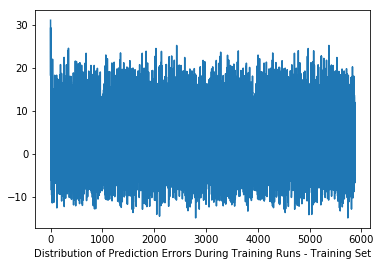

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import plot

plot(errors)
plt.xlabel('Distribution of Prediction Errors During Training Runs - Training Set')

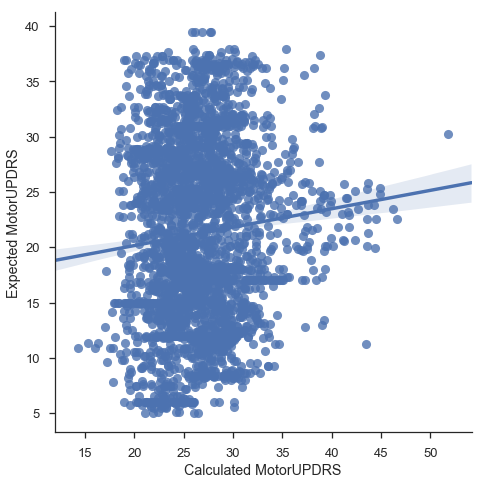

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
table=[results_table, expected_table]
table2=np.transpose(table)
df=pd.DataFrame(table2, columns=['Calculated Results', 'Expected Results'])
sns.set(style="ticks", context="talk")
pal=sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
g=sns.lmplot(x="Calculated Results", y="Expected Results", data=df, palette=pal, size=7)
g.set_axis_labels("Calculated MotorUPDRS", "Expected MotorUPDRS")

## Results for the validation test

The *W* vector obtained during training is used  below to validate the results obtained and evaluate performance of the algorithm.

A preview of the data in the validation dataset is shown in the table below.

In [4]:
from random import choice
from numpy import array, dot, random
import pandas as pd

validation= {"JitterRAP": valid_f['Jitter:RAP'], "ShimmerdB": valid_f['Shimmer(dB)'], "ShimmerDDA":valid_f['Shimmer:DDA'], "JitterPPQ5":valid_f['Jitter:PPQ5'],"ShimmerAPQ11":valid_f['Shimmer:APQ11'], 
                "JitterABS":valid_f['Jitter(Abs)'],"JitterDDP":valid_f['Jitter:DDP'], "ShimmerAPQ3":valid_f['Shimmer:APQ3'], "ShimmerAPQ5":valid_f['Shimmer:APQ5'], "Jitter(%)": valid_f['Jitter(%)'], 
                "NHR":valid_f['NHR'],"RPDE":valid_f['RPDE'], "DFA":valid_f['DFA'], "PPE":valid_f['PPE'], "motorUPDRS": valid_f['motor_UPDRS']}
  
  
df2=pd.DataFrame(validation, columns=["JitterRAP", "ShimmerdB", "ShimmerDDA", "JitterPPQ5","ShimmerAPQ11","JitterABS", "JitterDDP","ShimmerAPQ3", "ShimmerAPQ5","Jitter(%)","NHR", "RPDE", "DFA", "PPE", "motorUPDRS"])
X_v=df2.drop('motorUPDRS', axis=1)
df2.head()


JitterRAP  ShimmerdB  ShimmerDDA  JitterPPQ5  ShimmerAPQ11  JitterABS  \
0    0.00361      0.562     0.11213     0.00355       0.04613   0.000057   
1    0.00288      0.242     0.03295     0.00321       0.02753   0.000027   
2    0.00185      0.254     0.03814     0.00215       0.02778   0.000027   
3    0.00480      1.122     0.16262     0.00479       0.08980   0.000089   
4    0.00276      0.283     0.05207     0.00307       0.02790   0.000034   

   JitterDDP  ShimmerAPQ3  ShimmerAPQ5  Jitter(%)       NHR     RPDE      DFA  \
0    0.01084      0.03738      0.04048    0.00612  0.023109  0.57779  0.72794   
1    0.00863      0.01098      0.01428    0.00611  0.023577  0.60772  0.61782   
2    0.00555      0.01271      0.01586    0.00407  0.019846  0.58978  0.62521   
3    0.01439      0.05421      0.06299    0.00850  0.270870  0.62134  0.56711   
4    0.00827      0.01736      0.01794    0.00624  0.022668  0.53024  0.70506   

       PPE  motorUPDRS  
0  0.25330      9.0863  
1  0.25588     37.6580  
2  0.23866     19.2800  
3  0.34131     21.3040  
4  0.28667     35.1090

#### The *Weights* vector obtained from the algorithm training step is applied below to calculate expected outputs of the Motor UPDRS index on the validation set.


In [12]:
wval= [  0.89111516,   8.61670078,   2.31530148,   0.19186757,   0.94888736,
   0.21637992,   0.91862772,   0.81810374,   0.5231811,    0.86722027,
   0.9207579,   15.82933212,  20.79399651,   6.92973315]

results_val=[]
expected_val=[]
errorsval=[]
for j in range(len(df2)):
    x=df2.iloc[j, 0:14]
    resultval=dot(wval,x)  
    expectedval = df2.loc[j, 'motorUPDRS']
    results_val.append(resultval)
    expected_val.append(expectedval)
    errorval=resultval-expectedval
    errorsval.append(errorval)
    print("x =", x, "result=", resultval, "expected=", expectedval)




x = JitterRAP       0.003610
ShimmerdB       0.562000
ShimmerDDA      0.112130
JitterPPQ5      0.003550
ShimmerAPQ11    0.046130
JitterABS       0.000057
JitterDDP       0.010840
ShimmerAPQ3     0.037380
ShimmerAPQ5     0.040480
Jitter(%)       0.006120
NHR             0.023109
RPDE            0.577790
DFA             0.727940
PPE             0.253300
Name: 0, dtype: float64 result= 31.2762983408 expected= 9.0863
x = JitterRAP       0.002880
ShimmerdB       0.242000
ShimmerDDA      0.032950
JitterPPQ5      0.003210
ShimmerAPQ11    0.027530
JitterABS       0.000027
JitterDDP       0.008630
ShimmerAPQ3     0.010980
ShimmerAPQ5     0.014280
Jitter(%)       0.006110
NHR             0.023577
RPDE            0.607720
DFA             0.617820
PPE             0.255880
Name: 1, dtype: float64 result= 26.4821594493 expected= 37.658
x = JitterRAP       0.001850
ShimmerdB       0.254000
ShimmerDDA      0.038140
JitterPPQ5      0.002150
ShimmerAPQ11    0.027780
JitterABS       0.000027
JitterDDP   

Name: 32, dtype: float64 result= 21.59000658 expected= 18.417
x = JitterRAP       0.001530
ShimmerdB       0.139000
ShimmerDDA      0.024390
JitterPPQ5      0.001820
ShimmerAPQ11    0.011020
JitterABS       0.000019
JitterDDP       0.004580
ShimmerAPQ3     0.008130
ShimmerAPQ5     0.008690
Jitter(%)       0.003610
NHR             0.017296
RPDE            0.425030
DFA             0.558350
PPE             0.200490
Name: 33, dtype: float64 result= 21.0284372841 expected= 23.856
x = JitterRAP       0.000620
ShimmerdB       0.078000
ShimmerDDA      0.012560
JitterPPQ5      0.000760
ShimmerAPQ11    0.007560
JitterABS       0.000006
JitterDDP       0.001870
ShimmerAPQ3     0.004190
ShimmerAPQ5     0.005090
Jitter(%)       0.001470
NHR             0.001050
RPDE            0.454110
DFA             0.642630
PPE             0.100540
Name: 34, dtype: float64 result= 21.9669257049 expected= 7.0631
x = JitterRAP       0.002550
ShimmerdB       0.274000
ShimmerDDA      0.045160
JitterPPQ5      0.00245

Name: 72, dtype: float64 result= 26.1918810908 expected= 28.07
x = JitterRAP       0.014090
ShimmerdB       0.761000
ShimmerDDA      0.108180
JitterPPQ5      0.010670
ShimmerAPQ11    0.053320
JitterABS       0.000208
JitterDDP       0.042260
ShimmerAPQ3     0.036060
ShimmerAPQ5     0.033190
Jitter(%)       0.022550
NHR             0.079401
RPDE            0.669860
DFA             0.764810
PPE             0.520500
Name: 73, dtype: float64 result= 37.1651915552 expected= 19.198
x = JitterRAP       0.00418
ShimmerdB       1.28600
ShimmerDDA      0.17407
JitterPPQ5      0.00608
ShimmerAPQ11    0.10818
JitterABS       0.00010
JitterDDP       0.01253
ShimmerAPQ3     0.05802
ShimmerAPQ5     0.08162
Jitter(%)       0.00957
NHR             0.33050
RPDE            0.73580
DFA             0.56744
PPE             0.25430
Name: 74, dtype: float64 result= 37.2147531021 expected= 20.678
x = JitterRAP       0.001040
ShimmerdB       0.130000
ShimmerDDA      0.016530
JitterPPQ5      0.001490
ShimmerAPQ1

Name: 111, dtype: float64 result= 26.7573417883 expected= 17.51
x = JitterRAP       0.003460
ShimmerdB       0.313000
ShimmerDDA      0.057930
JitterPPQ5      0.002870
ShimmerAPQ11    0.031020
JitterABS       0.000059
JitterDDP       0.010370
ShimmerAPQ3     0.019310
ShimmerAPQ5     0.023400
Jitter(%)       0.006610
NHR             0.036611
RPDE            0.679310
DFA             0.626540
PPE             0.237490
Name: 112, dtype: float64 result= 28.3682787718 expected= 31.0
x = JitterRAP       0.002050
ShimmerdB       0.292000
ShimmerDDA      0.053310
JitterPPQ5      0.002120
ShimmerAPQ11    0.022210
JitterABS       0.000021
JitterDDP       0.006160
ShimmerAPQ3     0.017770
ShimmerAPQ5     0.019010
Jitter(%)       0.004010
NHR             0.016785
RPDE            0.522480
DFA             0.653560
PPE             0.191390
Name: 113, dtype: float64 result= 25.8988081926 expected= 20.565
x = JitterRAP       0.001170
ShimmerdB       0.161000
ShimmerDDA      0.015950
JitterPPQ5      0.001

Name: 144, dtype: float64 result= 26.9251955901 expected= 19.725
x = JitterRAP       0.001640
ShimmerdB       0.315000
ShimmerDDA      0.050570
JitterPPQ5      0.001900
ShimmerAPQ11    0.034820
JitterABS       0.000024
JitterDDP       0.004920
ShimmerAPQ3     0.016860
ShimmerAPQ5     0.019780
Jitter(%)       0.003450
NHR             0.017760
RPDE            0.672080
DFA             0.612470
PPE             0.147290
Name: 145, dtype: float64 result= 27.3091799955 expected= 6.0
x = JitterRAP       0.003060
ShimmerdB       0.319000
ShimmerDDA      0.048660
JitterPPQ5      0.003570
ShimmerAPQ11    0.026270
JitterABS       0.000053
JitterDDP       0.009180
ShimmerAPQ3     0.016220
ShimmerAPQ5     0.019110
Jitter(%)       0.006390
NHR             0.029042
RPDE            0.489070
DFA             0.610020
PPE             0.208960
Name: 146, dtype: float64 result= 24.8281657552 expected= 23.979
x = JitterRAP       0.002840
ShimmerdB       0.251000
ShimmerDDA      0.042730
JitterPPQ5      0.002

Name: 171, dtype: float64 result= 29.8787376854 expected= 20.839
x = JitterRAP       0.002280
ShimmerdB       0.199000
ShimmerDDA      0.031500
JitterPPQ5      0.002130
ShimmerAPQ11    0.016180
JitterABS       0.000024
JitterDDP       0.006840
ShimmerAPQ3     0.010500
ShimmerAPQ5     0.012390
Jitter(%)       0.004530
NHR             0.029481
RPDE            0.577730
DFA             0.652730
PPE             0.176250
Name: 172, dtype: float64 result= 25.7971941146 expected= 7.6165
x = JitterRAP       0.001310
ShimmerdB       0.140000
ShimmerDDA      0.021370
JitterPPQ5      0.001380
ShimmerAPQ11    0.009360
JitterABS       0.000010
JitterDDP       0.003920
ShimmerAPQ3     0.007120
ShimmerAPQ5     0.007760
Jitter(%)       0.002530
NHR             0.008493
RPDE            0.519400
DFA             0.604630
PPE             0.149270
Name: 173, dtype: float64 result= 23.1184624466 expected= 12.356
x = JitterRAP       0.001970
ShimmerdB       0.314000
ShimmerDDA      0.056880
JitterPPQ5      0.

x = JitterRAP       0.002310
ShimmerdB       0.136000
ShimmerDDA      0.022140
JitterPPQ5      0.002360
ShimmerAPQ11    0.011440
JitterABS       0.000026
JitterDDP       0.006920
ShimmerAPQ3     0.007380
ShimmerAPQ5     0.007970
Jitter(%)       0.004640
NHR             0.013849
RPDE            0.470390
DFA             0.654800
PPE             0.167650
Name: 206, dtype: float64 result= 23.4934821942 expected= 12.0
x = JitterRAP       0.004330
ShimmerdB       0.286000
ShimmerDDA      0.054190
JitterPPQ5      0.003630
ShimmerAPQ11    0.022410
JitterABS       0.000036
JitterDDP       0.012980
ShimmerAPQ3     0.018060
ShimmerAPQ5     0.018770
Jitter(%)       0.006900
NHR             0.017584
RPDE            0.443690
DFA             0.609880
PPE             0.138600
Name: 207, dtype: float64 result= 23.3399831821 expected= 33.858
x = JitterRAP       0.003910
ShimmerdB       0.338000
ShimmerDDA      0.049370
JitterPPQ5      0.004470
ShimmerAPQ11    0.026130
JitterABS       0.000070
JitterDDP 

Name: 245, dtype: float64 result= 24.0977568965 expected= 21.533
x = JitterRAP       0.002530
ShimmerdB       0.297000
ShimmerDDA      0.054160
JitterPPQ5      0.002660
ShimmerAPQ11    0.023450
JitterABS       0.000040
JitterDDP       0.007600
ShimmerAPQ3     0.018050
ShimmerAPQ5     0.018550
Jitter(%)       0.005950
NHR             0.035508
RPDE            0.661960
DFA             0.644400
PPE             0.228480
Name: 246, dtype: float64 result= 28.2402307822 expected= 20.576
x = JitterRAP       0.001830
ShimmerdB       0.424000
ShimmerDDA      0.075500
JitterPPQ5      0.002140
ShimmerAPQ11    0.043980
JitterABS       0.000030
JitterDDP       0.005500
ShimmerAPQ3     0.025170
ShimmerAPQ5     0.030660
Jitter(%)       0.003940
NHR             0.010132
RPDE            0.608170
DFA             0.640560
PPE             0.193160
Name: 247, dtype: float64 result= 28.2117716422 expected= 26.237
x = JitterRAP       0.003780
ShimmerdB       0.411000
ShimmerDDA      0.072740
JitterPPQ5      0.

Name: 267, dtype: float64 result= 26.6687077138 expected= 11.449
x = JitterRAP       0.001800
ShimmerdB       0.362000
ShimmerDDA      0.042560
JitterPPQ5      0.002070
ShimmerAPQ11    0.030310
JitterABS       0.000024
JitterDDP       0.005390
ShimmerAPQ3     0.014190
ShimmerAPQ5     0.017140
Jitter(%)       0.004130
NHR             0.033285
RPDE            0.555010
DFA             0.604240
PPE             0.225690
Name: 268, dtype: float64 result= 26.2222823538 expected= 26.797
x = JitterRAP       0.004900
ShimmerdB       0.494000
ShimmerDDA      0.084770
JitterPPQ5      0.005390
ShimmerAPQ11    0.042860
JitterABS       0.000042
JitterDDP       0.014700
ShimmerAPQ3     0.028260
ShimmerAPQ5     0.031180
Jitter(%)       0.009320
NHR             0.072636
RPDE            0.576240
DFA             0.606520
PPE             0.309110
Name: 269, dtype: float64 result= 28.5024152383 expected= 23.326
x = JitterRAP       0.001840
ShimmerdB       0.172000
ShimmerDDA      0.026780
JitterPPQ5      0.

Name: 289, dtype: float64 result= 27.5789440569 expected= 12.631
x = JitterRAP       0.003850
ShimmerdB       0.518000
ShimmerDDA      0.101280
JitterPPQ5      0.004230
ShimmerAPQ11    0.043660
JitterABS       0.000062
JitterDDP       0.011540
ShimmerAPQ3     0.033760
ShimmerAPQ5     0.035120
Jitter(%)       0.006880
NHR             0.048509
RPDE            0.630710
DFA             0.639690
PPE             0.310390
Name: 290, dtype: float64 result= 30.2872043169 expected= 36.561
x = JitterRAP       0.001480
ShimmerdB       0.227000
ShimmerDDA      0.038630
JitterPPQ5      0.001470
ShimmerAPQ11    0.020650
JitterABS       0.000019
JitterDDP       0.004430
ShimmerAPQ3     0.012880
ShimmerAPQ5     0.014070
Jitter(%)       0.003360
NHR             0.014346
RPDE            0.461120
DFA             0.612670
PPE             0.113380
Name: 291, dtype: float64 result= 22.9294941824 expected= 23.715
x = JitterRAP       0.001580
ShimmerdB       0.201000
ShimmerDDA      0.030920
JitterPPQ5      0.

x = JitterRAP       0.005060
ShimmerdB       0.267000
ShimmerDDA      0.046530
JitterPPQ5      0.004110
ShimmerAPQ11    0.021830
JitterABS       0.000046
JitterDDP       0.015180
ShimmerAPQ3     0.015510
ShimmerAPQ5     0.015350
Jitter(%)       0.008240
NHR             0.015784
RPDE            0.617350
DFA             0.726960
PPE             0.168170
Name: 311, dtype: float64 result= 28.544770419 expected= 28.366
x = JitterRAP       0.001910
ShimmerdB       0.404000
ShimmerDDA      0.077610
JitterPPQ5      0.002030
ShimmerAPQ11    0.035340
JitterABS       0.000030
JitterDDP       0.005730
ShimmerAPQ3     0.025870
ShimmerAPQ5     0.029680
Jitter(%)       0.003600
NHR             0.012249
RPDE            0.568840
DFA             0.634790
PPE             0.133990
Name: 312, dtype: float64 result= 26.8855190578 expected= 31.0
x = JitterRAP       0.005320
ShimmerdB       0.512000
ShimmerDDA      0.097280
JitterPPQ5      0.005800
ShimmerAPQ11    0.045590
JitterABS       0.000094
JitterDDP  

Name: 332, dtype: float64 result= 35.1747101338 expected= 31.511
x = JitterRAP       0.002020
ShimmerdB       0.201000
ShimmerDDA      0.026490
JitterPPQ5      0.002780
ShimmerAPQ11    0.023640
JitterABS       0.000060
JitterDDP       0.006060
ShimmerAPQ3     0.008830
ShimmerAPQ5     0.011650
Jitter(%)       0.005100
NHR             0.017066
RPDE            0.621100
DFA             0.748970
PPE             0.244100
Name: 333, dtype: float64 result= 28.9543152027 expected= 20.682
x = JitterRAP       0.001250
ShimmerdB       0.114000
ShimmerDDA      0.019450
JitterPPQ5      0.001220
ShimmerAPQ11    0.009880
JitterABS       0.000015
JitterDDP       0.003750
ShimmerAPQ3     0.006480
ShimmerAPQ5     0.007300
Jitter(%)       0.002760
NHR             0.013915
RPDE            0.588930
DFA             0.544290
PPE             0.132090
Name: 334, dtype: float64 result= 22.621515303 expected= 6.6924
x = JitterRAP       0.002830
ShimmerdB       0.243000
ShimmerDDA      0.042680
JitterPPQ5      0.0

Name: 354, dtype: float64 result= 27.1807279557 expected= 18.0
x = JitterRAP       0.001880
ShimmerdB       0.315000
ShimmerDDA      0.053300
JitterPPQ5      0.002020
ShimmerAPQ11    0.030450
JitterABS       0.000026
JitterDDP       0.005640
ShimmerAPQ3     0.017770
ShimmerAPQ5     0.021340
Jitter(%)       0.003680
NHR             0.032028
RPDE            0.581300
DFA             0.686780
PPE             0.195960
Name: 355, dtype: float64 result= 27.7726354536 expected= 12.208
x = JitterRAP       0.000680
ShimmerdB       0.086000
ShimmerDDA      0.010960
JitterPPQ5      0.000910
ShimmerAPQ11    0.006080
JitterABS       0.000008
JitterDDP       0.002050
ShimmerAPQ3     0.003650
ShimmerAPQ5     0.004160
Jitter(%)       0.001890
NHR             0.006934
RPDE            0.265890
DFA             0.581650
PPE             0.105620
Name: 356, dtype: float64 result= 17.8236404131 expected= 8.721
x = JitterRAP       0.003310
ShimmerdB       0.237000
ShimmerDDA      0.044540
JitterPPQ5      0.003

Name: 394, dtype: float64 result= 26.7670420213 expected= 17.745
x = JitterRAP       0.000890
ShimmerdB       0.106000
ShimmerDDA      0.017830
JitterPPQ5      0.000900
ShimmerAPQ11    0.009190
JitterABS       0.000008
JitterDDP       0.002660
ShimmerAPQ3     0.005940
ShimmerAPQ5     0.006920
Jitter(%)       0.001920
NHR             0.003240
RPDE            0.334310
DFA             0.541570
PPE             0.070348
Name: 395, dtype: float64 result= 18.0207133571 expected= 16.072
x = JitterRAP       0.001190
ShimmerdB       0.145000
ShimmerDDA      0.023500
JitterPPQ5      0.001580
ShimmerAPQ11    0.018490
JitterABS       0.000023
JitterDDP       0.003580
ShimmerAPQ3     0.007830
ShimmerAPQ5     0.009990
Jitter(%)       0.002970
NHR             0.005048
RPDE            0.421250
DFA             0.612540
PPE             0.140840
Name: 396, dtype: float64 result= 21.7261336582 expected= 19.17
x = JitterRAP       0.001790
ShimmerdB       0.166000
ShimmerDDA      0.023210
JitterPPQ5      0.0

Name: 415, dtype: float64 result= 22.1941415347 expected= 24.659
x = JitterRAP       0.002810
ShimmerdB       0.442000
ShimmerDDA      0.081120
JitterPPQ5      0.003340
ShimmerAPQ11    0.034680
JitterABS       0.000042
JitterDDP       0.008440
ShimmerAPQ3     0.027040
ShimmerAPQ5     0.029940
Jitter(%)       0.005710
NHR             0.046116
RPDE            0.656560
DFA             0.609290
PPE             0.184100
Name: 416, dtype: float64 result= 28.4636569612 expected= 26.784
x = JitterRAP       0.001500
ShimmerdB       0.155000
ShimmerDDA      0.023590
JitterPPQ5      0.001520
ShimmerAPQ11    0.010450
JitterABS       0.000012
JitterDDP       0.004500
ShimmerAPQ3     0.007860
ShimmerAPQ5     0.009070
Jitter(%)       0.002740
NHR             0.007924
RPDE            0.414940
DFA             0.576650
PPE             0.042752
Name: 417, dtype: float64 result= 20.2820761146 expected= 27.739
x = JitterRAP       0.002040
ShimmerdB       0.241000
ShimmerDDA      0.042850
JitterPPQ5      0.

Name: 436, dtype: float64 result= 24.8604692464 expected= 17.945
x = JitterRAP       0.001390
ShimmerdB       0.190000
ShimmerDDA      0.024750
JitterPPQ5      0.001740
ShimmerAPQ11    0.022420
JitterABS       0.000029
JitterDDP       0.004170
ShimmerAPQ3     0.008250
ShimmerAPQ5     0.011400
Jitter(%)       0.003420
NHR             0.010041
RPDE            0.513090
DFA             0.679450
PPE             0.149680
Name: 437, dtype: float64 result= 25.0336806578 expected= 13.512
x = JitterRAP       0.003080
ShimmerdB       0.257000
ShimmerDDA      0.045250
JitterPPQ5      0.002390
ShimmerAPQ11    0.021270
JitterABS       0.000031
JitterDDP       0.009230
ShimmerAPQ3     0.015080
ShimmerAPQ5     0.016620
Jitter(%)       0.005790
NHR             0.015759
RPDE            0.509830
DFA             0.605660
PPE             0.186890
Name: 438, dtype: float64 result= 24.3511530192 expected= 16.452
x = JitterRAP       0.001130
ShimmerdB       0.150000
ShimmerDDA      0.027140
JitterPPQ5      0.

x = JitterRAP       0.002220
ShimmerdB       0.193000
ShimmerDDA      0.033010
JitterPPQ5      0.002800
ShimmerAPQ11    0.016510
JitterABS       0.000040
JitterDDP       0.006670
ShimmerAPQ3     0.011000
ShimmerAPQ5     0.013520
Jitter(%)       0.004780
NHR             0.010356
RPDE            0.491020
DFA             0.773450
PPE             0.201840
Name: 475, dtype: float64 result= 27.0478546316 expected= 11.947
x = JitterRAP       0.002200
ShimmerdB       0.135000
ShimmerDDA      0.021610
JitterPPQ5      0.002360
ShimmerAPQ11    0.015030
JitterABS       0.000040
JitterDDP       0.006590
ShimmerAPQ3     0.007200
ShimmerAPQ5     0.008070
Jitter(%)       0.004020
NHR             0.006562
RPDE            0.545750
DFA             0.759430
PPE             0.184330
Name: 476, dtype: float64 result= 26.9634668412 expected= 24.012
x = JitterRAP       0.005090
ShimmerdB       0.219000
ShimmerDDA      0.038510
JitterPPQ5      0.004830
ShimmerAPQ11    0.019150
JitterABS       0.000081
JitterDD

Name: 495, dtype: float64 result= 22.8623717883 expected= 28.799
x = JitterRAP       0.004050
ShimmerdB       0.331000
ShimmerDDA      0.052860
JitterPPQ5      0.004730
ShimmerAPQ11    0.032790
JitterABS       0.000080
JitterDDP       0.012160
ShimmerAPQ3     0.017620
ShimmerAPQ5     0.021300
Jitter(%)       0.008260
NHR             0.058787
RPDE            0.580760
DFA             0.596230
PPE             0.304610
Name: 496, dtype: float64 result= 26.8100973264 expected= 16.365
x = JitterRAP       0.003310
ShimmerdB       0.346000
ShimmerDDA      0.067970
JitterPPQ5      0.003960
ShimmerAPQ11    0.031060
JitterABS       0.000052
JitterDDP       0.009940
ShimmerAPQ3     0.022660
ShimmerAPQ5     0.025200
Jitter(%)       0.006450
NHR             0.026389
RPDE            0.526610
DFA             0.645500
PPE             0.270190
Name: 497, dtype: float64 result= 26.8734414662 expected= 19.804
x = JitterRAP       0.007050
ShimmerdB       0.527000
ShimmerDDA      0.096440
JitterPPQ5      0.

Name: 516, dtype: float64 result= 25.8190259562 expected= 36.443
x = JitterRAP       0.002730
ShimmerdB       0.343000
ShimmerDDA      0.055820
JitterPPQ5      0.002770
ShimmerAPQ11    0.030900
JitterABS       0.000040
JitterDDP       0.008200
ShimmerAPQ3     0.018610
ShimmerAPQ5     0.022450
Jitter(%)       0.005750
NHR             0.030279
RPDE            0.468960
DFA             0.682100
PPE             0.221540
Name: 517, dtype: float64 result= 26.3265528129 expected= 27.793
x = JitterRAP       0.010520
ShimmerdB       1.620000
ShimmerDDA      0.240350
JitterPPQ5      0.012260
ShimmerAPQ11    0.106090
JitterABS       0.000143
JitterDDP       0.031550
ShimmerAPQ3     0.080120
ShimmerAPQ5     0.115360
Jitter(%)       0.019010
NHR             0.342180
RPDE            0.738980
DFA             0.628450
PPE             0.292730
Name: 518, dtype: float64 result= 41.9084850249 expected= 25.239
x = JitterRAP       0.002020
ShimmerdB       0.431000
ShimmerDDA      0.079610
JitterPPQ5      0.

Name: 537, dtype: float64 result= 28.9832587418 expected= 18.93
x = JitterRAP       0.001200
ShimmerdB       0.157000
ShimmerDDA      0.026360
JitterPPQ5      0.001670
ShimmerAPQ11    0.019290
JitterABS       0.000025
JitterDDP       0.003600
ShimmerAPQ3     0.008790
ShimmerAPQ5     0.011240
Jitter(%)       0.003250
NHR             0.007070
RPDE            0.479820
DFA             0.719820
PPE             0.153170
Name: 538, dtype: float64 result= 25.0838515851 expected= 14.723
x = JitterRAP       0.001730
ShimmerdB       0.159000
ShimmerDDA      0.026090
JitterPPQ5      0.002010
ShimmerAPQ11    0.012980
JitterABS       0.000019
JitterDDP       0.005190
ShimmerAPQ3     0.008700
ShimmerAPQ5     0.009840
Jitter(%)       0.003540
NHR             0.024527
RPDE            0.405580
DFA             0.648750
PPE             0.169930
Name: 539, dtype: float64 result= 22.5751315094 expected= 16.607
x = JitterRAP       0.001230
ShimmerdB       0.233000
ShimmerDDA      0.029990
JitterPPQ5      0.0

Name: 575, dtype: float64 result= 23.1969613185 expected= 18.234
x = JitterRAP       0.002660
ShimmerdB       0.235000
ShimmerDDA      0.035520
JitterPPQ5      0.002910
ShimmerAPQ11    0.022330
JitterABS       0.000068
JitterDDP       0.007990
ShimmerAPQ3     0.011840
ShimmerAPQ5     0.014480
Jitter(%)       0.006030
NHR             0.037870
RPDE            0.650060
DFA             0.594090
PPE             0.259940
Name: 576, dtype: float64 result= 26.6408322988 expected= 24.388
x = JitterRAP       0.001800
ShimmerdB       0.146000
ShimmerDDA      0.020800
JitterPPQ5      0.001850
ShimmerAPQ11    0.015680
JitterABS       0.000033
JitterDDP       0.005400
ShimmerAPQ3     0.006930
ShimmerAPQ5     0.009280
Jitter(%)       0.003720
NHR             0.008305
RPDE            0.411130
DFA             0.634150
PPE             0.153480
Name: 577, dtype: float64 result= 22.1074009013 expected= 20.513
x = JitterRAP       0.001120
ShimmerdB       0.087000
ShimmerDDA      0.009550
JitterPPQ5      0.

Name: 615, dtype: float64 result= 22.9209479572 expected= 29.636
x = JitterRAP       0.002470
ShimmerdB       0.130000
ShimmerDDA      0.020690
JitterPPQ5      0.003030
ShimmerAPQ11    0.015790
JitterABS       0.000049
JitterDDP       0.007410
ShimmerAPQ3     0.006900
ShimmerAPQ5     0.009470
Jitter(%)       0.004940
NHR             0.007616
RPDE            0.625860
DFA             0.761260
PPE             0.256990
Name: 616, dtype: float64 result= 28.7320093315 expected= 22.627
x = JitterRAP       0.002520
ShimmerdB       0.288000
ShimmerDDA      0.042450
JitterPPQ5      0.002980
ShimmerAPQ11    0.026380
JitterABS       0.000041
JitterDDP       0.007570
ShimmerAPQ3     0.014150
ShimmerAPQ5     0.018740
Jitter(%)       0.005150
NHR             0.018351
RPDE            0.549330
DFA             0.725530
PPE             0.221380
Name: 617, dtype: float64 result= 27.9737495438 expected= 13.045
x = JitterRAP       0.002510
ShimmerdB       0.199000
ShimmerDDA      0.035990
JitterPPQ5      0.

Name: 636, dtype: float64 result= 19.7623188643 expected= 29.188
x = JitterRAP       0.001910
ShimmerdB       0.187000
ShimmerDDA      0.030140
JitterPPQ5      0.001740
ShimmerAPQ11    0.015470
JitterABS       0.000022
JitterDDP       0.005720
ShimmerAPQ3     0.010050
ShimmerAPQ5     0.011620
Jitter(%)       0.004080
NHR             0.018765
RPDE            0.384610
DFA             0.634870
PPE             0.154410
Name: 637, dtype: float64 result= 22.0978224496 expected= 16.486
x = JitterRAP       0.002000
ShimmerdB       0.289000
ShimmerDDA      0.016450
JitterPPQ5      0.003890
ShimmerAPQ11    0.020300
JitterABS       0.000080
JitterDDP       0.006010
ShimmerAPQ3     0.005480
ShimmerAPQ5     0.008180
Jitter(%)       0.008040
NHR             0.033487
RPDE            0.715240
DFA             0.696040
PPE             0.401540
Name: 638, dtype: float64 result= 31.1800011573 expected= 22.308
x = JitterRAP       0.002230
ShimmerdB       0.260000
ShimmerDDA      0.045910
JitterPPQ5      0.

Name: 656, dtype: float64 result= 23.9782287611 expected= 26.261
x = JitterRAP       0.002000
ShimmerdB       0.390000
ShimmerDDA      0.066970
JitterPPQ5      0.002960
ShimmerAPQ11    0.031090
JitterABS       0.000060
JitterDDP       0.006010
ShimmerAPQ3     0.022320
ShimmerAPQ5     0.026160
Jitter(%)       0.005720
NHR             0.029754
RPDE            0.656480
DFA             0.597980
PPE             0.248050
Name: 657, dtype: float64 result= 28.1622114741 expected= 17.042
x = JitterRAP       0.001410
ShimmerdB       0.136000
ShimmerDDA      0.024690
JitterPPQ5      0.001260
ShimmerAPQ11    0.010810
JitterABS       0.000018
JitterDDP       0.004240
ShimmerAPQ3     0.008230
ShimmerAPQ5     0.009070
Jitter(%)       0.003290
NHR             0.011117
RPDE            0.345530
DFA             0.628690
PPE             0.122290
Name: 658, dtype: float64 result= 20.6591820007 expected= 14.108
x = JitterRAP       0.004080
ShimmerdB       0.521000
ShimmerDDA      0.065360
JitterPPQ5      0.

Name: 676, dtype: float64 result= 20.9580542875 expected= 22.104
x = JitterRAP       0.003330
ShimmerdB       0.424000
ShimmerDDA      0.082020
JitterPPQ5      0.003600
ShimmerAPQ11    0.033780
JitterABS       0.000049
JitterDDP       0.009980
ShimmerAPQ3     0.027340
ShimmerAPQ5     0.031540
Jitter(%)       0.005920
NHR             0.013173
RPDE            0.439980
DFA             0.748820
PPE             0.248310
Name: 677, dtype: float64 result= 28.2006754443 expected= 11.117
x = JitterRAP       0.003280
ShimmerdB       0.207000
ShimmerDDA      0.038260
JitterPPQ5      0.003550
ShimmerAPQ11    0.019680
JitterABS       0.000042
JitterDDP       0.009830
ShimmerAPQ3     0.012750
ShimmerAPQ5     0.015560
Jitter(%)       0.005780
NHR             0.022762
RPDE            0.552040
DFA             0.701950
PPE             0.150440
Name: 678, dtype: float64 result= 26.3253796474 expected= 14.736
x = JitterRAP       0.002370
ShimmerdB       0.248000
ShimmerDDA      0.045270
JitterPPQ5      0.

x = JitterRAP       0.001780
ShimmerdB       0.208000
ShimmerDDA      0.036520
JitterPPQ5      0.002180
ShimmerAPQ11    0.023820
JitterABS       0.000028
JitterDDP       0.005350
ShimmerAPQ3     0.012170
ShimmerAPQ5     0.014880
Jitter(%)       0.003650
NHR             0.007776
RPDE            0.420210
DFA             0.662640
PPE             0.189000
Name: 697, dtype: float64 result= 23.6747197949 expected= 20.457
x = JitterRAP       0.002350
ShimmerdB       0.286000
ShimmerDDA      0.052280
JitterPPQ5      0.002640
ShimmerAPQ11    0.029620
JitterABS       0.000053
JitterDDP       0.007060
ShimmerAPQ3     0.017430
ShimmerAPQ5     0.021070
Jitter(%)       0.005440
NHR             0.056626
RPDE            0.717560
DFA             0.735770
PPE             0.260180
Name: 698, dtype: float64 result= 31.1658358006 expected= 14.486
x = JitterRAP       0.001810
ShimmerdB       0.162000
ShimmerDDA      0.035180
JitterPPQ5      0.001990
ShimmerAPQ11    0.014980
JitterABS       0.000021
JitterDD

Name: 716, dtype: float64 result= 26.5153766954 expected= 15.255
x = JitterRAP       0.00849
ShimmerdB       0.82600
ShimmerDDA      0.13226
JitterPPQ5      0.01417
ShimmerAPQ11    0.06231
JitterABS       0.00009
JitterDDP       0.02547
ShimmerAPQ3     0.04409
ShimmerAPQ5     0.06504
Jitter(%)       0.01735
NHR             0.18698
RPDE            0.69592
DFA             0.58140
PPE             0.39992
Name: 717, dtype: float64 result= 33.6506678671 expected= 24.153
x = JitterRAP       0.002890
ShimmerdB       0.370000
ShimmerDDA      0.072230
JitterPPQ5      0.002930
ShimmerAPQ11    0.032480
JitterABS       0.000048
JitterDDP       0.008660
ShimmerAPQ3     0.024080
ShimmerAPQ5     0.025490
Jitter(%)       0.006020
NHR             0.033231
RPDE            0.685430
DFA             0.621470
PPE             0.219930
Name: 718, dtype: float64 result= 28.7629910636 expected= 17.826
x = JitterRAP       0.001190
ShimmerdB       0.187000
ShimmerDDA      0.029940
JitterPPQ5      0.001630
Shimmer

Name: 736, dtype: float64 result= 24.5484406123 expected= 27.17
x = JitterRAP       0.001880
ShimmerdB       0.305000
ShimmerDDA      0.046640
JitterPPQ5      0.002290
ShimmerAPQ11    0.026960
JitterABS       0.000034
JitterDDP       0.005650
ShimmerAPQ3     0.015550
ShimmerAPQ5     0.018500
Jitter(%)       0.004590
NHR             0.014908
RPDE            0.542200
DFA             0.633420
PPE             0.219410
Name: 737, dtype: float64 result= 26.0835311375 expected= 26.806
x = JitterRAP       0.006660
ShimmerdB       0.344000
ShimmerDDA      0.055820
JitterPPQ5      0.005810
ShimmerAPQ11    0.027870
JitterABS       0.000066
JitterDDP       0.019980
ShimmerAPQ3     0.018610
ShimmerAPQ5     0.019770
Jitter(%)       0.011920
NHR             0.047025
RPDE            0.598250
DFA             0.705920
PPE             0.353060
Name: 738, dtype: float64 result= 29.819860378 expected= 36.933
x = JitterRAP       0.002290
ShimmerdB       0.169000
ShimmerDDA      0.026490
JitterPPQ5      0.00

x = JitterRAP       0.003090
ShimmerdB       0.154000
ShimmerDDA      0.028910
JitterPPQ5      0.002790
ShimmerAPQ11    0.012620
JitterABS       0.000032
JitterDDP       0.009280
ShimmerAPQ3     0.009640
ShimmerAPQ5     0.009630
Jitter(%)       0.005710
NHR             0.018780
RPDE            0.514430
DFA             0.660740
PPE             0.190730
Name: 757, dtype: float64 result= 24.6570879072 expected= 20.827
x = JitterRAP       0.002780
ShimmerdB       0.396000
ShimmerDDA      0.069680
JitterPPQ5      0.003200
ShimmerAPQ11    0.039060
JitterABS       0.000049
JitterDDP       0.008350
ShimmerAPQ3     0.023230
ShimmerAPQ5     0.027220
Jitter(%)       0.005520
NHR             0.042957
RPDE            0.550240
DFA             0.755570
PPE             0.239710
Name: 758, dtype: float64 result= 29.781343273 expected= 13.844
x = JitterRAP       0.003050
ShimmerdB       0.287000
ShimmerDDA      0.049080
JitterPPQ5      0.002830
ShimmerAPQ11    0.020610
JitterABS       0.000026
JitterDDP

x = JitterRAP       0.000980
ShimmerdB       0.113000
ShimmerDDA      0.019140
JitterPPQ5      0.001060
ShimmerAPQ11    0.011870
JitterABS       0.000013
JitterDDP       0.002930
ShimmerAPQ3     0.006380
ShimmerAPQ5     0.006780
Jitter(%)       0.002040
NHR             0.003124
RPDE            0.480310
DFA             0.563560
PPE             0.092377
Name: 777, dtype: float64 result= 21.0082478923 expected= 15.0
x = JitterRAP       0.002640
ShimmerdB       0.274000
ShimmerDDA      0.054220
JitterPPQ5      0.003090
ShimmerAPQ11    0.026400
JitterABS       0.000046
JitterDDP       0.007930
ShimmerAPQ3     0.018070
ShimmerAPQ5     0.019370
Jitter(%)       0.005030
NHR             0.011941
RPDE            0.452390
DFA             0.693490
PPE             0.239680
Name: 778, dtype: float64 result= 25.8044550518 expected= 25.282
x = JitterRAP       0.002240
ShimmerdB       0.409000
ShimmerDDA      0.075100
JitterPPQ5      0.002690
ShimmerAPQ11    0.037120
JitterABS       0.000047
JitterDDP 

x = JitterRAP       0.001910
ShimmerdB       0.237000
ShimmerDDA      0.041790
JitterPPQ5      0.002000
ShimmerAPQ11    0.023290
JitterABS       0.000044
JitterDDP       0.005730
ShimmerAPQ3     0.013930
ShimmerAPQ5     0.016290
Jitter(%)       0.004460
NHR             0.018461
RPDE            0.592820
DFA             0.710540
PPE             0.195590
Name: 817, dtype: float64 result= 27.7234552517 expected= 8.9324
x = JitterRAP       0.004510
ShimmerdB       0.412000
ShimmerDDA      0.064970
JitterPPQ5      0.004680
ShimmerAPQ11    0.034330
JitterABS       0.000100
JitterDDP       0.013530
ShimmerAPQ3     0.021660
ShimmerAPQ5     0.026200
Jitter(%)       0.009250
NHR             0.041359
RPDE            0.670830
DFA             0.769980
PPE             0.357050
Name: 818, dtype: float64 result= 32.9319930427 expected= 27.689
x = JitterRAP       0.003720
ShimmerdB       0.346000
ShimmerDDA      0.062450
JitterPPQ5      0.004000
ShimmerAPQ11    0.034030
JitterABS       0.000070
JitterDD

Name: 838, dtype: float64 result= 22.5866969251 expected= 24.219
x = JitterRAP       0.002620
ShimmerdB       0.377000
ShimmerDDA      0.064330
JitterPPQ5      0.002930
ShimmerAPQ11    0.032170
JitterABS       0.000046
JitterDDP       0.007850
ShimmerAPQ3     0.021440
ShimmerAPQ5     0.024220
Jitter(%)       0.005980
NHR             0.026309
RPDE            0.486800
DFA             0.664800
PPE             0.249460
Name: 839, dtype: float64 result= 26.7559639859 expected= 27.267
x = JitterRAP       0.002230
ShimmerdB       0.218000
ShimmerDDA      0.038920
JitterPPQ5      0.002210
ShimmerAPQ11    0.018180
JitterABS       0.000047
JitterDDP       0.006700
ShimmerAPQ3     0.012970
ShimmerAPQ5     0.014810
Jitter(%)       0.005450
NHR             0.019363
RPDE            0.596630
DFA             0.563360
PPE             0.252970
Name: 840, dtype: float64 result= 24.9470683686 expected= 16.416
x = JitterRAP       0.017290
ShimmerdB       0.621000
ShimmerDDA      0.110970
JitterPPQ5      0.

Name: 877, dtype: float64 result= 24.9620974285 expected= 8.3883
x = JitterRAP       0.004600
ShimmerdB       0.224000
ShimmerDDA      0.043550
JitterPPQ5      0.004390
ShimmerAPQ11    0.020710
JitterABS       0.000036
JitterDDP       0.013790
ShimmerAPQ3     0.014520
ShimmerAPQ5     0.014830
Jitter(%)       0.007970
NHR             0.019360
RPDE            0.471740
DFA             0.631530
PPE             0.301630
Name: 878, dtype: float64 result= 24.8021933049 expected= 33.204
x = JitterRAP       0.001490
ShimmerdB       0.211000
ShimmerDDA      0.026040
JitterPPQ5      0.001650
ShimmerAPQ11    0.021490
JitterABS       0.000020
JitterDDP       0.004480
ShimmerAPQ3     0.008680
ShimmerAPQ5     0.012030
Jitter(%)       0.003280
NHR             0.011614
RPDE            0.574470
DFA             0.544880
PPE             0.179530
Name: 879, dtype: float64 result= 23.5993074782 expected= 17.126
x = JitterRAP       0.003460
ShimmerdB       0.198000
ShimmerDDA      0.031420
JitterPPQ5      0.

x = JitterRAP       0.008870
ShimmerdB       0.568000
ShimmerDDA      0.099450
JitterPPQ5      0.008070
ShimmerAPQ11    0.042540
JitterABS       0.000148
JitterDDP       0.026620
ShimmerAPQ3     0.033150
ShimmerAPQ5     0.032700
Jitter(%)       0.016090
NHR             0.070805
RPDE            0.677380
DFA             0.711270
PPE             0.406960
Name: 915, dtype: float64 result= 33.6549659731 expected= 26.64
x = JitterRAP       0.001400
ShimmerdB       0.222000
ShimmerDDA      0.031130
JitterPPQ5      0.001680
ShimmerAPQ11    0.018120
JitterABS       0.000017
JitterDDP       0.004210
ShimmerAPQ3     0.010380
ShimmerAPQ5     0.011580
Jitter(%)       0.003320
NHR             0.010464
RPDE            0.451260
DFA             0.548970
PPE             0.183650
Name: 916, dtype: float64 result= 21.8657522959 expected= 24.696
x = JitterRAP       0.005570
ShimmerdB       0.631000
ShimmerDDA      0.060790
JitterPPQ5      0.006070
ShimmerAPQ11    0.044300
JitterABS       0.000102
JitterDDP

Name: 935, dtype: float64 result= 30.6456474829 expected= 29.469
x = JitterRAP       0.003650
ShimmerdB       0.310000
ShimmerDDA      0.048560
JitterPPQ5      0.003530
ShimmerAPQ11    0.020260
JitterABS       0.000042
JitterDDP       0.010950
ShimmerAPQ3     0.016190
ShimmerAPQ5     0.017070
Jitter(%)       0.006660
NHR             0.051087
RPDE            0.624830
DFA             0.611850
PPE             0.222230
Name: 936, dtype: float64 result= 27.0452637969 expected= 16.441
x = JitterRAP       0.002130
ShimmerdB       0.223000
ShimmerDDA      0.035090
JitterPPQ5      0.003080
ShimmerAPQ11    0.022470
JitterABS       0.000054
JitterDDP       0.006380
ShimmerAPQ3     0.011700
ShimmerAPQ5     0.013980
Jitter(%)       0.005640
NHR             0.027655
RPDE            0.566210
DFA             0.596620
PPE             0.224920
Name: 937, dtype: float64 result= 25.0071678303 expected= 15.571
x = JitterRAP       0.001560
ShimmerdB       0.119000
ShimmerDDA      0.018460
JitterPPQ5      0.

Name: 955, dtype: float64 result= 26.2083757876 expected= 12.0
x = JitterRAP       0.003550
ShimmerdB       0.381000
ShimmerDDA      0.055040
JitterPPQ5      0.004520
ShimmerAPQ11    0.052100
JitterABS       0.000066
JitterDDP       0.010660
ShimmerAPQ3     0.018350
ShimmerAPQ5     0.027020
Jitter(%)       0.008120
NHR             0.018407
RPDE            0.542000
DFA             0.803200
PPE             0.351150
Name: 956, dtype: float64 result= 31.2414224392 expected= 29.11
x = JitterRAP       0.003050
ShimmerdB       0.569000
ShimmerDDA      0.115580
JitterPPQ5      0.002900
ShimmerAPQ11    0.049620
JitterABS       0.000046
JitterDDP       0.009140
ShimmerAPQ3     0.038530
ShimmerAPQ5     0.044180
Jitter(%)       0.005450
NHR             0.044710
RPDE            0.644910
DFA             0.753630
PPE             0.214450
Name: 957, dtype: float64 result= 32.6953540768 expected= 14.974
x = JitterRAP       0.001680
ShimmerdB       0.238000
ShimmerDDA      0.044280
JitterPPQ5      0.001

Name: 975, dtype: float64 result= 30.1796028461 expected= 21.486
x = JitterRAP       0.002390
ShimmerdB       0.463000
ShimmerDDA      0.071370
JitterPPQ5      0.003090
ShimmerAPQ11    0.040360
JitterABS       0.000054
JitterDDP       0.007180
ShimmerAPQ3     0.023790
ShimmerAPQ5     0.028610
Jitter(%)       0.005940
NHR             0.029485
RPDE            0.566520
DFA             0.644730
PPE             0.279750
Name: 976, dtype: float64 result= 28.5818727882 expected= 32.749
x = JitterRAP       0.002920
ShimmerdB       0.405000
ShimmerDDA      0.074950
JitterPPQ5      0.003680
ShimmerAPQ11    0.034150
JitterABS       0.000051
JitterDDP       0.008770
ShimmerAPQ3     0.024980
ShimmerAPQ5     0.030600
Jitter(%)       0.006380
NHR             0.019729
RPDE            0.498430
DFA             0.777240
PPE             0.259710
Name: 977, dtype: float64 result= 29.6186806829 expected= 12.362
x = JitterRAP       0.003690
ShimmerdB       0.241000
ShimmerDDA      0.040750
JitterPPQ5      0.

x = JitterRAP       0.002650
ShimmerdB       0.301000
ShimmerDDA      0.053060
JitterPPQ5      0.003380
ShimmerAPQ11    0.031450
JitterABS       0.000040
JitterDDP       0.007940
ShimmerAPQ3     0.017690
ShimmerAPQ5     0.021550
Jitter(%)       0.005400
NHR             0.012654
RPDE            0.427770
DFA             0.772680
PPE             0.270750
Name: 1015, dtype: float64 result= 27.5133567216 expected= 36.988
x = JitterRAP       0.005190
ShimmerdB       0.225000
ShimmerDDA      0.037270
JitterPPQ5      0.006530
ShimmerAPQ11    0.023480
JitterABS       0.000113
JitterDDP       0.015580
ShimmerAPQ3     0.012420
ShimmerAPQ5     0.017050
Jitter(%)       0.010320
NHR             0.025386
RPDE            0.707890
DFA             0.802840
PPE             0.419660
Name: 1016, dtype: float64 result= 32.9267584423 expected= 21.743
x = JitterRAP       0.002900
ShimmerdB       0.323000
ShimmerDDA      0.045680
JitterPPQ5      0.004650
ShimmerAPQ11    0.029720
JitterABS       0.000060
Jitter

x = JitterRAP       0.003720
ShimmerdB       0.299000
ShimmerDDA      0.051840
JitterPPQ5      0.003730
ShimmerAPQ11    0.025060
JitterABS       0.000061
JitterDDP       0.011160
ShimmerAPQ3     0.017280
ShimmerAPQ5     0.019770
Jitter(%)       0.007180
NHR             0.027899
RPDE            0.522300
DFA             0.652120
PPE             0.256180
Name: 1052, dtype: float64 result= 26.3939887761 expected= 29.659
x = JitterRAP       0.001650
ShimmerdB       0.255000
ShimmerDDA      0.039540
JitterPPQ5      0.001460
ShimmerAPQ11    0.022430
JitterABS       0.000028
JitterDDP       0.004950
ShimmerAPQ3     0.013180
ShimmerAPQ5     0.016780
Jitter(%)       0.003890
NHR             0.017115
RPDE            0.492970
DFA             0.589000
PPE             0.197430
Name: 1053, dtype: float64 result= 23.7742738985 expected= 31.0
x = JitterRAP       0.00434
ShimmerdB       0.72400
ShimmerDDA      0.10440
JitterPPQ5      0.00559
ShimmerAPQ11    0.06119
JitterABS       0.00008
JitterDDP     

Name: 1089, dtype: float64 result= 23.3533730354 expected= 16.148
x = JitterRAP       0.001700
ShimmerdB       0.379000
ShimmerDDA      0.065970
JitterPPQ5      0.002270
ShimmerAPQ11    0.033580
JitterABS       0.000043
JitterDDP       0.005090
ShimmerAPQ3     0.021990
ShimmerAPQ5     0.025840
Jitter(%)       0.004320
NHR             0.019007
RPDE            0.603080
DFA             0.560320
PPE             0.192870
Name: 1090, dtype: float64 result= 26.0439090228 expected= 24.268
x = JitterRAP       0.001610
ShimmerdB       0.272000
ShimmerDDA      0.046090
JitterPPQ5      0.001790
ShimmerAPQ11    0.029560
JitterABS       0.000031
JitterDDP       0.004820
ShimmerAPQ3     0.015360
ShimmerAPQ5     0.018560
Jitter(%)       0.003840
NHR             0.008433
RPDE            0.527560
DFA             0.647060
PPE             0.134630
Name: 1091, dtype: float64 result= 25.256923557 expected= 5.4371
x = JitterRAP       0.002750
ShimmerdB       0.276000
ShimmerDDA      0.049420
JitterPPQ5      

Name: 1123, dtype: float64 result= 30.8999139 expected= 12.358
x = JitterRAP       0.001240
ShimmerdB       0.137000
ShimmerDDA      0.017100
JitterPPQ5      0.001530
ShimmerAPQ11    0.016320
JitterABS       0.000032
JitterDDP       0.003710
ShimmerAPQ3     0.005700
ShimmerAPQ5     0.008270
Jitter(%)       0.003730
NHR             0.014522
RPDE            0.607110
DFA             0.559350
PPE             0.196660
Name: 1124, dtype: float64 result= 23.8700440681 expected= 12.0
x = JitterRAP       0.002910
ShimmerdB       0.474000
ShimmerDDA      0.081980
JitterPPQ5      0.003090
ShimmerAPQ11    0.049190
JitterABS       0.000044
JitterDDP       0.008740
ShimmerAPQ3     0.027330
ShimmerAPQ5     0.031120
Jitter(%)       0.005710
NHR             0.043937
RPDE            0.657240
DFA             0.605470
PPE             0.214440
Name: 1125, dtype: float64 result= 28.8958952354 expected= 36.562
x = JitterRAP       0.001500
ShimmerdB       0.210000
ShimmerDDA      0.038710
JitterPPQ5      0.00

x = JitterRAP       0.001810
ShimmerdB       0.185000
ShimmerDDA      0.033380
JitterPPQ5      0.002240
ShimmerAPQ11    0.018520
JitterABS       0.000028
JitterDDP       0.005430
ShimmerAPQ3     0.011130
ShimmerAPQ5     0.012540
Jitter(%)       0.004000
NHR             0.006538
RPDE            0.351570
DFA             0.723420
PPE             0.209490
Name: 1161, dtype: float64 result= 23.7807608036 expected= 36.709
x = JitterRAP       0.001470
ShimmerdB       0.219000
ShimmerDDA      0.034920
JitterPPQ5      0.001440
ShimmerAPQ11    0.017890
JitterABS       0.000014
JitterDDP       0.004400
ShimmerAPQ3     0.011640
ShimmerAPQ5     0.012160
Jitter(%)       0.002970
NHR             0.005151
RPDE            0.408310
DFA             0.583890
PPE             0.115930
Name: 1162, dtype: float64 result= 21.4217629402 expected= 20.351
x = JitterRAP       0.006600
ShimmerdB       0.339000
ShimmerDDA      0.057820
JitterPPQ5      0.004980
ShimmerAPQ11    0.023710
JitterABS       0.000085
Jitter

Name: 1181, dtype: float64 result= 29.4068085966 expected= 9.5479
x = JitterRAP       0.002250
ShimmerdB       0.207000
ShimmerDDA      0.038820
JitterPPQ5      0.002730
ShimmerAPQ11    0.018380
JitterABS       0.000029
JitterDDP       0.006760
ShimmerAPQ3     0.012940
ShimmerAPQ5     0.014600
Jitter(%)       0.005150
NHR             0.020379
RPDE            0.639570
DFA             0.698370
PPE             0.258560
Name: 1182, dtype: float64 result= 28.3787988348 expected= 6.0102
x = JitterRAP       0.003140
ShimmerdB       0.228000
ShimmerDDA      0.040920
JitterPPQ5      0.002160
ShimmerAPQ11    0.017810
JitterABS       0.000052
JitterDDP       0.009420
ShimmerAPQ3     0.013640
ShimmerAPQ5     0.013200
Jitter(%)       0.005710
NHR             0.018932
RPDE            0.537340
DFA             0.624160
PPE             0.202960
Name: 1183, dtype: float64 result= 25.0195482454 expected= 24.242
x = JitterRAP       0.002690
ShimmerdB       0.218000
ShimmerDDA      0.038670
JitterPPQ5     

Name: 1219, dtype: float64 result= 22.5129835881 expected= 15.0
x = JitterRAP       0.001170
ShimmerdB       0.371000
ShimmerDDA      0.053890
JitterPPQ5      0.001560
ShimmerAPQ11    0.048370
JitterABS       0.000018
JitterDDP       0.003510
ShimmerAPQ3     0.017960
ShimmerAPQ5     0.026990
Jitter(%)       0.002840
NHR             0.006401
RPDE            0.486530
DFA             0.622920
PPE             0.169040
Name: 1220, dtype: float64 result= 25.2350493393 expected= 24.439
x = JitterRAP       0.003460
ShimmerdB       0.273000
ShimmerDDA      0.043280
JitterPPQ5      0.003200
ShimmerAPQ11    0.029200
JitterABS       0.000039
JitterDDP       0.010380
ShimmerAPQ3     0.014430
ShimmerAPQ5     0.014620
Jitter(%)       0.007460
NHR             0.022892
RPDE            0.647570
DFA             0.695290
PPE             0.313430
Name: 1221, dtype: float64 result= 29.4209604377 expected= 34.401
x = JitterRAP       0.000790
ShimmerdB       0.293000
ShimmerDDA      0.039980
JitterPPQ5      0

Name: 1257, dtype: float64 result= 23.396994025 expected= 15.0
x = JitterRAP       0.002170
ShimmerdB       0.260000
ShimmerDDA      0.045960
JitterPPQ5      0.003270
ShimmerAPQ11    0.025180
JitterABS       0.000053
JitterDDP       0.006510
ShimmerAPQ3     0.015320
ShimmerAPQ5     0.018060
Jitter(%)       0.005390
NHR             0.026883
RPDE            0.535410
DFA             0.773180
PPE             0.267750
Name: 1258, dtype: float64 result= 28.8387293387 expected= 14.723
x = JitterRAP       0.001620
ShimmerdB       0.116000
ShimmerDDA      0.015370
JitterPPQ5      0.002240
ShimmerAPQ11    0.017510
JitterABS       0.000042
JitterDDP       0.004850
ShimmerAPQ3     0.005120
ShimmerAPQ5     0.007600
Jitter(%)       0.004120
NHR             0.009550
RPDE            0.670190
DFA             0.737230
PPE             0.196540
Name: 1259, dtype: float64 result= 28.3791951745 expected= 23.14
x = JitterRAP       0.003000
ShimmerdB       0.298000
ShimmerDDA      0.051140
JitterPPQ5      0.0

Name: 1277, dtype: float64 result= 27.4607111482 expected= 35.551
x = JitterRAP       0.001350
ShimmerdB       0.090000
ShimmerDDA      0.010960
JitterPPQ5      0.001450
ShimmerAPQ11    0.009720
JitterABS       0.000032
JitterDDP       0.004040
ShimmerAPQ3     0.003650
ShimmerAPQ5     0.005010
Jitter(%)       0.003670
NHR             0.010535
RPDE            0.504020
DFA             0.592680
PPE             0.122170
Name: 1278, dtype: float64 result= 21.9828827992 expected= 21.82
x = JitterRAP       0.002940
ShimmerdB       0.423000
ShimmerDDA      0.063180
JitterPPQ5      0.003880
ShimmerAPQ11    0.051830
JitterABS       0.000060
JitterDDP       0.008830
ShimmerAPQ3     0.021060
ShimmerAPQ5     0.030150
Jitter(%)       0.007940
NHR             0.022564
RPDE            0.620130
DFA             0.768700
PPE             0.299950
Name: 1279, dtype: float64 result= 31.7916419014 expected= 28.753
x = JitterRAP       0.002090
ShimmerdB       0.150000
ShimmerDDA      0.019840
JitterPPQ5      

Name: 1316, dtype: float64 result= 38.2104352844 expected= 21.854
x = JitterRAP       0.001750
ShimmerdB       0.112000
ShimmerDDA      0.016550
JitterPPQ5      0.002060
ShimmerAPQ11    0.013260
JitterABS       0.000032
JitterDDP       0.005250
ShimmerAPQ3     0.005520
ShimmerAPQ5     0.007370
Jitter(%)       0.004020
NHR             0.005785
RPDE            0.548550
DFA             0.714960
PPE             0.151820
Name: 1317, dtype: float64 result= 25.6420678584 expected= 19.834
x = JitterRAP       0.001990
ShimmerdB       0.488000
ShimmerDDA      0.082440
JitterPPQ5      0.002310
ShimmerAPQ11    0.046970
JitterABS       0.000033
JitterDDP       0.005960
ShimmerAPQ3     0.027480
ShimmerAPQ5     0.029040
Jitter(%)       0.004980
NHR             0.016679
RPDE            0.506630
DFA             0.599000
PPE             0.209630
Name: 1318, dtype: float64 result= 26.4333405185 expected= 27.548
x = JitterRAP       0.001850
ShimmerdB       0.188000
ShimmerDDA      0.031620
JitterPPQ5     

Name: 1353, dtype: float64 result= 27.0800624656 expected= 15.994
x = JitterRAP       0.001340
ShimmerdB       0.154000
ShimmerDDA      0.025990
JitterPPQ5      0.001410
ShimmerAPQ11    0.011030
JitterABS       0.000016
JitterDDP       0.004020
ShimmerAPQ3     0.008660
ShimmerAPQ5     0.009630
Jitter(%)       0.003120
NHR             0.012985
RPDE            0.440400
DFA             0.623200
PPE             0.115500
Name: 1354, dtype: float64 result= 22.1599993216 expected= 14.646
x = JitterRAP       0.003890
ShimmerdB       0.172000
ShimmerDDA      0.030050
JitterPPQ5      0.002670
ShimmerAPQ11    0.015370
JitterABS       0.000070
JitterDDP       0.011660
ShimmerAPQ3     0.010020
ShimmerAPQ5     0.010050
Jitter(%)       0.008110
NHR             0.040527
RPDE            0.631350
DFA             0.739210
PPE             0.175620
Name: 1355, dtype: float64 result= 28.2207196238 expected= 25.394
x = JitterRAP       0.002360
ShimmerdB       0.144000
ShimmerDDA      0.023590
JitterPPQ5     

Name: 1391, dtype: float64 result= 23.651230493 expected= 26.42
x = JitterRAP       0.004990
ShimmerdB       0.353000
ShimmerDDA      0.027650
JitterPPQ5      0.006610
ShimmerAPQ11    0.014810
JitterABS       0.000048
JitterDDP       0.014960
ShimmerAPQ3     0.009220
ShimmerAPQ5     0.010740
Jitter(%)       0.010830
NHR             0.147990
RPDE            0.513460
DFA             0.570910
PPE             0.407360
Name: 1392, dtype: float64 result= 26.1201767801 expected= 19.642
x = JitterRAP       0.002490
ShimmerdB       0.242000
ShimmerDDA      0.035410
JitterPPQ5      0.002970
ShimmerAPQ11    0.026100
JitterABS       0.000036
JitterDDP       0.007480
ShimmerAPQ3     0.011800
ShimmerAPQ5     0.015780
Jitter(%)       0.005880
NHR             0.020680
RPDE            0.516350
DFA             0.571950
PPE             0.308260
Name: 1393, dtype: float64 result= 24.4464715931 expected= 18.741
x = JitterRAP       0.002060
ShimmerdB       0.187000
ShimmerDDA      0.035050
JitterPPQ5      0

Name: 1411, dtype: float64 result= 24.1836282329 expected= 15.0
x = JitterRAP       0.004750
ShimmerdB       0.234000
ShimmerDDA      0.042360
JitterPPQ5      0.004190
ShimmerAPQ11    0.017870
JitterABS       0.000044
JitterDDP       0.014250
ShimmerAPQ3     0.014120
ShimmerAPQ5     0.013860
Jitter(%)       0.008490
NHR             0.013310
RPDE            0.521730
DFA             0.742360
PPE             0.206610
Name: 1412, dtype: float64 result= 27.314919288 expected= 31.469
x = JitterRAP       0.001330
ShimmerdB       0.167000
ShimmerDDA      0.028230
JitterPPQ5      0.001710
ShimmerAPQ11    0.015950
JitterABS       0.000028
JitterDDP       0.003990
ShimmerAPQ3     0.009410
ShimmerAPQ5     0.010800
Jitter(%)       0.002990
NHR             0.008195
RPDE            0.607970
DFA             0.574430
PPE             0.140550
Name: 1413, dtype: float64 result= 24.0905852611 expected= 32.177
x = JitterRAP       0.001640
ShimmerdB       0.256000
ShimmerDDA      0.045820
JitterPPQ5      0.

x = JitterRAP       0.003100
ShimmerdB       0.203000
ShimmerDDA      0.029560
JitterPPQ5      0.003230
ShimmerAPQ11    0.023650
JitterABS       0.000045
JitterDDP       0.009300
ShimmerAPQ3     0.009850
ShimmerAPQ5     0.013140
Jitter(%)       0.006260
NHR             0.014292
RPDE            0.611500
DFA             0.739980
PPE             0.226880
Name: 1432, dtype: float64 result= 28.5245240769 expected= 29.715
x = JitterRAP       0.001220
ShimmerdB       0.176000
ShimmerDDA      0.030470
JitterPPQ5      0.001370
ShimmerAPQ11    0.012670
JitterABS       0.000014
JitterDDP       0.003660
ShimmerAPQ3     0.010160
ShimmerAPQ5     0.011210
Jitter(%)       0.002690
NHR             0.006243
RPDE            0.395520
DFA             0.680050
PPE             0.149890
Name: 1433, dtype: float64 result= 23.0665546438 expected= 12.288
x = JitterRAP       0.003450
ShimmerdB       0.393000
ShimmerDDA      0.068270
JitterPPQ5      0.004280
ShimmerAPQ11    0.040860
JitterABS       0.000051
Jitter

Name: 1451, dtype: float64 result= 30.3569634378 expected= 12.941
x = JitterRAP       0.002540
ShimmerdB       0.405000
ShimmerDDA      0.072490
JitterPPQ5      0.003190
ShimmerAPQ11    0.036610
JitterABS       0.000050
JitterDDP       0.007610
ShimmerAPQ3     0.024160
ShimmerAPQ5     0.027320
Jitter(%)       0.006180
NHR             0.030546
RPDE            0.547560
DFA             0.633140
PPE             0.219220
Name: 1452, dtype: float64 result= 27.1219155207 expected= 28.726
x = JitterRAP       0.001340
ShimmerdB       0.162000
ShimmerDDA      0.029670
JitterPPQ5      0.001530
ShimmerAPQ11    0.014890
JitterABS       0.000022
JitterDDP       0.004010
ShimmerAPQ3     0.009890
ShimmerAPQ5     0.010720
Jitter(%)       0.003840
NHR             0.028785
RPDE            0.536110
DFA             0.632030
PPE             0.275020
Name: 1453, dtype: float64 result= 25.0619472341 expected= 18.491
x = JitterRAP       0.005260
ShimmerdB       0.327000
ShimmerDDA      0.058550
JitterPPQ5     

### Comparison of basic statistics of errors obtained during algorithm training and those obtained during validation.

Basic Statistics of Error data
Mean(training)                             3.749
Mean(valid.)                               5.275
Median(training)                           3.159
Median(valid.)                             5.358
Stdev(training)                            8.410
Stdev(valid.)                              8.742

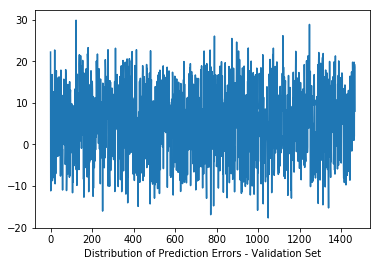

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import plot, ylim
from numpy import mean
from numpy import std
from numpy import median
import matplotlib.pyplot as plt

#ylim([-1, 1])
plot(errorsval)
plt.xlabel('Distribution of Prediction Errors - Validation Set')

data = [mean(errors),mean(errorsval), median(errors), median(errorsval), std(errors), std(errorsval)]
df3 = pd.DataFrame(data, index=["Mean(training)", "Mean(valid.)", "Median(training)", "Median(valid.)", "Stdev(training)",
                              "Stdev(valid.)"], columns=["Basic Statistics of Error data"])
df3.round(3)


## Multiple Linear Regression Model

In [5]:
import scipy.stats as stats
import pandas as pd
from sklearn.linear_model import LinearRegression

training2= {"JitterRAP": train_f['Jitter:RAP'], "ShimmerdB": train_f['Shimmer(dB)'], "ShimmerDDA":train_f['Shimmer:DDA'], "JitterPPQ5":train_f['Jitter:PPQ5'],"ShimmerAPQ11":train_f['Shimmer:APQ11'], 
                "JitterABS":train_f['Jitter(Abs)'],"JitterDDP":train_f['Jitter:DDP'], "ShimmerAPQ3":train_f['Shimmer:APQ3'], "ShimmerAPQ5":train_f['Shimmer:APQ5'], "Jitter(%)": train_f['Jitter(%)'], 
                "NHR":train_f['NHR'],"RPDE":train_f['RPDE'], "DFA":train_f['DFA'], "PPE":train_f['PPE'], "motorUPDRS": train_f['motor_UPDRS']}
  
df4=pd.DataFrame(training2, columns=["JitterRAP", "ShimmerdB", "ShimmerDDA", "JitterPPQ5","ShimmerAPQ11","JitterABS", "JitterDDP","ShimmerAPQ3", "ShimmerAPQ5","Jitter(%)","NHR", "RPDE", "DFA", "PPE", "motorUPDRS"])

X=df4.drop('motorUPDRS', axis=1)
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
lm.fit(X, df4.motorUPDRS)

print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: 29.4687809196
Number of coefficients: 14


## The Multiple Linear Regression Model Calculations

The results indicate that this set of 5 variables alone is not a good choice to predict the results of the Motor UPDRS Index.

The coefficients show that the variables' have opposite effects on the predicted value, and nullify each others' effect.
We must remember as well that given the previous analysis, the Jitter and Shimmer groups of variables are 

In [26]:
tabla = zip(X.columns, lm.coef_)
dict2=dict(tabla)
df5=pd.DataFrame(data=dict2, index = ['Estimated Coefficients']).T
df5

Estimated Coefficients
DFA                       -27.699148
Jitter(%)                 119.447324
JitterABS              -80749.402013
JitterDDP               24010.543836
JitterPPQ5                225.515771
JitterRAP              -71627.180753
NHR                       -23.138582
PPE                        29.690949
RPDE                        7.351509
ShimmerAPQ11              184.490558
ShimmerAPQ3             35402.697271
ShimmerAPQ5              -180.061912
ShimmerDDA             -11805.299441
ShimmerdB                  -0.742148

Mean Square Error of the Model = 59


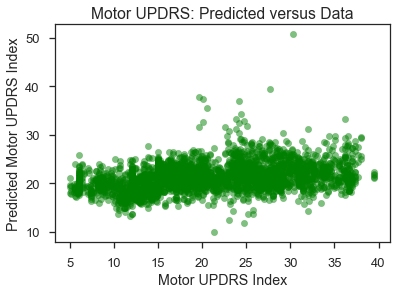

In [27]:
plt.scatter(df4.motorUPDRS, lm.predict(X), c='g', s=40, alpha=0.5)
plt.ylabel("Predicted Motor UPDRS Index")
plt.xlabel("Motor UPDRS Index")
plt.title("Motor UPDRS: Predicted versus Data")

# Note: The Mean Square Error should be calculated with the validation dataset.

MeanSquarError=np.mean((df4.motorUPDRS - lm.predict(X))**2)
print("Mean Square Error of the Model =", round(MeanSquarError))


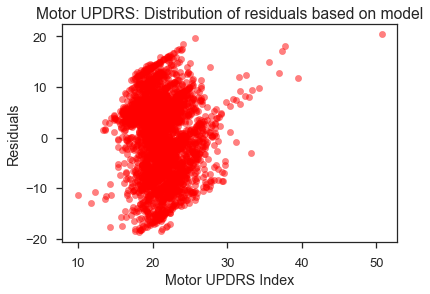

In [28]:

plt.scatter(lm.predict(X), lm.predict(X) - df4.motorUPDRS, c='r', s=40, alpha=0.5)
plt.xlabel("Motor UPDRS Index")
plt.ylabel("Residuals")
plt.title("Motor UPDRS: Distribution of residuals based on model")


## Regularization

The plot of residuals (above) shows that the variance is not constant and there is no evidence of a non-linear pattern, since the magnitude of some of the multivariable coefficients are desproportionally higher than others. 

We know that there is autocorrleation affecting the model: the dataset contains data from each individual taken across time intervals, and some of the variables are not independent from each other, as shown on the regression plot of ShimmerDDA vs ShimmerdB.

In order to select the appropriate model complexity and optimize the values of the weights, the standard approach used is called "Regularization". This approach adds a "regularization" term to an error function, in order to control over-fitting (as described by C.Bishop in *Pattern Recognition and Machine Learning*). 
A regularizer expression is given by the sum of squares of the weight vector elements:
$$E_r(w)= \frac{1}{2} w^T w$$

A more general regularizer is sometimes used, for which the error function takes the form:

$$E_r(w)=\frac{1}{2}\sum_{n=1}^{N} [motorUPDR_n - (w_0+w_1.x_n)]^2 + \frac{1}{2}\lambda\sum_{j=1}^{M}|w_j|^q$$

Where $q=2$ corresponds to the quadratic regularizer ("ridge" regression). The case of $q=1$ is known as the LASSO. In this case, if $\lambda$ is sufficiently large, some of the coefficients $w_j$ are driven to zero ("sparse model").

The parameter $\lambda$ is the regularization coefficient, which controls the relative importance of the regularization error.

In the regularization approach, the optimization is shifted from finding the basis functions to determining an appropriate value for the regularization coefficient $\lambda$.

### Ridge Regression
The "ridge regression" method "penalizes" the loss function when compared to least squares regression, in order to prevent the coefficients from reaching large values (as it can occur in linear regression). The quadratic regularizer explained above is called "ridge regression". 

In the case of optimization for all examples in the training dataset, the loss (also called "cost") function becomes:

$$l(w)=\frac{1}{2}\sum_{n=1}^{N} [motorUPDR_n -y(x_n,w)]^2 + \frac{1}{2}\lambda.w^Tw$$

Where $w^Tw = w_0^2 + w_1^2 +.....+w_M^2$. In many cases the coefficient w_0 is omitted from the regularizer because it will impose a dependence of the target variable on the choide of origin; it may be included with its own regularization coefficient.

The error function above can be minimized exactly.

The update rule for the *Weights* vector in this case is:

$$w(t+1) = w(t) + \sum_{n=1}^{N} (motorUPDR_n - y(x_n, w)). x_n - \lambda \sum_{j=1}^{M} w_j(t)$$

The regularization model produces that the magnitude of the coefficients *w* shrink as $\lambda$ increases (see the plot below for **different values of $\lambda$)**.

The training set would be used to determine the coefficients *w*. The validation set can be used to optimize $\lambda$ or M (the quantity of coefficients). However, more sophisticated approaches can be used.


[  1.01792884e+01   4.82940661e-01  -1.52256388e+00   7.44131290e+00
   1.90126112e+01  -5.94429220e+03   3.41793837e+00  -4.56616384e+00
  -2.56486817e-01   1.58583681e+01  -1.77754535e+00   3.68437919e+00
  -9.35491317e+00   7.27807268e+00]
[  1.08157220e+01   2.89217997e-01   6.01569711e-01   9.61385627e+00
   6.22356378e+00  -3.86070391e+02   3.61029173e+00   1.80505130e+00
   2.30803118e+00   9.10196484e+00   2.96614085e-01   1.37121404e+00
  -2.65378973e+00   2.06616264e+00]
[   9.34309439    0.20548833    0.62542132    8.14815706    3.79678331
  125.31613302    3.11691227    1.87643887    1.95190369    6.85415034
    0.36833286    0.80513601   -1.37857869    1.16827161]


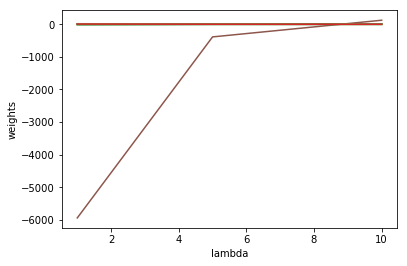

In [6]:
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
## training

ridge = Ridge(normalize=True)
coefs = []
lambda1 = [1, 5, 10]
for a in lambda1:
    ridge.set_params(alpha=a)
    ridge.fit(X, df4.motorUPDRS)
    coefs.append(ridge.coef_)
    print(ridge.coef_)

ax=plt.gca()
ax.plot(lambda1, coefs)
plt.xlabel('lambda')
plt.ylabel('weights')


#### Ridge Regression Model with Lambda=0.5

By comparing with linear regression, there is no significative reduction in the Mean Squared Error.

The coefficients for ridge regression are shown below.

In [7]:
from sklearn.metrics import mean_squared_error
# Ridge regression MSE versus Linear Regression MSE

ridge2 = Ridge(alpha=0.5, normalize=True)
ridge2.fit(X, df4.motorUPDRS)

ridge3 = Ridge(alpha=0, normalize=True)
ridge3.fit(X, df4.motorUPDRS)

#Using the validation dataset for predicting with the Ridge model

pred2 = ridge2.predict(X_v)
pred3 = ridge3.predict(X_v)
print("Coefficients", pd.Series(ridge2.coef_, index=X.columns)) #Print coefficients
print("Ridge MSE (Lambda=0.5)=", mean_squared_error(df2.motorUPDRS, pred2))
print("Linear Regression MSE (Lambda=0)=", mean_squared_error(df2.motorUPDRS, pred3))

score2=ridge2.score(X_v, df2.motorUPDRS)
score3=ridge3.score(X_v, df2.motorUPDRS)
print("Score Ridge regression=", score2)
print("Score linear regression=", score3)

Coefficients JitterRAP          17.754096
ShimmerdB           0.569562
ShimmerDDA         -3.875433
JitterPPQ5          8.417479
ShimmerAPQ11       30.691328
JitterABS      -12316.711246
JitterDDP           5.967343
ShimmerAPQ3       -11.623447
ShimmerAPQ5        -4.076573
Jitter(%)          23.692999
NHR                -4.368227
RPDE                4.745735
DFA               -13.703758
PPE                11.527433
dtype: float64
Ridge MSE (Lambda=0.5)= 61.638493122
Linear Regression MSE (Lambda=0)= 62.9739435231
Score Ridge regression= 0.0610524819467
Score linear regression= 0.0407093850268


## LASSO regression - Method for reducing the number of variables in the model.

The "lambda" magnitudes below were selected between 0.005 and 0.02 in order to prevent the occurrence of a "sparse" model (all *w* coefficients equal zero). 
The *best* lambda can be chosen by performing a k-fold cross validation, refit the model and compute the error for the validation set.


[ 0.29652789 -0.         -0.60381563  0.          1.16450184 -1.40370526
  0.01367537 -0.1220556  -0.          0.         -0.5293291   0.43241509
 -1.67683941  2.61083108]
[-0.          0.          0.         -0.          0.         -0.         -0.
  0.          0.          0.         -0.          0.01599799 -0.90276133
  1.2115214 ]
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00461746
  0.32206031]


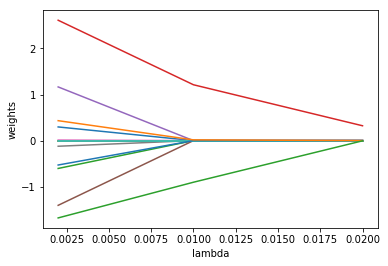

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale
%matplotlib inline

## training

lasso = Lasso(max_iter=100, normalize=True)
coefs = []
lambda2 = [0.002, 0.01, 0.02]
for a in lambda2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), df4.motorUPDRS)
    coefs.append(lasso.coef_)
    print(lasso.coef_)

ax=plt.gca()
ax.plot(lambda2, coefs)
plt.xlabel('lambda')
plt.ylabel('weights')

The MSE test below for LASSO does not improve substantially the MSE tests obtained for ridge or linear regression.
However, a very small lambda is obtained (=0.000485) by 10-fold validation, which may cause precision problems. In addition to this, this small lambda value won't improve the MSE test, and also convergence problems occur. A lambda = 0.002 is chosen instead, which is the minimum lambda that minimizes the test error and prevents error messages. 
Using this lambda, the number of variables is reduced to 10 by driving four of the coefficients to exactly 0.
Depending on the choice of lambda, some of the coefficients will be exactly equal to zero. However, the coefficient R is still smaller than those obtained for the previous models.

In [13]:
from sklearn import cross_validation
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


lassocv = LassoCV(alphas=None, cv=10, max_iter=10000, normalize=True)
lassocv.fit(X, df4.motorUPDRS)

lasso.set_params(alpha=lassocv.alpha_)
print("lambda=", lassocv.alpha_)

mean_squared_error(df2.motorUPDRS, lasso.predict(X_v))



lambda= 0.000485485089171


64.971598882674712

In [17]:
lasso = Lasso(max_iter=100, normalize=True)
lambda2 = [0.002]
lasso.set_params(alpha=lambda2)
lasso.fit(scale(X), df4.motorUPDRS)
scorelas=lasso.score(X_v, df2.motorUPDRS)
print("Score Lasso regression=", scorelas)

Score Lasso regression= 0.0102788302413


In [18]:
pd.Series(lasso.coef_, index=X.columns)

JitterRAP       0.296528
ShimmerdB      -0.000000
ShimmerDDA     -0.603816
JitterPPQ5      0.000000
ShimmerAPQ11    1.164502
JitterABS      -1.403705
JitterDDP       0.013675
ShimmerAPQ3    -0.122056
ShimmerAPQ5    -0.000000
Jitter(%)       0.000000
NHR            -0.529329
RPDE            0.432415
DFA            -1.676839
PPE             2.610831
dtype: float64

## Elastic Net Regression

So far, **none of the linear models** used (linear regression, ridge and lasso) have been proven capable of adequately predicting the index Motor UPDRS based on the data collected. 

The last linear regression model that will be evaluated is the *Elastic Net* regression model, which combines a sparse model characteristics of the Lasso and the ridge models.


In [38]:
from sklearn.linear_model import ElasticNet

ElNet = ElasticNet(alpha=0.01, l1_ratio=0.8, normalize=True)
ElNet.fit(X, df4.motorUPDRS)

mselnet=mean_squared_error(df2.motorUPDRS, lasso.predict(X_v))
print("MSE Elastic Net=", mselnet)

scoreNet=ElNet.score(X_v, df2.motorUPDRS)
print("Score Elastic Net regression=", scoreNet)

MSE Elastic Net= 64.9715988827
Score Elastic Net regression= 0.0135355803358


In [39]:
pd.Series(ElNet.coef_, index=X.columns)

JitterRAP       0.000000
ShimmerdB       0.144692
ShimmerDDA      0.000000
JitterPPQ5      0.962893
ShimmerAPQ11    3.930120
JitterABS       0.000000
JitterDDP       0.000000
ShimmerAPQ3     0.000000
ShimmerAPQ5     0.528714
Jitter(%)       2.852056
NHR             0.000000
RPDE            0.772671
DFA            -1.264786
PPE             1.390654
dtype: float64